## Healthcare Provider Fraud Detection
### Carrie Lu, Hannah Kerr, Jiaying Du
### March 2020 

## Preprocessing Data

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [0]:
ben = pd.read_csv('data/Train_Beneficiarydata-1542865627584.csv')
inp = pd.read_csv('data/Train_Inpatientdata-1542865627584.csv')
out = pd.read_csv('data/Train_Outpatientdata-1542865627584.csv')
label = pd.read_csv('data/Train-1542865627584.csv')

In [0]:
print(ben.shape)
ben.sample(2)

(138556, 25)


BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
1778   BENE12904  1949-10-01  NaN       1     2                     0     25   
15240  BENE27316  1928-06-01  NaN       2     1                     0     33   

       County  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
1778      560                   12                   12   
15240     400                   12                   12   

       ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
1778                       1                         1   
15240                      1                         1   

       ChronicCond_KidneyDisease  ChronicCond_Cancer  \
1778                           1                   1   
15240                          2                   2   

       ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
1778                            1                       1   
15240                           2                       2   

       ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
1778                      1                          2   
15240                     2                          2   

       ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
1778                          1                                2   
15240                         2                                1   

       ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
1778                    2                         0                      0   
15240                   2                         0                      0   

       OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
1778                       7220                    270  
15240                       330                    170

In [0]:
print(inp.shape)
inp.sample(2)

(40474, 30)


BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
26363  BENE107712  CLM45863   2009-04-06  2009-04-11  PRV51842   
26238  BENE107277  CLM68748   2009-09-19  2009-09-24  PRV56416   

       InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
26363                   12000          PHY341192          PHY355416   
26238                    8000          PHY379160                NaN   

      OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
26363            NaN  2009-04-06                 49121             1068.0   
26238            NaN  2009-09-19                  4280             1068.0   

      DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
26363  2009-04-11                182               5070               7847   
26238  2009-09-24                302              42843              41400   

      ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
26363              25000               4280              70705   
26238              51881                486              25000   

      ClmDiagnosisCode_6 ClmDiagnosisCode_7 ClmDiagnosisCode_8  \
26363               4019              34830               V441   
26238               5859              71590               4280   

      ClmDiagnosisCode_9 ClmDiagnosisCode_10  ClmProcedureCode_1  \
26363               0389                 NaN              9396.0   
26238               2449                 NaN                 NaN   

       ClmProcedureCode_2  ClmProcedureCode_3  ClmProcedureCode_4  \
26363                 NaN                 NaN                 NaN   
26238                 NaN                 NaN                 NaN   

       ClmProcedureCode_5  ClmProcedureCode_6  
26363                 NaN                 NaN  
26238                 NaN                 NaN

In [0]:
print(out.shape)
out.sample(2)

(517737, 27)


BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
433982  BENE135133  CLM168394   2009-01-31  2009-01-31  PRV53374   
149943   BENE54012  CLM715234   2009-12-05  2009-12-05  PRV52660   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
433982                      10          PHY334069                NaN   
149943                      70          PHY347281                NaN   

       OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
433982            NaN              59010              25000   
149943            NaN               4011                NaN   

       ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
433982              78820                NaN                NaN   
149943                NaN                NaN                NaN   

       ClmDiagnosisCode_6 ClmDiagnosisCode_7 ClmDiagnosisCode_8  \
433982                NaN                NaN                NaN   
149943                NaN                NaN                NaN   

       ClmDiagnosisCode_9 ClmDiagnosisCode_10  ClmProcedureCode_1  \
433982                NaN                 NaN                 NaN   
149943                NaN                 NaN                 NaN   

        ClmProcedureCode_2  ClmProcedureCode_3  ClmProcedureCode_4  \
433982                 NaN                 NaN                 NaN   
149943                 NaN                 NaN                 NaN   

        ClmProcedureCode_5  ClmProcedureCode_6  DeductibleAmtPaid  \
433982                 NaN                 NaN                  0   
149943                 NaN                 NaN                  0   

       ClmAdmitDiagnosisCode  
433982                   NaN  
149943                   NaN

In [0]:
print('columns in inpatient but not in outpatient: ', [i for i in inp.columns if i not in out.columns])
print('columns in outpatient but not in inpatient: ', [i for i in out.columns if i not in inp.columns])

columns in inpatient but not in outpatient:  ['AdmissionDt', 'DischargeDt', 'DiagnosisGroupCode']
columns in outpatient but not in inpatient:  []


In [0]:
inp['ClmType'] = 'inpatient'
out['ClmType'] = 'outpatient'

In [0]:
clm = pd.concat([inp, out], sort=False)
print(clm.shape)
clm.sample(2)

(558211, 31)


BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
223365   BENE75132  CLM427474   2009-06-21  2009-07-11  PRV52154   
413685  BENE129421  CLM614973   2009-10-05  2009-10-05  PRV51349   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
223365                    1100          PHY357905                NaN   
413685                     200          PHY372676                NaN   

       OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
223365      PHY393731         NaN                   NaN                0.0   
413685            NaN         NaN                  6824               60.0   

       DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
223365         NaN                NaN               5856              27541   
413685         NaN                NaN               6803                NaN   

       ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
223365               5880                NaN                NaN   
413685                NaN                NaN                NaN   

       ClmDiagnosisCode_6 ClmDiagnosisCode_7 ClmDiagnosisCode_8  \
223365                NaN                NaN                NaN   
413685                NaN                NaN                NaN   

       ClmDiagnosisCode_9 ClmDiagnosisCode_10  ClmProcedureCode_1  \
223365                NaN                 NaN                 NaN   
413685                NaN                 NaN                 NaN   

        ClmProcedureCode_2  ClmProcedureCode_3  ClmProcedureCode_4  \
223365                 NaN                 NaN                 NaN   
413685                 NaN                 NaN                 NaN   

        ClmProcedureCode_5  ClmProcedureCode_6     ClmType  
223365                 NaN                 NaN  outpatient  
413685                 NaN                 NaN  outpatient

In [0]:
df = pd.merge(clm, ben, how='left', on='BeneID')
# df = pd.merge(df, label, how='left', on='Provider')
df = df.sort_values('ClaimStartDt').reset_index() # sort df by claim start date
df.drop('index', axis = 1, inplace = True)
print(df.shape)

(558211, 55)


In [0]:
df.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE136624  CLM31004   2008-11-27  2009-01-01  PRV55897   
1  BENE109092  CLM31001   2008-11-27  2009-01-01  PRV55832   
2  BENE151770  CLM31005   2008-11-28  2009-01-02  PRV51456   
3   BENE82606  CLM31006   2008-11-28  2009-01-02  PRV56588   
4   BENE50967  CLM31008   2008-11-29  2009-01-03  PRV55812   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   51000          PHY407408          PHY366859   
1                   10000          PHY402579                NaN   
2                   56000          PHY428454          PHY428454   
3                   18000          PHY356371          PHY415979   
4                    7000          PHY392116                NaN   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2008-11-27                 70700             1068.0   
1      PHY402579  2008-11-27                 29570             1068.0   
2            NaN  2008-11-28                  4240             1068.0   
3            NaN  2008-11-28                  7866             1068.0   
4            NaN  2008-11-29                  2989             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-01-01                941              V5875               5601   
1  2009-01-01                876              29534              49120   
2  2009-01-02                309              41401               4240   
3  2009-01-02                196               1625               2859   
4  2009-01-03                058               3310               3079   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0              43882              53190               5849              70723   
1              27800               3019               4019              07070   
2              30000               9971              E8781               5185   
3              43310              42731               2724              53081   
4              56400               2971               7424               5990   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0              40390              V1254              41400   
1              25000               2724               V142   
2              45829               2851               4019   
3                496               5128               2761   
4               3051               4019               7291   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN              9904.0              3843.0   
1                 NaN                 NaN                 NaN   
2                 NaN              3521.0              5185.0   
3                 NaN              3249.0                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6    ClmType         DOB  DOD  Gender  Race  \
0                 NaN  inpatient  1937-07-01  NaN       2     1   
1                 NaN  inpatient  1926-03-01  NaN       2     1   
2                 NaN  inpatient  1915-07-01  NaN       2     1   
3                 NaN  inpatient  1922-09-01  NaN       2     1   
4                 NaN  inpatient  1919-02-01  NaN       2     2   

  RenalDiseaseIndicator  State  County  NoOfMonths_PartACov  \
0                     Y     39     680                   12   
1                     0     38     320                   12   
2                     0      5     140                   12   
3                     0     45     390            

In [0]:
# understand the quantity of misisng values
missing_values_count = df.isnull().sum().sort_values(ascending=False)
missing_values_per = round((missing_values_count/len(df)) * 100,2)
miss = pd.concat([missing_values_count, missing_values_per], axis=1, keys = ['Quant Missing values', 'Percentage Missing values - %']).reset_index()
miss[miss['Percentage Missing values - %']!=0]

index  Quant Missing values  Percentage Missing values - %
0      ClmProcedureCode_6                558211                         100.00
1      ClmProcedureCode_5                558202                         100.00
2      ClmProcedureCode_4                558093                          99.98
3      ClmProcedureCode_3                557242                          99.83
4                     DOD                554080                          99.26
5     ClmDiagnosisCode_10                553201                          99.10
6      ClmProcedureCode_2                552721                          99.02
7      ClmProcedureCode_1                534901                          95.82
8             AdmissionDt                517737                          92.75
9             DischargeDt                517737                          92.75
10     DiagnosisGroupCode                517737                          92.75
11     ClmDiagnosisCode_9                516396                          92.51
12     ClmDiagnosisCode_8                504767                          90.43
13     ClmDiagnosisCode_7                492034                          88.14
14     ClmDiagnosisCode_6                473819                          84.88
15     ClmDiagnosisCode_5                446287                          79.95
16     OperatingPhysician                443764                          79.50
17  ClmAdmitDiagnosisCode                412312                          73.86
18     ClmDiagnosisCode_4                393675                          70.52
19         OtherPhysician                358475                          64.22
20     ClmDiagnosisCode_3                315156                          56.46
21     ClmDiagnosisCode_2                195606                          35.04
22     ClmDiagnosisCode_1                 10453                           1.87
23     AttendingPhysician                  1508                           0.27
24      DeductibleAmtPaid                   899                           0.16

<font color='blue'>Note: Only inpatient data has columns AdmissionDt, DischargeDt and DiagnosisGroupCode.Actually no missing value for these 3 columns if only consider for inpatient data.</font>

In [0]:
# # drop columns with missing value over 50%
# drop_list = [i for i in miss[miss['Percentage Missing values - %']>50]['index'] if i not in ['AdmissionDt', 'DischargeDt', 'DiagnosisGroupCode']]
# df.drop(drop_list, axis = 1, inplace = True)

In [0]:
# distinct number of provider
df.Provider.nunique()

5410

After merging and cleaning the data, we have 558,211 claim records for 5,410 distinct provider. There are 38 columns in total, including the targeted variable "PotentialFraud".

### Demographic EDA

In [0]:
demo_list = list(ben.columns)
demo_list.append('Provider')
demo = df[demo_list]
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 26 columns):
BeneID                             558211 non-null object
DOB                                558211 non-null object
DOD                                4131 non-null object
Gender                             558211 non-null int64
Race                               558211 non-null int64
RenalDiseaseIndicator              558211 non-null object
State                              558211 non-null int64
County                             558211 non-null int64
NoOfMonths_PartACov                558211 non-null int64
NoOfMonths_PartBCov                558211 non-null int64
ChronicCond_Alzheimer              558211 non-null int64
ChronicCond_Heartfailure           558211 non-null int64
ChronicCond_KidneyDisease          558211 non-null int64
ChronicCond_Cancer                 558211 non-null int64
ChronicCond_ObstrPulmonary         558211 non-null int64
ChronicCond_Depression          

In [0]:
demo.DOB = pd.to_datetime(demo.DOB, format = '%Y-%m-%d')
demo.DOD = pd.to_datetime(demo.DOD, format = '%Y-%m-%d')
demo['isDead']= 0
demo.loc[demo.DOD.notna(),'isDead'] = 1
demo= demo.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2, 'Gender': 2 }, 0)
demo = demo.replace({'RenalDiseaseIndicator': 'Y'}, 1).astype({'RenalDiseaseIndicator': 'int64'})

In [0]:
df1 = demo.groupby(['Provider'], as_index = False)[['Gender', 'RenalDiseaseIndicator', 
                                                  'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
                                                  'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 
                                                  'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 
                                                  'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 
                                                  'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
                                                  'ChronicCond_stroke', 'isDead']].sum()

CountBene = demo[['BeneID']].groupby(demo['Provider']).count().reset_index().rename(columns={'BeneID':'CountBene'})

df1 = df1.merge(CountBene, on='Provider', how='left')

df1.loc[:, df1.columns != 'Provider'] = df1.iloc[:,1:].div(df1.CountBene, axis=0)
df1.drop('CountBene', axis = 1, inplace = True)

In [0]:
df2 = demo[['BeneID']].groupby(demo['Provider']).nunique().reset_index().rename(columns={'BeneID':'DistinctBene'})

df3 = demo.groupby(['Provider'], as_index = False)[['NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
                                                    'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
                                                    'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']].mean()

demo_agg = df2.merge(df1, on='Provider', how='left').merge(df3, on='Provider', how='left').merge(label, on='Provider', how='left')

In [0]:
demo_agg = demo_agg.replace({'PotentialFraud': 'No'}, 0)
demo_agg = demo_agg.replace({'PotentialFraud': 'Yes'}, 1)

In [0]:
demo_agg.sample(2)

Provider  DistinctBene    Gender  RenalDiseaseIndicator  \
43    PRV51058            75  0.457831               0.168675   
1040  PRV52298           144  0.481651               0.247706   

      ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
43                 0.373494                  0.530120   
1040               0.463303                  0.591743   

      ChronicCond_KidneyDisease  ChronicCond_Cancer  \
43                     0.409639            0.108434   
1040                   0.440367            0.165138   

      ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
43                      0.277108                0.481928   
1040                    0.316514                0.532110   

      ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
43                0.746988                   0.795181   
1040              0.756881                   0.798165   

      ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
43                    0.373494                         0.313253   
1040                  0.302752                         0.243119   

      ChronicCond_stroke    isDead  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
43              0.108434  0.000000            12.000000            12.000000   
1040            0.055046  0.004587            11.724771            11.724771   

      IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
43                 5430.240964             628.048193   
1040               7924.311927             661.779817   

      OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  PotentialFraud  
43                 2156.144578             663.975904               0  
1040               2382.431193             766.467890               0

In [0]:
demo_agg.describe()

DistinctBene       Gender  RenalDiseaseIndicator  \
count   5410.000000  5410.000000            5410.000000   
mean      67.153420     0.419175               0.196768   
std      142.748729     0.181585               0.147006   
min        1.000000     0.000000               0.000000   
25%        8.000000     0.340909               0.125000   
50%       25.000000     0.419355               0.188265   
75%       65.000000     0.500000               0.250000   
max     2857.000000     1.000000               1.000000   

       ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
count            5410.000000               5410.000000   
mean                0.404218                  0.594383   
std                 0.182290                  0.183746   
min                 0.000000                  0.000000   
25%                 0.333333                  0.518519   
50%                 0.400000                  0.598485   
75%                 0.484848                  0.666667   
max                 1.000000                  1.000000   

       ChronicCond_KidneyDisease  ChronicCond_Cancer  \
count                5410.000000         5410.000000   
mean                    0.420224            0.153260   
std                     0.190397            0.133056   
min                     0.000000            0.000000   
25%                     0.333333            0.083333   
50%                     0.413793            0.142857   
75%                     0.500000            0.197452   
max                     1.000000            1.000000   

       ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
count                 5410.000000             5410.000000   
mean                     0.322807                0.436831   
std                      0.176796                0.181678   
min                      0.000000                0.000000   
25%                      0.241856                0.363636   
50%                      0.315165                0.437037   
75%                      0.392494                0.500000   
max                      1.000000                1.000000   

       ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
count           5410.000000                5410.000000   
mean               0.707307                   0.765842   
std                0.168950                   0.153917   
min                0.000000                   0.000000   
25%                0.651475                   0.708333   
50%                0.714286                   0.770492   
75%                0.785714                   0.839304   
max                1.000000                   1.000000   

       ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
count               5410.000000                      5410.000000   
mean                   0.320718                         0.309094   
std                    0.171529                         0.168559   
min                    0.000000                         0.000000   
25%                    0.250000                         0.230769   
50%                    0.317073                         0.307692   
75%                    0.385388                         0.375000   
max                    1.000000                         1.000000   

       ChronicCond_stroke       isDead  NoOfMonths_PartACov  \
count         5410.000000  5410.000000          5410.000000   
mean             0.104631     0.007246            11.919716   
std              0.113676     0.031529             0.395682   
min              0.000000     0.000000             0.000000   
25%              0.032551     0.000000            11.994207   
50%              0.090909     0.000000            12.000000   
75%              0.137931     0.004673            12.000000   
max              1.000000     1.000000            12.000000   

       NoOfMonths_PartBCov  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
count          5410.000000               5410.000000            5410.000000   
mean             11.930647         

In [0]:
# demo_agg.to_csv('demo_agg.csv')

In [0]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(20, 20))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

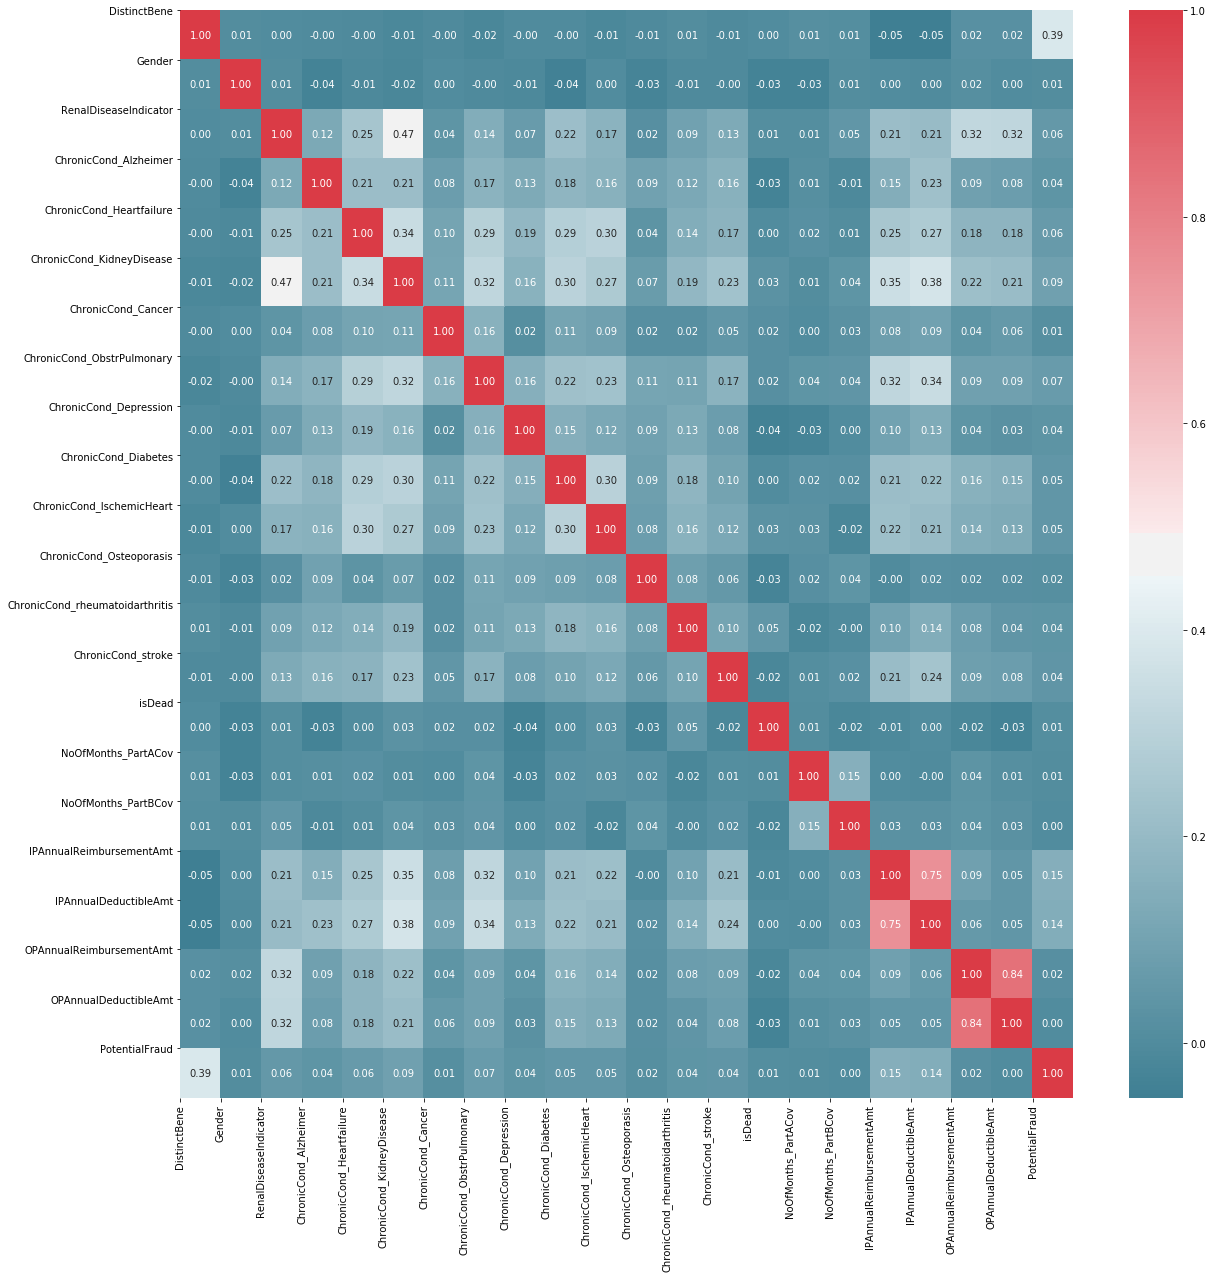

In [0]:
heatMap(demo_agg)

In [0]:
# plot continuous feature
def plot_con(df, col_name, full_name, ratio=True):
    
    # Plot without ProtentialFraud
    if ratio==False:
        f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=90)
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
        ax1.set_xlabel(full_name)
        ax1.set_ylabel('Count')
        ax1.set_title(full_name)
    else:
        f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4), dpi=90)
        sns.boxplot(y=col_name, data=df, ax=ax1)
        ax1.set_xlabel(full_name)
        ax1.set_ylabel('Ratio')
        ax1.set_title(full_name)

    # Plot with ProtentialFraud
    sns.boxplot(x='PotentialFraud', y=col_name, data=df, ax=ax2)
    ax2.set_ylabel(full_name)
    ax2.set_title(full_name + ' by PotentailFault or Not')
    ax2.set_xlabel('PotentailFault or Not')
    
    plt.tight_layout()

In [0]:
demo_agg.columns

Index(['Provider', 'DistinctBene', 'Gender', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'isDead', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'PotentialFraud'],
      dtype='object')

### Chronic Condition

In [0]:
ChronicCond_list = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']
ChronicCond = demo_agg[ChronicCond_list+['PotentialFraud']]
ChronicCond = pd.melt(ChronicCond, id_vars=['PotentialFraud'], value_vars=ChronicCond_list)

In [0]:
ChronicCond = ChronicCond.replace({'ChronicCond_':''}, regex=True)

Text(0.5, 0.98, 'Chronic Condition By Potential Fraud')

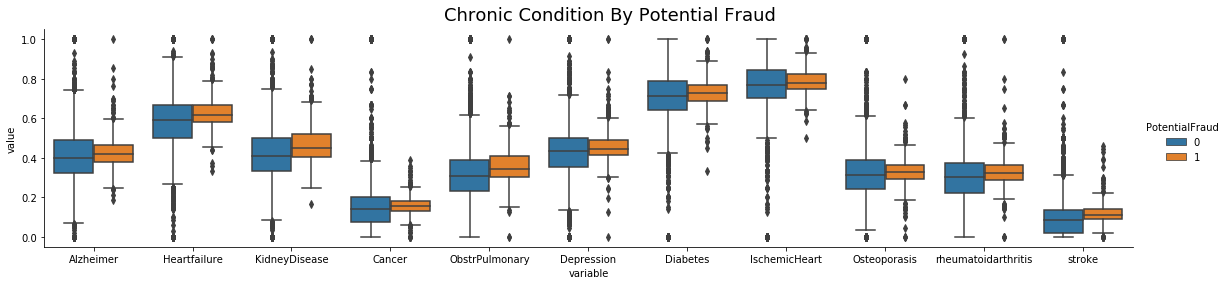

In [0]:
ax = sns.catplot(data=ChronicCond, x='variable', y='value', hue='PotentialFraud', kind='box', height = 4, aspect = 4)

ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Chronic Condition By Potential Fraud', fontsize=18)

### Distinct Number of Beneficiary

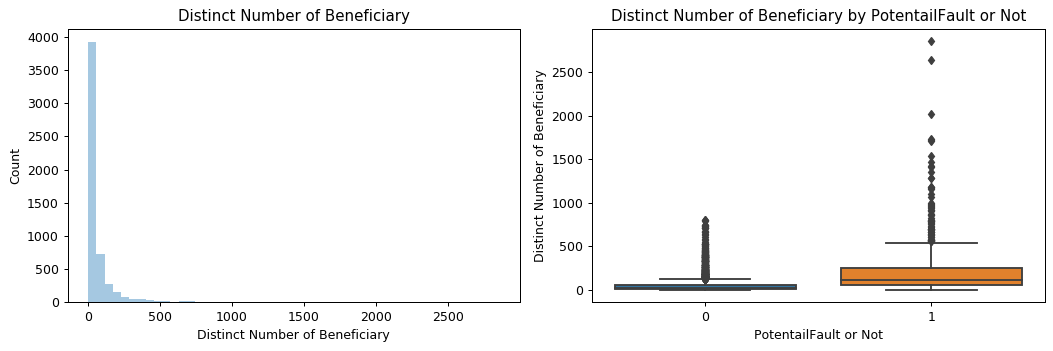

In [0]:
# DistinctBene = demo_agg[demo_agg['DistinctBene']<=demo_agg.DistinctBene.quantile(0.99)]
plot_con(demo_agg, 'DistinctBene', 'Distinct Number of Beneficiary', ratio=False)

### Gender

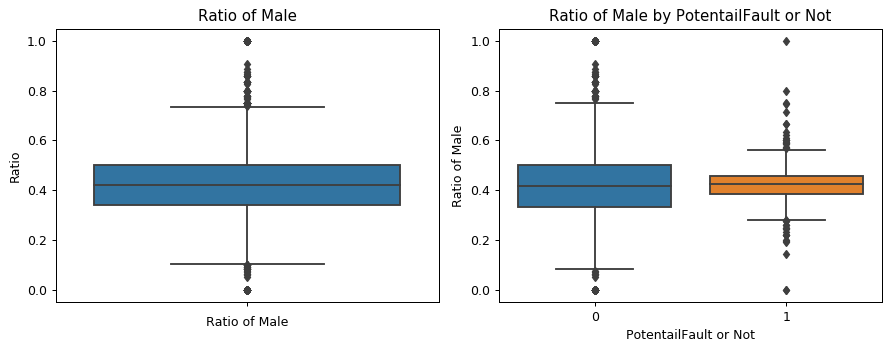

In [0]:
plot_con(demo_agg, 'Gender', 'Ratio of Male')

### Renal Disease

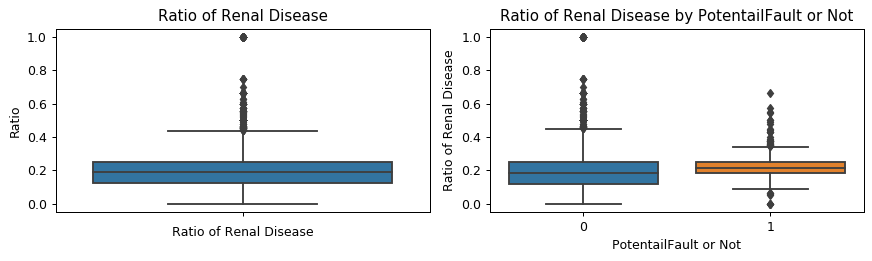

In [0]:
plot_con(demo_agg, 'RenalDiseaseIndicator', 'Renal Disease')

### Inpatient Reimbursement Amount

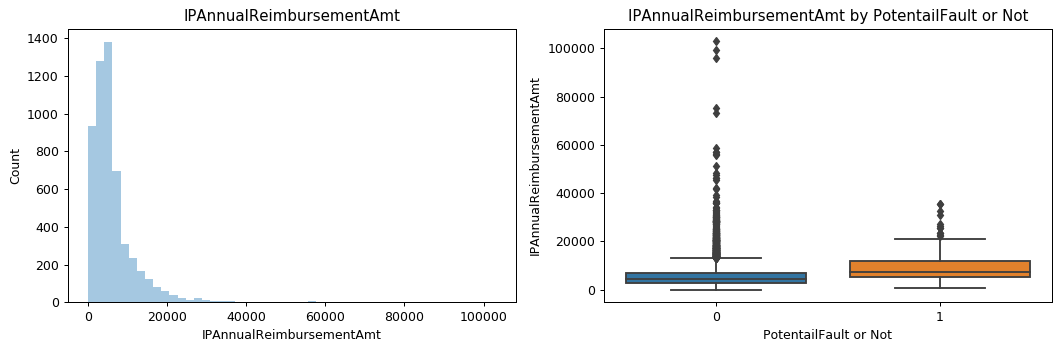

In [0]:
plot_con(demo_agg, 'IPAnnualReimbursementAmt', 'IPAnnualReimbursementAmt', ratio=False)

### Inpatient Deductible Amount

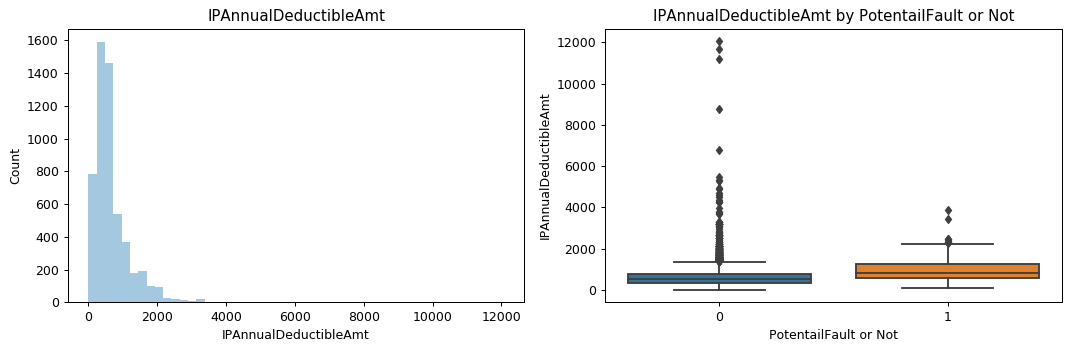

In [0]:
plot_con(demo_agg, 'IPAnnualDeductibleAmt', 'IPAnnualDeductibleAmt', ratio=False)

### Outpatient Reimbursement Amount

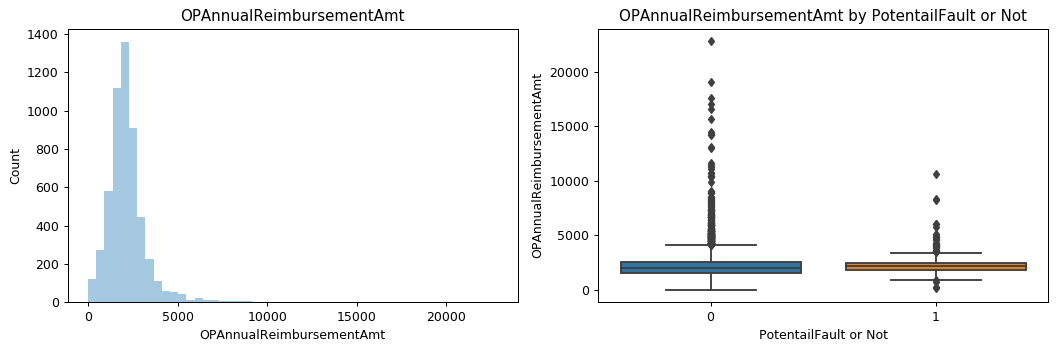

In [0]:
plot_con(demo_agg, 'OPAnnualReimbursementAmt', 'OPAnnualReimbursementAmt', ratio=False)

### Outpatient Deductible Amount

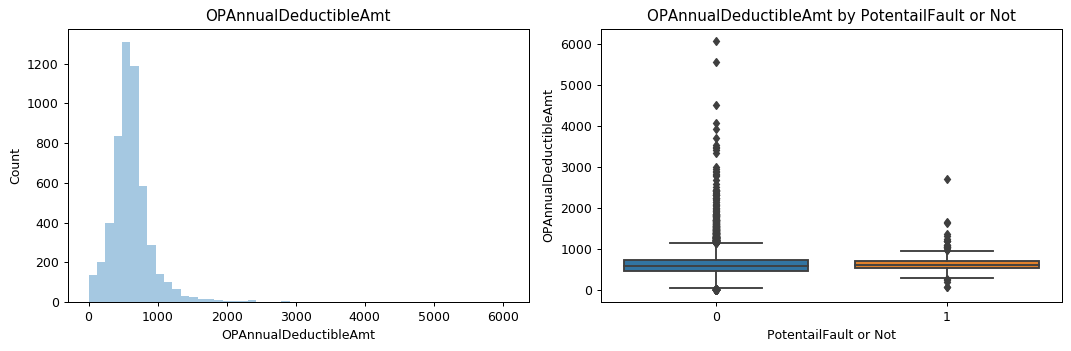

In [0]:
plot_con(demo_agg, 'OPAnnualDeductibleAmt', 'OPAnnualDeductibleAmt', ratio=False)

## Claims EDA

## Aggregation

In [0]:
# load the package
from datetime import date
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [0]:
# load the data
patient = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')
fraud = pd.read_csv('Train-1542865627584.csv', index_col = 'Provider')

### Fraud

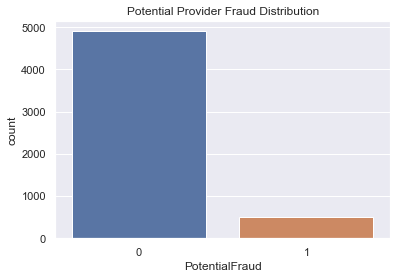

In [0]:
# map 'No' to 0 and 'Yes' to 1
fraud_map = {'No': 0, 'Yes': 1}
fraud.PotentialFraud = fraud.PotentialFraud.map(fraud_map)

# plot potential fraud distribution
sns.countplot(x = 'PotentialFraud', data = fraud)
plt.title('Potential Provider Fraud Distribution')
plt.show()

### Inpatient & Outpatient

In [0]:
inpatient.drop(['DiagnosisGroupCode', 'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_10', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',  
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], axis = 1, inplace = True)

outpatient.drop(['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_10', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',  
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], axis = 1, inplace = True)

In [0]:
inpatient.shape

(40474, 12)

In [0]:
outpatient.shape

(517737, 10)

In [0]:
# check missing values
def missing_val(df):
    missing = df.isnull().sum()
    missing_percentage = (df.isnull().sum()/len(df)*100).round(2)
    missing_val = pd.concat([missing, missing_percentage], axis = 1)
    missing_val.columns = ['Missing Values', '% Missing']
    total_columns = df.shape[1]
    missing_columns = (df.isnull().sum() > 0).sum()
    print('Out of {} columns, {} columns have missing values'.format(total_columns, missing_columns))
    return missing_val

In [0]:
missing_val(inpatient)

Out of 12 columns, 4 columns have missing values


Missing Values  % Missing
BeneID                               0       0.00
ClaimID                              0       0.00
ClaimStartDt                         0       0.00
ClaimEndDt                           0       0.00
Provider                             0       0.00
InscClaimAmtReimbursed               0       0.00
AttendingPhysician                 112       0.28
OperatingPhysician               16644      41.12
OtherPhysician                   35784      88.41
AdmissionDt                          0       0.00
DeductibleAmtPaid                  899       2.22
DischargeDt                          0       0.00

In [0]:
missing_val(outpatient)

Out of 10 columns, 3 columns have missing values


Missing Values  % Missing
BeneID                               0       0.00
ClaimID                              0       0.00
ClaimStartDt                         0       0.00
ClaimEndDt                           0       0.00
Provider                             0       0.00
InscClaimAmtReimbursed               0       0.00
AttendingPhysician                1396       0.27
OperatingPhysician              427120      82.50
OtherPhysician                  322691      62.33
DeductibleAmtPaid                    0       0.00

In [0]:
# merge data
inpatient['In'] = 1
outpatient['Out'] = 1
patientDOB = patient[['BeneID', 'DOB']]

claims = inpatient.append(outpatient)
claims = claims.merge(patientDOB, how = 'left', on = 'BeneID')

In [0]:
claims.shape

(558211, 15)

In [0]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 15 columns):
AdmissionDt               40474 non-null object
AttendingPhysician        556703 non-null object
BeneID                    558211 non-null object
ClaimEndDt                558211 non-null object
ClaimID                   558211 non-null object
ClaimStartDt              558211 non-null object
DeductibleAmtPaid         557312 non-null float64
DischargeDt               40474 non-null object
In                        40474 non-null float64
InscClaimAmtReimbursed    558211 non-null int64
OperatingPhysician        114447 non-null object
OtherPhysician            199736 non-null object
Out                       517737 non-null float64
Provider                  558211 non-null object
DOB                       558211 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 68.1+ MB


In [0]:
claims.head()

AdmissionDt AttendingPhysician     BeneID  ClaimEndDt   ClaimID  \
0  2009-04-12          PHY390922  BENE11001  2009-04-18  CLM46614   
1  2009-08-31          PHY318495  BENE11001  2009-09-02  CLM66048   
2  2009-09-17          PHY372395  BENE11001  2009-09-20  CLM68358   
3  2009-02-14          PHY369659  BENE11011  2009-02-22  CLM38412   
4  2009-08-13          PHY379376  BENE11014  2009-08-30  CLM63689   

  ClaimStartDt  DeductibleAmtPaid DischargeDt   In  InscClaimAmtReimbursed  \
0   2009-04-12             1068.0  2009-04-18  1.0                   26000   
1   2009-08-31             1068.0  2009-09-02  1.0                    5000   
2   2009-09-17             1068.0  2009-09-20  1.0                    5000   
3   2009-02-14             1068.0  2009-02-22  1.0                    5000   
4   2009-08-13             1068.0  2009-08-30  1.0                   10000   

  OperatingPhysician OtherPhysician  Out  Provider         DOB  
0                NaN            NaN  NaN  PRV55912  1943-01-01  
1          PHY318495            NaN  NaN  PRV55907  1943-01-01  
2                NaN      PHY324689  NaN  PRV56046  1943-01-01  
3          PHY392961      PHY349768  NaN  PRV52405  1914-03-01  
4          PHY398258            NaN  NaN  PRV56614  1938-04-01

In [0]:
# convert all date variables to datetime datatype
claims.DOB = pd.to_datetime(claims.DOB)
claims.AdmissionDt = pd.to_datetime(claims.AdmissionDt)
claims.DischargeDt = pd.to_datetime(claims.DischargeDt)
claims.ClaimStartDt = pd.to_datetime(claims.ClaimStartDt)
claims.ClaimEndDt = pd.to_datetime(claims.ClaimEndDt)

In [0]:
# derive patient age
claims['Age'] = round(((claims.ClaimStartDt - claims.DOB).dt.days)/365, 0)

In [0]:
claims.describe(include = 'all')

AdmissionDt AttendingPhysician     BeneID  \
count                 40474             556703     558211   
unique                  398              82063     138556   
top     2009-02-10 00:00:00          PHY330576  BENE42721   
freq                    144               2534         29   
first   2008-11-27 00:00:00                NaN        NaN   
last    2009-12-31 00:00:00                NaN        NaN   
mean                    NaN                NaN        NaN   
std                     NaN                NaN        NaN   
min                     NaN                NaN        NaN   
25%                     NaN                NaN        NaN   
50%                     NaN                NaN        NaN   
75%                     NaN                NaN        NaN   
max                     NaN                NaN        NaN   

                 ClaimEndDt    ClaimID         ClaimStartDt  \
count                558211     558211               558211   
unique                  366     558211                  398   
top     2009-03-03 00:00:00  CLM268995  2009-01-31 00:00:00   
freq                   1707          1                 1709   
first   2008-12-28 00:00:00        NaN  2008-11-27 00:00:00   
last    2009-12-31 00:00:00        NaN  2009-12-31 00:00:00   
mean                    NaN        NaN                  NaN   
std                     NaN        NaN                  NaN   
min                     NaN        NaN                  NaN   
25%                     NaN        NaN                  NaN   
50%                     NaN        NaN                  NaN   
75%                     NaN        NaN                  NaN   
max                     NaN        NaN                  NaN   

        DeductibleAmtPaid          DischargeDt       In  \
count       557312.000000                40474  40474.0   
unique                NaN                  365      NaN   
top                   NaN  2009-02-11 00:00:00      NaN   
freq                  NaN                  153      NaN   
first                 NaN  2009-01-01 00:00:00      NaN   
last                  NaN  2009-12-31 00:00:00      NaN   
mean            78.421085                  NaN      1.0   
std            274.016812                  NaN      0.0   
min              0.000000                  NaN      1.0   
25%              0.000000                  NaN      1.0   
50%              0.000000                  NaN      1.0   
75%              0.000000                  NaN      1.0   
max           1068.000000                  NaN      1.0   

        InscClaimAmtReimbursed OperatingPhysician OtherPhysician       Out  \
count            558211.000000             114447         199736  517737.0   
unique                     NaN              35315          46457       NaN   
top                        NaN          PHY330576      PHY412132       NaN   
freq                       NaN                424           1247       NaN   
first                      NaN                NaN            NaN       NaN   
last                       NaN                NaN            NaN       NaN   
mean                997.012133                NaN            NaN       1.0   
std                3821.534891                NaN            NaN       0.0   
min                   0.000000                NaN            NaN       1.0   
25%                  40.000000                NaN            NaN       1.0   
50%                  80.000000                NaN            NaN       1.0   
75%                 300.000000                NaN            NaN       1.0   
max              125000.000000                NaN            NaN       1.0   

        Provider                  DOB            Age  
count     558211               558211  558211.000000  
unique      5410                  900            NaN  
top     PRV51459  1943-12-01 00:00:00            NaN  
freq        8240                 2072            NaN  
first        NaN  1909-01-01 00:00:00            NaN  
last         NaN  1983-12-01

In [0]:
# Only keep 2009 data
claims = claims.loc[claims.ClaimStartDt >= date(2009, 1, 1)]

In [0]:
claims.describe(include = 'all')

AdmissionDt AttendingPhysician     BeneID  \
count                 39788             554012     555506   
unique                  367              81849     138423   
top     2009-02-10 00:00:00          PHY330576  BENE59303   
freq                    144               2525         29   
first   2008-12-29 00:00:00                NaN        NaN   
last    2009-12-31 00:00:00                NaN        NaN   
mean                    NaN                NaN        NaN   
std                     NaN                NaN        NaN   
min                     NaN                NaN        NaN   
25%                     NaN                NaN        NaN   
50%                     NaN                NaN        NaN   
75%                     NaN                NaN        NaN   
max                     NaN                NaN        NaN   

                 ClaimEndDt    ClaimID         ClaimStartDt  \
count                555506     555506               555506   
unique                  365     555506                  365   
top     2009-03-03 00:00:00  CLM268995  2009-01-31 00:00:00   
freq                   1707          1                 1709   
first   2009-01-01 00:00:00        NaN  2009-01-01 00:00:00   
last    2009-12-31 00:00:00        NaN  2009-12-31 00:00:00   
mean                    NaN        NaN                  NaN   
std                     NaN        NaN                  NaN   
min                     NaN        NaN                  NaN   
25%                     NaN        NaN                  NaN   
50%                     NaN        NaN                  NaN   
75%                     NaN        NaN                  NaN   
max                     NaN        NaN                  NaN   

        DeductibleAmtPaid          DischargeDt       In  \
count       554643.000000                39788  39788.0   
unique                NaN                  365      NaN   
top                   NaN  2009-02-11 00:00:00      NaN   
freq                  NaN                  153      NaN   
first                 NaN  2009-01-01 00:00:00      NaN   
last                  NaN  2009-12-31 00:00:00      NaN   
mean            77.537744                  NaN      1.0   
std            272.534687                  NaN      0.0   
min              0.000000                  NaN      1.0   
25%              0.000000                  NaN      1.0   
50%              0.000000                  NaN      1.0   
75%              0.000000                  NaN      1.0   
max           1068.000000                  NaN      1.0   

        InscClaimAmtReimbursed OperatingPhysician OtherPhysician       Out  \
count            555506.000000             113677         199217  515718.0   
unique                     NaN              35176          46383       NaN   
top                        NaN          PHY330576      PHY412132       NaN   
freq                       NaN                424           1244       NaN   
first                      NaN                NaN            NaN       NaN   
last                       NaN                NaN            NaN       NaN   
mean                981.503638                NaN            NaN       1.0   
std                3763.811367                NaN            NaN       0.0   
min                   0.000000                NaN            NaN       1.0   
25%                  40.000000                NaN            NaN       1.0   
50%                  80.000000                NaN            NaN       1.0   
75%                 300.000000                NaN            NaN       1.0   
max              125000.000000                NaN            NaN       1.0   

        Provider                  DOB            Age  InpatientDays  
count     555506               555506  555506.000000   39788.000000  
unique      5408                  900            NaN            NaN  
top     PRV51459  1943-12-01 00:00:00            NaN            NaN  
freq        8208                 2065            NaN            NaN  
first   

<b> Age

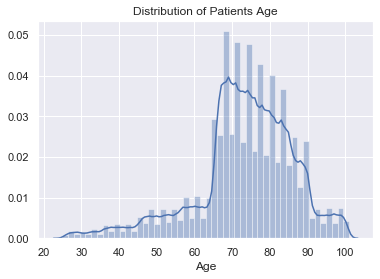

In [0]:
sns.distplot(claims.Age)
plt.title('Distribution of Patients Age')
plt.show()

In [0]:
# average age of patients
AvgAge = claims.groupby('Provider').agg({'Age': 'mean'})
AvgAge.columns = ['AvgAge']
AvgAge.head()

AvgAge
Provider           
PRV51001  78.160000
PRV51003  69.480916
PRV51004  71.778523
PRV51005  70.118659
PRV51007  68.791667

<b> AdmissionDT, DischargeDt

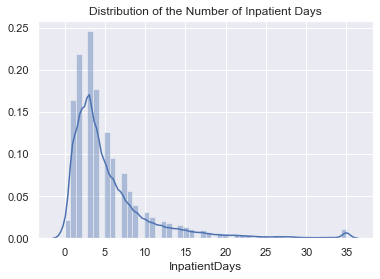

In [0]:
# inpatient days
claims['InpatientDays'] = (claims.DischargeDt - claims.AdmissionDt).dt.days

sns.distplot(claims.InpatientDays.dropna())
plt.title('Distribution of the Number of Inpatient Days')
plt.show()

In [0]:
def groupby_provider(col, func, freq = 'M'):
    temp = claims[['ClaimStartDt', 'Provider', col]]
    temp.set_index('ClaimStartDt', inplace = True)

    group = pd.DataFrame(temp.groupby([pd.Grouper(freq='M'), 'Provider']).agg(func))
    group.reset_index(inplace = True)
    group = group.pivot(index = 'Provider', columns = 'ClaimStartDt', values = col)
    group.columns = group.columns.strftime('%Y-%m-%d')
    return group

In [0]:
# average number of inpatient days per month
InpatientDays = groupby_provider('InpatientDays', 'mean')
InpatientDays = InpatientDays.add_prefix('InDays')
InpatientDays.fillna(0, inplace = True)
InpatientDays.head()

InDays2009-01-31  InDays2009-02-28  InDays2009-03-31  \
Provider                                                         
PRV51001               0.0               2.5              0.00   
PRV51003               4.5               4.0              3.25   
PRV51004               0.0               0.0              0.00   
PRV51005               0.0               0.0              0.00   
PRV51007               0.0               0.0              7.00   

          InDays2009-04-30  InDays2009-05-31  InDays2009-06-30  \
Provider                                                         
PRV51001               0.0               8.0               0.0   
PRV51003               5.0               8.0               1.2   
PRV51004               0.0               0.0               0.0   
PRV51005               0.0               0.0               0.0   
PRV51007               0.0               4.0               0.0   

          InDays2009-07-31  InDays2009-08-31  InDays2009-09-30  \
Provider                                                         
PRV51001          4.000000               0.0               0.0   
PRV51003          5.833333               3.6               8.4   
PRV51004          0.000000               0.0               0.0   
PRV51005          0.000000               0.0               0.0   
PRV51007          0.000000               5.0               0.0   

          InDays2009-10-31  InDays2009-11-30  InDays2009-12-31  
Provider                                                        
PRV51001               0.0               0.0               0.0  
PRV51003               6.0               6.6               3.0  
PRV51004               0.0               0.0               0.0  
PRV51005               0.0               0.0               0.0  
PRV51007               0.0               0.0               0.0

In [0]:
# standard deviation
InpatientDays_Std = pd.DataFrame(InpatientDays.std(axis = 1), columns = ['InDaysStd'])
InpatientDays_Std.head()

InDaysStd
Provider           
PRV51001   2.499621
PRV51003   2.121219
PRV51004   0.000000
PRV51005   0.000000
PRV51007   2.498484

In [0]:
# mean
InpatientDays_Mean = pd.DataFrame(InpatientDays.mean(axis = 1), columns = ['InDaysMean'])
InpatientDays_Mean.head()

InDaysMean
Provider            
PRV51001    1.208333
PRV51003    4.948611
PRV51004    0.000000
PRV51005    0.000000
PRV51007    1.333333

In [0]:
# total inpatient days
InpatientDays_Sum = claims.groupby('Provider').agg({'InpatientDays': sum})
InpatientDays_Sum.columns = ['TotalInDays']
InpatientDays_Sum.head()

TotalInDays
Provider             
PRV51001         25.0
PRV51003        305.0
PRV51004          0.0
PRV51005          0.0
PRV51007         16.0

<b> AttendingPhysician

In [0]:
AttendingPhysician = pd.DataFrame(claims.groupby('Provider')['AttendingPhysician'].nunique())
AttendingPhysician.head()

AttendingPhysician
Provider                    
PRV51001                  14
PRV51003                  44
PRV51004                  38
PRV51005                   6
PRV51007                  10

<b> BeneID

In [0]:
# number of unique patients per month
UniqueBeneID = groupby_provider('BeneID', pd.Series.nunique)
UniqueBeneID = UniqueBeneID.add_prefix('PatientUNo')
UniqueBeneID.fillna(0, inplace = True)
UniqueBeneID.head()

PatientUNo2009-01-31  PatientUNo2009-02-28  PatientUNo2009-03-31  \
Provider                                                                     
PRV51001                   2.0                   4.0                   3.0   
PRV51003                  13.0                  16.0                  10.0   
PRV51004                  12.0                  19.0                  18.0   
PRV51005                  86.0                  80.0                  94.0   
PRV51007                   6.0                   5.0                   9.0   

          PatientUNo2009-04-30  PatientUNo2009-05-31  PatientUNo2009-06-30  \
Provider                                                                     
PRV51001                   2.0                   5.0                   3.0   
PRV51003                  10.0                   7.0                  14.0   
PRV51004                  10.0                   8.0                  11.0   
PRV51005                  83.0                  71.0                  82.0   
PRV51007                   3.0                   9.0                   9.0   

          PatientUNo2009-07-31  PatientUNo2009-08-31  PatientUNo2009-09-30  \
Provider                                                                     
PRV51001                   2.0                   1.0                   1.0   
PRV51003                  11.0                  13.0                   9.0   
PRV51004                  14.0                  10.0                  12.0   
PRV51005                  83.0                  87.0                  91.0   
PRV51007                   3.0                   6.0                   7.0   

          PatientUNo2009-10-31  PatientUNo2009-11-30  PatientUNo2009-12-31  
Provider                                                                    
PRV51001                   0.0                   0.0                   2.0  
PRV51003                  11.0                  11.0                   5.0  
PRV51004                  11.0                   8.0                  16.0  
PRV51005                  91.0                  66.0                  70.0  
PRV51007                   2.0                   6.0                   6.0

In [0]:
# standard deviation
unibene_Std = pd.DataFrame(UniqueBeneID.std(axis = 1), columns = ['UniBeneStd'])
unibene_Std.head()

UniBeneStd
Provider            
PRV51001    1.505042
PRV51003    3.010084
PRV51004    3.629634
PRV51005    8.913728
PRV51007    2.391589

In [0]:
# mean
unibene_Mean = pd.DataFrame(UniqueBeneID.mean(axis = 1), columns = ['UniBeneMean'])
unibene_Mean.head()

UniBeneMean
Provider             
PRV51001     2.083333
PRV51003    10.833333
PRV51004    12.416667
PRV51005    82.000000
PRV51007     5.916667

In [0]:
# total patients
total_patients = claims.groupby('Provider').agg({'BeneID': 'nunique'})
total_patients.columns = ['TotalPatients']
total_patients.head()

TotalPatients
Provider               
PRV51001             24
PRV51003            117
PRV51004            138
PRV51005            495
PRV51007             58

<b>ClaimStartDt, ClaimEndDt

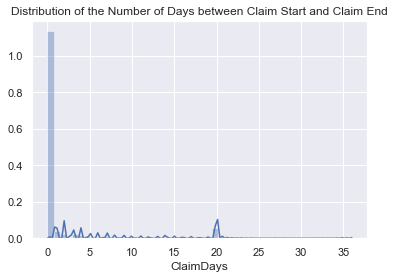

In [0]:
# create variable: claim duration
claims['ClaimDays'] = (claims.ClaimEndDt - claims.ClaimStartDt).dt.days

sns.distplot(claims.ClaimDays)
plt.title('Distribution of the Number of Days between Claim Start and Claim End')

plt.show()

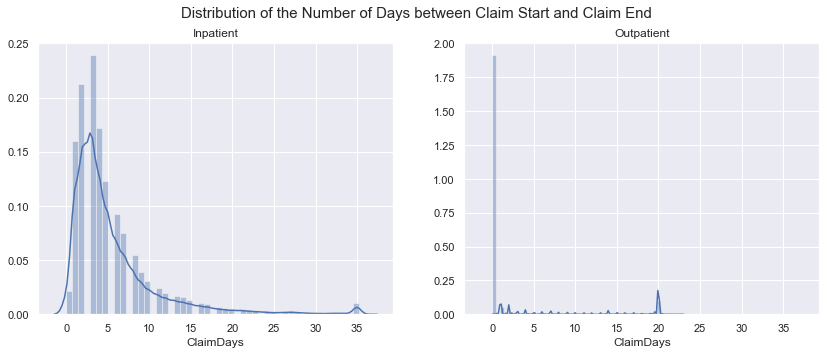

In [0]:
# Inpatient and Outpatient
figure, axes = plt.subplots(1, 2, figsize=(14, 5), sharex = True)

sns.distplot(claims.loc[claims.In == 1, 'ClaimDays'], ax = axes[0])
axes[0].set_title('Inpatient')

sns.distplot(claims.loc[claims.Out == 1, 'ClaimDays'], ax = axes[1])
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of the Number of Days between Claim Start and Claim End', fontsize = 15)
plt.show()

In [0]:
# monthly average claim days
ClaimDays = groupby_provider('ClaimDays', 'mean')
ClaimDays = ClaimDays.add_prefix('ClaimDays')
ClaimDays.fillna(0, inplace = True)
ClaimDays.head()

ClaimDays2009-01-31  ClaimDays2009-02-28  ClaimDays2009-03-31  \
Provider                                                                  
PRV51001             0.000000             3.500000             0.333333   
PRV51003             3.615385             2.750000             6.100000   
PRV51004             1.666667             0.631579             0.666667   
PRV51005             1.382353             0.821782             1.132743   
PRV51007             0.000000             0.000000             0.777778   

          ClaimDays2009-04-30  ClaimDays2009-05-31  ClaimDays2009-06-30  \
Provider                                                                  
PRV51001             0.000000             3.400000             0.000000   
PRV51003             4.800000             6.500000             2.000000   
PRV51004             2.000000             2.625000             0.090909   
PRV51005             1.295918             1.722892             0.902913   
PRV51007             0.000000             1.000000             2.222222   

          ClaimDays2009-07-31  ClaimDays2009-08-31  ClaimDays2009-09-30  \
Provider                                                                  
PRV51001             2.000000             0.000000             0.000000   
PRV51003             3.181818             3.076923             4.666667   
PRV51004             0.357143             3.600000             3.333333   
PRV51005             0.380435             1.676768             1.523364   
PRV51007             0.000000             3.333333             1.857143   

          ClaimDays2009-10-31  ClaimDays2009-11-30  ClaimDays2009-12-31  
Provider                                                                 
PRV51001             0.000000             0.000000             0.000000  
PRV51003             2.727273             3.636364             0.600000  
PRV51004             2.090909             0.000000             1.437500  
PRV51005             0.369369             0.643836             0.753086  
PRV51007             0.000000             0.000000             0.000000

In [0]:
# standard deviation
ClaimDays_Std = pd.DataFrame(ClaimDays.std(axis = 1), columns = ['ClaimDaysStd'])
ClaimDays_Std.head()

ClaimDaysStd
Provider              
PRV51001      1.375651
PRV51003      1.671003
PRV51004      1.229821
PRV51005      0.475384
PRV51007      1.130750

In [0]:
# mean
ClaimDays_Mean = pd.DataFrame(ClaimDays.mean(axis = 1), columns = ['ClaimDaysMean'])
ClaimDays_Mean.head()

ClaimDaysMean
Provider               
PRV51001       0.769444
PRV51003       3.637869
PRV51004       1.541642
PRV51005       1.050455
PRV51007       0.765873

<b> ClaimID

In [0]:
# number of claims per month
ClaimID = groupby_provider('ClaimID', 'count')
ClaimID = ClaimID.add_prefix('ClaimNo')
ClaimID.fillna(0, inplace = True)
ClaimID.head()

ClaimNo2009-01-31  ClaimNo2009-02-28  ClaimNo2009-03-31  \
Provider                                                            
PRV51001                2.0                4.0                3.0   
PRV51003               13.0               16.0               10.0   
PRV51004               12.0               19.0               18.0   
PRV51005              102.0              101.0              113.0   
PRV51007                6.0                5.0                9.0   

          ClaimNo2009-04-30  ClaimNo2009-05-31  ClaimNo2009-06-30  \
Provider                                                            
PRV51001                2.0                5.0                3.0   
PRV51003               10.0                8.0               14.0   
PRV51004               10.0                8.0               11.0   
PRV51005               98.0               83.0              103.0   
PRV51007                4.0                9.0                9.0   

          ClaimNo2009-07-31  ClaimNo2009-08-31  ClaimNo2009-09-30  \
Provider                                                            
PRV51001                2.0                1.0                1.0   
PRV51003               11.0               13.0                9.0   
PRV51004               14.0               10.0               12.0   
PRV51005               92.0               99.0              107.0   
PRV51007                3.0                6.0                7.0   

          ClaimNo2009-10-31  ClaimNo2009-11-30  ClaimNo2009-12-31  
Provider                                                           
PRV51001                0.0                0.0                2.0  
PRV51003               11.0               11.0                5.0  
PRV51004               11.0                8.0               16.0  
PRV51005              111.0               73.0               81.0  
PRV51007                2.0                6.0                6.0

In [0]:
# standard deviation
ClaimNum_Std = pd.DataFrame(ClaimID.std(axis = 1), columns = ['ClaimNumStd'])
ClaimNum_Std.head()

ClaimNumStd
Provider             
PRV51001     1.505042
PRV51003     2.906367
PRV51004     3.629634
PRV51005    12.383701
PRV51007     2.296242

In [0]:
# mean
ClaimNum_Mean = pd.DataFrame(ClaimID.mean(axis = 1), columns = ['ClaimNumMean'])
ClaimNum_Mean.head()

ClaimNumMean
Provider              
PRV51001      2.083333
PRV51003     10.916667
PRV51004     12.416667
PRV51005     96.916667
PRV51007      6.000000

In [0]:
# total claims
total_claim = claims.groupby('Provider').agg({'ClaimID': 'count'})
total_claim.columns = ['TotalClaim']
total_claim.head()

TotalClaim
Provider            
PRV51001          25
PRV51003         131
PRV51004         149
PRV51005        1163
PRV51007          72

<b> DeductibleAmtPaid

In [0]:
# average deductible amount paid per month
DeductibleAmtPaid = groupby_provider('DeductibleAmtPaid', 'mean')
DeductibleAmtPaid = DeductibleAmtPaid.add_prefix('Deductible')
DeductibleAmtPaid.fillna(0, inplace = True)
DeductibleAmtPaid.head()

Deductible2009-01-31  Deductible2009-02-28  Deductible2009-03-31  \
Provider                                                                     
PRV51001              0.000000            534.000000              0.000000   
PRV51003            492.923077            600.750000            427.200000   
PRV51004              2.500000              0.000000              0.000000   
PRV51005              4.019608              3.366337              2.477876   
PRV51007              0.000000              0.000000            119.777778   

          Deductible2009-04-30  Deductible2009-05-31  Deductible2009-06-30  \
Provider                                                                     
PRV51001              0.000000            427.200000              0.000000   
PRV51003            647.800000            534.000000            381.428571   
PRV51004             10.000000              0.000000              0.000000   
PRV51005              7.142857              5.903614              1.359223   
PRV51007              0.000000            118.666667              0.000000   

          Deductible2009-07-31  Deductible2009-08-31  Deductible2009-09-30  \
Provider                                                                     
PRV51001            534.000000              0.000000              0.000000   
PRV51003            582.545455            410.769231            593.333333   
PRV51004              0.714286              0.000000              0.000000   
PRV51005              1.413043              2.828283              1.214953   
PRV51007             16.666667            178.000000              0.000000   

          Deductible2009-10-31  Deductible2009-11-30  Deductible2009-12-31  
Provider                                                                    
PRV51001              0.000000              0.000000              0.000000  
PRV51003            485.454545            485.454545            213.600000  
PRV51004             10.000000              0.000000              3.750000  
PRV51005              1.711712              3.424658              4.444444  
PRV51007              0.000000              0.000000              0.000000

In [0]:
# standard deviation
Deductible_Std = pd.DataFrame(DeductibleAmtPaid.std(axis = 1), columns = ['DeductibleStd'])
Deductible_Std.head()

DeductibleStd
Provider               
PRV51001     226.938101
PRV51003     119.373275
PRV51004       3.816630
PRV51005       1.870401
PRV51007      63.788121

In [0]:
# mean
Deductible_Mean = pd.DataFrame(DeductibleAmtPaid.mean(axis = 1), columns = ['DeductibleMean'])
Deductible_Mean.head()

DeductibleMean
Provider                
PRV51001      124.600000
PRV51003      487.938230
PRV51004        2.247024
PRV51005        3.275551
PRV51007       36.092593

In [0]:
# total deductible
total_deductible = claims.groupby('Provider').agg({'DeductibleAmtPaid': sum})
total_deductible.columns = ['TotalDeductible']
total_deductible.head()

TotalDeductible
Provider                 
PRV51001           5340.0
PRV51003          65218.0
PRV51004            310.0
PRV51005           3700.0
PRV51007           3264.0

<b> In

In [0]:
# number of inpatient patients per month
In = groupby_provider('In', 'count')
In = In.add_prefix('In')
In.fillna(0, inplace = True)
In.head()

In2009-01-31  In2009-02-28  In2009-03-31  In2009-04-30  \
Provider                                                           
PRV51001           0.0           2.0           0.0           0.0   
PRV51003           6.0           9.0           4.0           6.0   
PRV51004           0.0           0.0           0.0           0.0   
PRV51005           0.0           0.0           0.0           0.0   
PRV51007           0.0           0.0           1.0           0.0   

          In2009-05-31  In2009-06-30  In2009-07-31  In2009-08-31  \
Provider                                                           
PRV51001           2.0           0.0           1.0           0.0   
PRV51003           4.0           5.0           6.0           5.0   
PRV51004           0.0           0.0           0.0           0.0   
PRV51005           0.0           0.0           0.0           0.0   
PRV51007           1.0           0.0           0.0           1.0   

          In2009-09-30  In2009-10-31  In2009-11-30  In2009-12-31  
Provider                                                          
PRV51001           0.0           0.0           0.0           0.0  
PRV51003           5.0           5.0           5.0           1.0  
PRV51004           0.0           0.0           0.0           0.0  
PRV51005           0.0           0.0           0.0           0.0  
PRV51007           0.0           0.0           0.0           0.0

In [0]:
# standard deviation
In_Std = pd.DataFrame(In.std(axis = 1), columns = ['InStd'])
In_Std.head()

InStd
Provider          
PRV51001  0.792961
PRV51003  1.831955
PRV51004  0.000000
PRV51005  0.000000
PRV51007  0.452267

In [0]:
# mean
In_Mean = pd.DataFrame(In.mean(axis = 1), columns = ['InMean'])
In_Mean.head()

InMean
Provider          
PRV51001  0.416667
PRV51003  5.083333
PRV51004  0.000000
PRV51005  0.000000
PRV51007  0.250000

In [0]:
# total inpatients
total_in = claims.groupby('Provider').agg({'In': sum})
total_in.columns = ['TotalInpatients']
total_in.head()

TotalInpatients
Provider                 
PRV51001              5.0
PRV51003             61.0
PRV51004              0.0
PRV51005              0.0
PRV51007              3.0

<b> InscClaimAmtReimbursed	

In [0]:
# average reimbursement amount paid per month
InscClaimAmtReimbursed = groupby_provider('InscClaimAmtReimbursed', 'mean')
InscClaimAmtReimbursed = InscClaimAmtReimbursed.add_prefix('Reimbursed')
InscClaimAmtReimbursed.fillna(0, inplace = True)
InscClaimAmtReimbursed.head()

Reimbursed2009-01-31  Reimbursed2009-02-28  Reimbursed2009-03-31  \
Provider                                                                     
PRV51001            505.000000           2025.000000            216.666667   
PRV51003           5036.923077           8034.375000           4194.000000   
PRV51004            377.500000            254.210526            290.555556   
PRV51005            181.176471            253.465347            235.398230   
PRV51007             51.666667            292.000000            561.111111   

          Reimbursed2009-04-30  Reimbursed2009-05-31  Reimbursed2009-06-30  \
Provider                                                                     
PRV51001            800.000000          11000.000000            196.666667   
PRV51003           3370.000000           5437.500000           2098.571429   
PRV51004            512.000000            406.250000            422.727273   
PRV51005            203.469388            228.915663            239.417476   
PRV51007            120.000000            776.666667            155.555556   

          Reimbursed2009-07-31  Reimbursed2009-08-31  Reimbursed2009-09-30  \
Provider                                                                     
PRV51001          18035.000000            400.000000            300.000000   
PRV51003           6206.363636           3473.846154           4187.777778   
PRV51004            524.285714             74.000000            491.666667   
PRV51005            334.782609            253.838384            321.214953   
PRV51007           1136.666667           1951.666667            184.285714   

          Reimbursed2009-10-31  Reimbursed2009-11-30  Reimbursed2009-12-31  
Provider                                                                    
PRV51001              0.000000              0.000000            460.000000  
PRV51003           3990.000000           5134.545455           1526.000000  
PRV51004            390.000000             42.500000            371.875000  
PRV51005            211.891892            184.246575            236.049383  
PRV51007            265.000000             38.333333            141.666667

In [0]:
# standard deviation
Insc_Std = pd.DataFrame(InscClaimAmtReimbursed.std(axis = 1), columns = ['InscStd'])
Insc_Std.head()

InscStd
Provider             
PRV51001  5687.465416
PRV51003  1763.852707
PRV51004   157.037498
PRV51005    47.486238
PRV51007   571.114142

In [0]:
# mean
Insc_Mean = pd.DataFrame(InscClaimAmtReimbursed.mean(axis = 1), columns = ['InscMean'])
Insc_Mean.head()

InscMean
Provider             
PRV51001  2828.194444
PRV51003  4390.825211
PRV51004   346.464228
PRV51005   240.322197
PRV51007   472.884921

In [0]:
# total insurance paid amount
total_insc = claims.groupby('Provider').agg({'InscClaimAmtReimbursed': sum})
total_insc.columns = ['TotalInsc']
total_insc.head()

TotalInsc
Provider           
PRV51001     104640
PRV51003     601670
PRV51004      52170
PRV51005     280670
PRV51007      33710

<b>OperatingPhysician

In [0]:
OperatingPhysician = pd.DataFrame(claims.groupby('Provider')['OperatingPhysician'].nunique())
OperatingPhysician.head()

OperatingPhysician
Provider                    
PRV51001                   5
PRV51003                   7
PRV51004                  19
PRV51005                   6
PRV51007                   5

<b> OtherPhysician

In [0]:
OtherPhysician = pd.DataFrame(claims.groupby('Provider')['OtherPhysician'].nunique())
OtherPhysician.head()

OtherPhysician
Provider                
PRV51001               8
PRV51003              22
PRV51004              26
PRV51005               4
PRV51007               7

<b> Out

In [0]:
# number of outpatient patients per month
Out = groupby_provider('Out', 'count')
Out = Out.add_prefix('Out')
Out.fillna(0, inplace = True)
Out.head()

Out2009-01-31  Out2009-02-28  Out2009-03-31  Out2009-04-30  \
Provider                                                               
PRV51001            2.0            2.0            3.0            2.0   
PRV51003            7.0            7.0            6.0            4.0   
PRV51004           12.0           19.0           18.0           10.0   
PRV51005          102.0          101.0          113.0           98.0   
PRV51007            6.0            5.0            8.0            4.0   

          Out2009-05-31  Out2009-06-30  Out2009-07-31  Out2009-08-31  \
Provider                                                               
PRV51001            3.0            3.0            1.0            1.0   
PRV51003            4.0            9.0            5.0            8.0   
PRV51004            8.0           11.0           14.0           10.0   
PRV51005           83.0          103.0           92.0           99.0   
PRV51007            8.0            9.0            3.0            5.0   

          Out2009-09-30  Out2009-10-31  Out2009-11-30  Out2009-12-31  
Provider                                                              
PRV51001            1.0            0.0            0.0            2.0  
PRV51003            4.0            6.0            6.0            4.0  
PRV51004           12.0           11.0            8.0           16.0  
PRV51005          107.0          111.0           73.0           81.0  
PRV51007            7.0            2.0            6.0            6.0

In [0]:
# standard deviation
Out_Std = pd.DataFrame(Out.std(axis = 1), columns = ['OutStd'])
Out_Std.head()

OutStd
Provider           
PRV51001   1.073087
PRV51003   1.696699
PRV51004   3.629634
PRV51005  12.383701
PRV51007   2.094365

In [0]:
# mean
Out_Mean = pd.DataFrame(Out.mean(axis = 1), columns = ['OutMean'])
Out_Mean.head()

OutMean
Provider           
PRV51001   1.666667
PRV51003   5.833333
PRV51004  12.416667
PRV51005  96.916667
PRV51007   5.750000

In [0]:
# total outpatients
total_out = claims.groupby('Provider').agg({'Out': sum})
total_out.columns = ['TotalOutpatients']
total_out.head()

TotalOutpatients
Provider                  
PRV51001              20.0
PRV51003              70.0
PRV51004             149.0
PRV51005            1163.0
PRV51007              69.0

## Data Merging

In [0]:
df = AttendingPhysician.join(AvgAge)
df = df.join(InpatientDays_Std)
df = df.join(InpatientDays_Mean)
df = df.join(InpatientDays_Sum)
df = df.join(unibene_Std)
df = df.join(unibene_Mean)
df = df.join(total_patients)
df = df.join(ClaimDays_Std)
df = df.join(ClaimDays_Mean)
df = df.join(ClaimNum_Std)
df = df.join(ClaimNum_Mean)
df = df.join(total_claim)
df = df.join(Deductible_Std)
df = df.join(Deductible_Mean)
df = df.join(total_deductible)
df = df.join(In_Std)
df = df.join(In_Mean)
df = df.join(total_in)
df = df.join(Insc_Std)
df = df.join(Insc_Mean)
df = df.join(total_insc)
df = df.join(OperatingPhysician)
df = df.join(OtherPhysician)
df = df.join(Out_Std)
df = df.join(Out_Mean)
df = df.join(total_out)
df = df.join(fraud)
df.shape

(5408, 28)

In [0]:
df.head()

AttendingPhysician     AvgAge  InDaysStd  InDaysMean  TotalInDays  \
Provider                                                                      
PRV51001                  14  78.160000   2.499621    1.208333         25.0   
PRV51003                  44  69.480916   2.121219    4.948611        305.0   
PRV51004                  38  71.778523   0.000000    0.000000          0.0   
PRV51005                   6  70.118659   0.000000    0.000000          0.0   
PRV51007                  10  68.791667   2.498484    1.333333         16.0   

          UniBeneStd  UniBeneMean  TotalPatients  ClaimDaysStd  ClaimDaysMean  \
Provider                                                                        
PRV51001    1.505042     2.083333             24      1.375651       0.769444   
PRV51003    3.010084    10.833333            117      1.671003       3.637869   
PRV51004    3.629634    12.416667            138      1.229821       1.541642   
PRV51005    8.913728    82.000000            495      0.475384       1.050455   
PRV51007    2.391589     5.916667             58      1.130750       0.765873   

          ...  TotalInpatients      InscStd     InscMean  TotalInsc  \
Provider  ...                                                         
PRV51001  ...              5.0  5687.465416  2828.194444     104640   
PRV51003  ...             61.0  1763.852707  4390.825211     601670   
PRV51004  ...              0.0   157.037498   346.464228      52170   
PRV51005  ...              0.0    47.486238   240.322197     280670   
PRV51007  ...              3.0   571.114142   472.884921      33710   

          OperatingPhysician  OtherPhysician     OutStd    OutMean  \
Provider                                                             
PRV51001                   5               8   1.073087   1.666667   
PRV51003                   7              22   1.696699   5.833333   
PRV51004                  19              26   3.629634  12.416667   
PRV51005                   6               4  12.383701  96.916667   
PRV51007                   5               7   2.094365   5.750000   

          TotalOutpatients  PotentialFraud  
Provider                                    
PRV51001              20.0               0  
PRV51003              70.0               1  
PRV51004             149.0               0  
PRV51005            1163.0               1  
PRV51007              69.0               0  

[5 rows x 28 columns]

In [0]:
missing_val(df)

Out of 28 columns, 0 columns have missing values


Missing Values  % Missing
AttendingPhysician               0        0.0
AvgAge                           0        0.0
InDaysStd                        0        0.0
InDaysMean                       0        0.0
TotalInDays                      0        0.0
UniBeneStd                       0        0.0
UniBeneMean                      0        0.0
TotalPatients                    0        0.0
ClaimDaysStd                     0        0.0
ClaimDaysMean                    0        0.0
ClaimNumStd                      0        0.0
ClaimNumMean                     0        0.0
TotalClaim                       0        0.0
DeductibleStd                    0        0.0
DeductibleMean                   0        0.0
TotalDeductible                  0        0.0
InStd                            0        0.0
InMean                           0        0.0
TotalInpatients                  0        0.0
InscStd                          0        0.0
InscMean                         0        0.0
TotalInsc                        0        0.0
OperatingPhysician               0        0.0
OtherPhysician                   0        0.0
OutStd                           0        0.0
OutMean                          0        0.0
TotalOutpatients                 0        0.0
PotentialFraud                   0        0.0

### EDA

In [0]:
def fraud_plot(df, col, title):
    fig, ax = plt.subplots(3, figsize = (6, 18))
    
    sns.distplot(np.log(df[col] + 1), ax = ax[0]).set_title('Distribution Plot')
    
    sns.distplot(np.log(df.loc[df.PotentialFraud == 0, col] + 1), hist = False, color = 'b', label = 'No Fraud', kde_kws={'shade': True}, ax = ax[1])
    sns.distplot(np.log(df.loc[df.PotentialFraud == 1, col] + 1), hist = False, color = 'r', label = 'Fraud', kde_kws={'shade': True}, ax = ax[1]).set_title('Comparison Distribution Plot')
    
    sns.boxplot(x = df.PotentialFraud, y = np.log(df[col] + 1), ax = ax[2]).set_title('Box Plot')
    
    plt.suptitle(title, fontsize = 15)
    
    plt.show()

<b> AttendingPhysician	

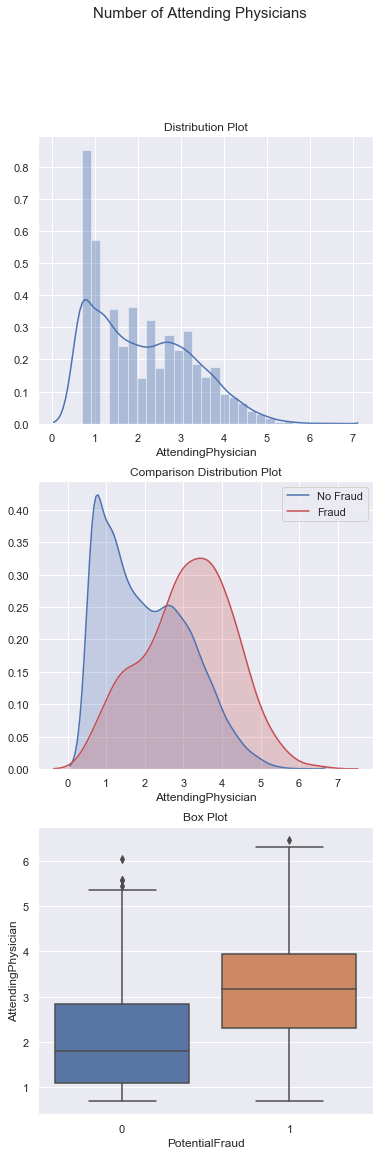

In [0]:
fraud_plot(df, 'AttendingPhysician', 'Number of Attending Physicians')

<b> Inpatient Days

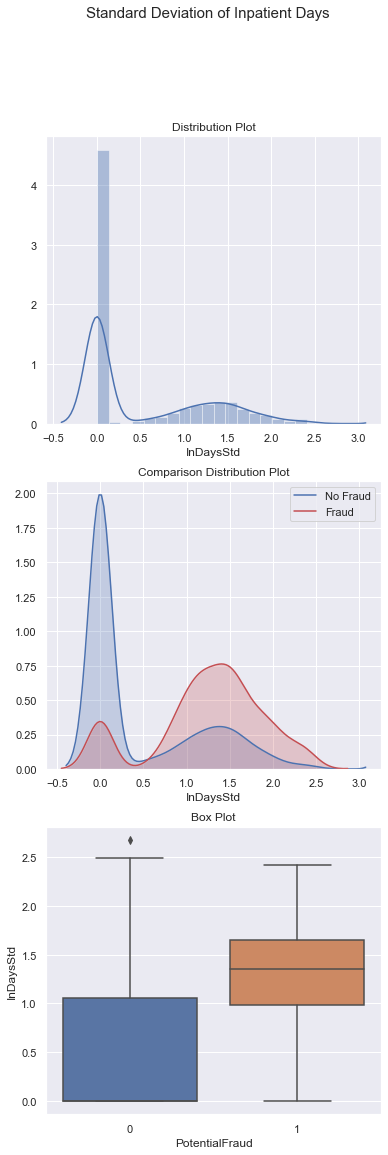

In [0]:
fraud_plot(df, 'InDaysStd', 'Standard Deviation of Inpatient Days')

<b> Number of Patients

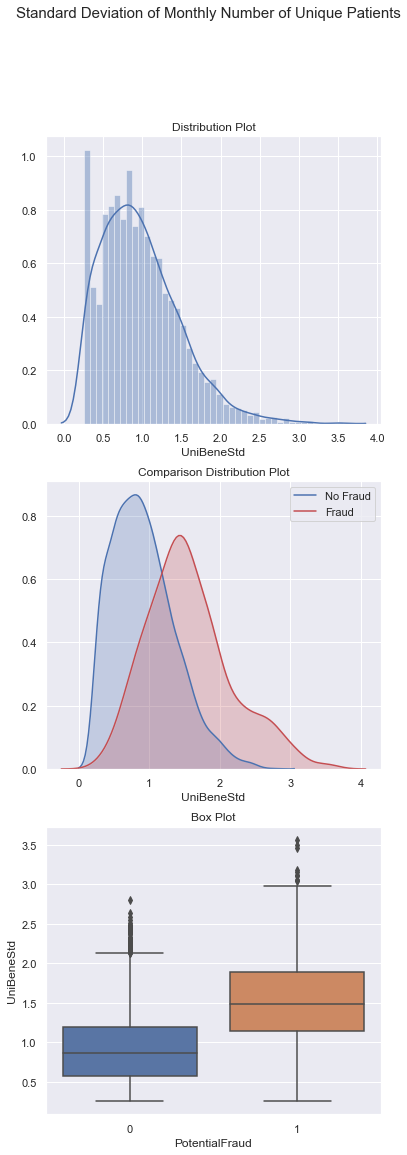

In [0]:
fraud_plot(df, 'UniBeneStd', 'Standard Deviation of Monthly Number of Unique Patients')

<b> ClaimDays

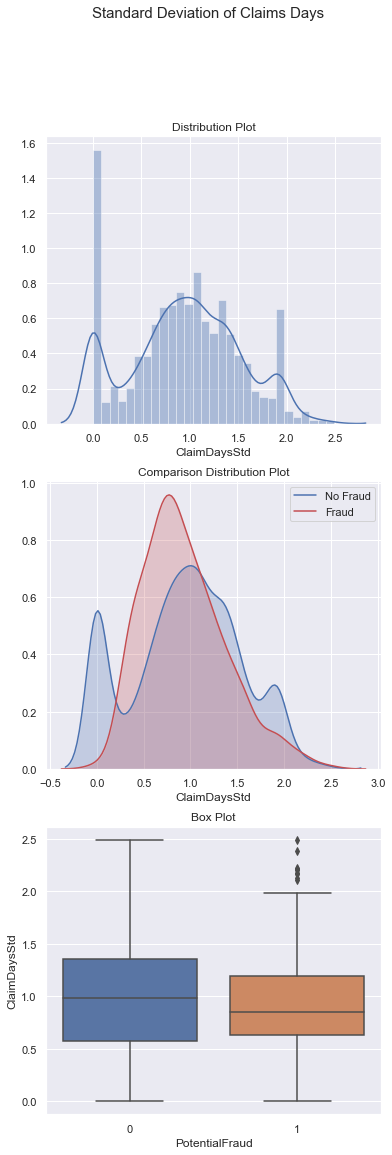

In [0]:
fraud_plot(df, 'ClaimDaysStd', 'Standard Deviation of Claims Days')

<b> ClaimNumber

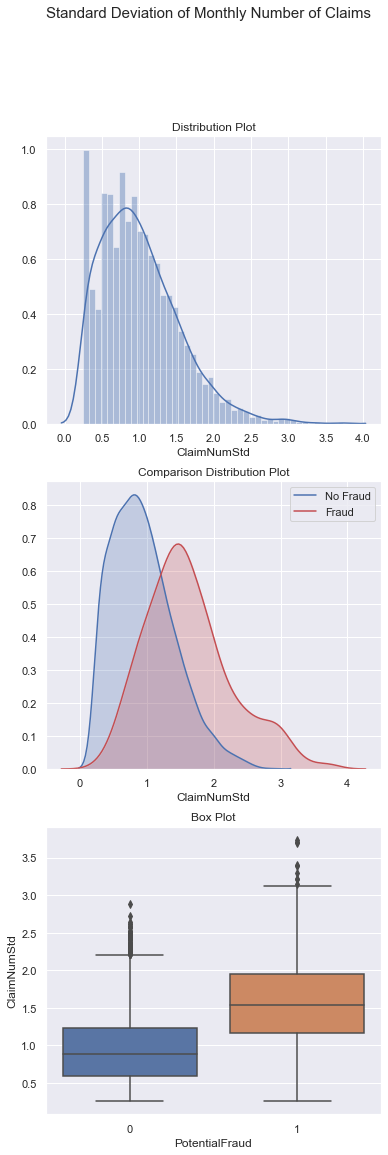

In [0]:
fraud_plot(df, 'ClaimNumStd', 'Standard Deviation of Monthly Number of Claims')

<b> Deductible

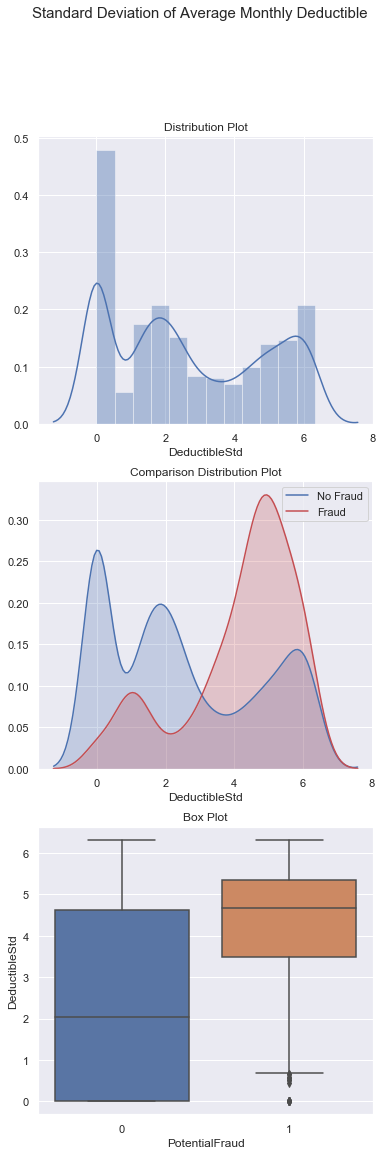

In [0]:
fraud_plot(df, 'DeductibleStd', 'Standard Deviation of Average Monthly Deductible')

<b> Number of Inpatients

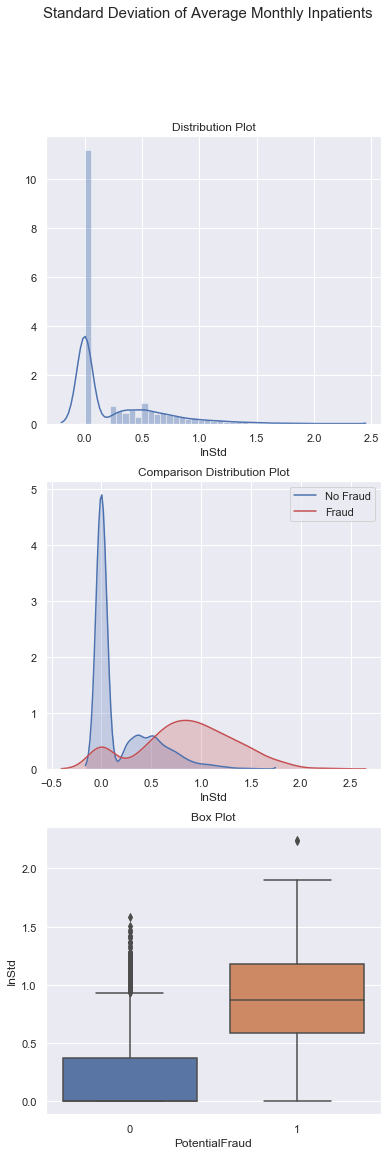

In [0]:
fraud_plot(df, 'InStd', 'Standard Deviation of Average Monthly Inpatients')

<b> Insurance Paid Amount

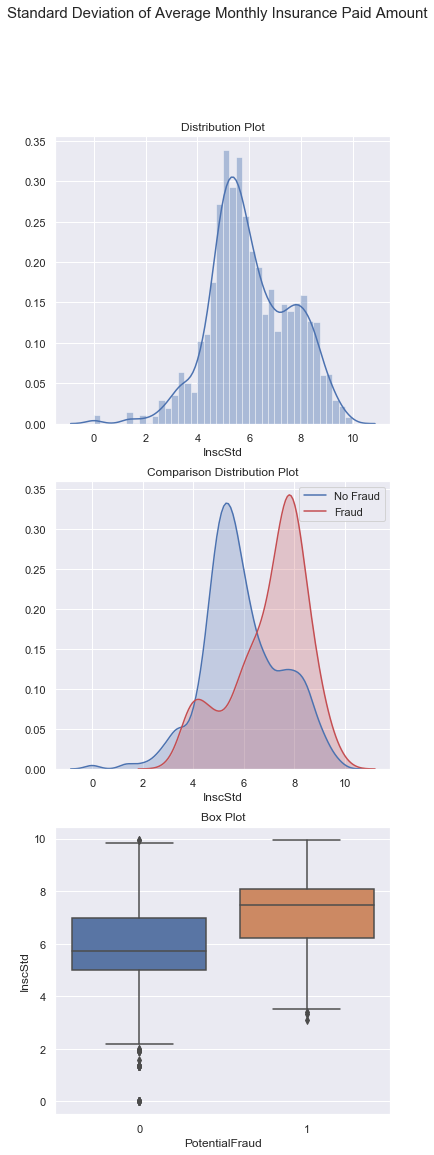

In [0]:
fraud_plot(df, 'InscStd', 'Standard Deviation of Average Monthly Insurance Paid Amount')

<b> OperatingPhysician

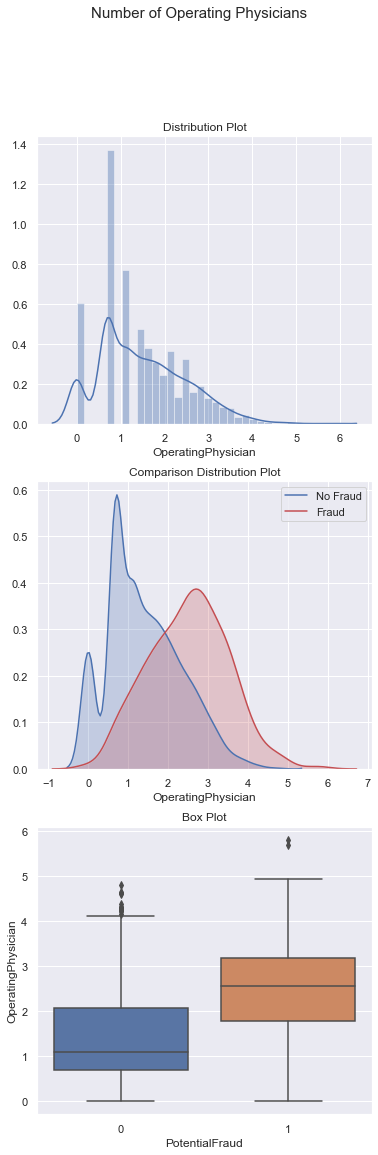

In [0]:
fraud_plot(df, 'OperatingPhysician', 'Number of Operating Physicians')

<b> OtherPhysician

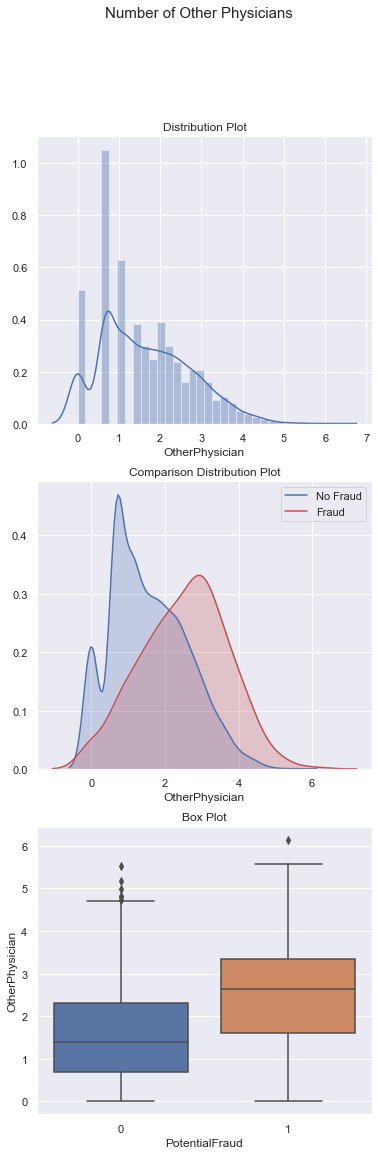

In [0]:
fraud_plot(df, 'OtherPhysician', 'Number of Other Physicians')

<b> Outpatients

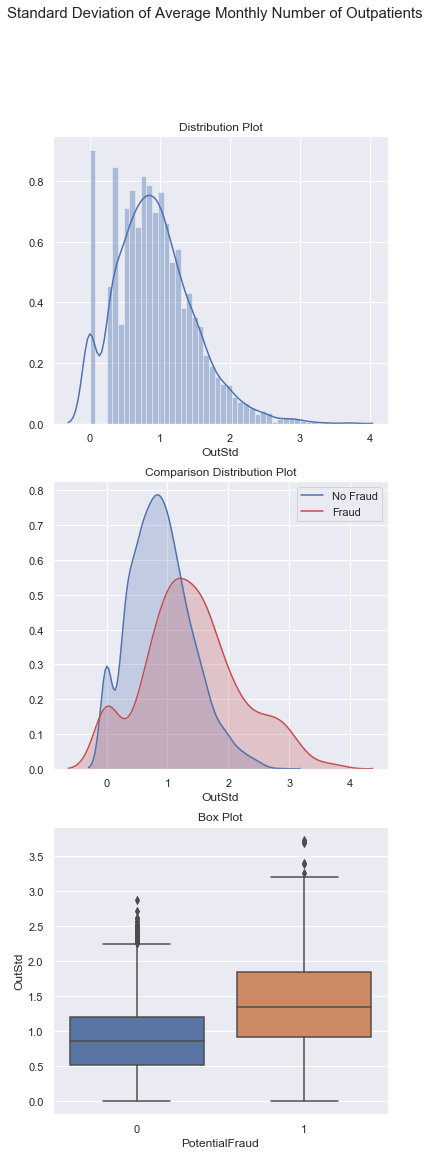

In [0]:
fraud_plot(df, 'OutStd', 'Standard Deviation of Average Monthly Number of Outpatients')

<Heatmap>

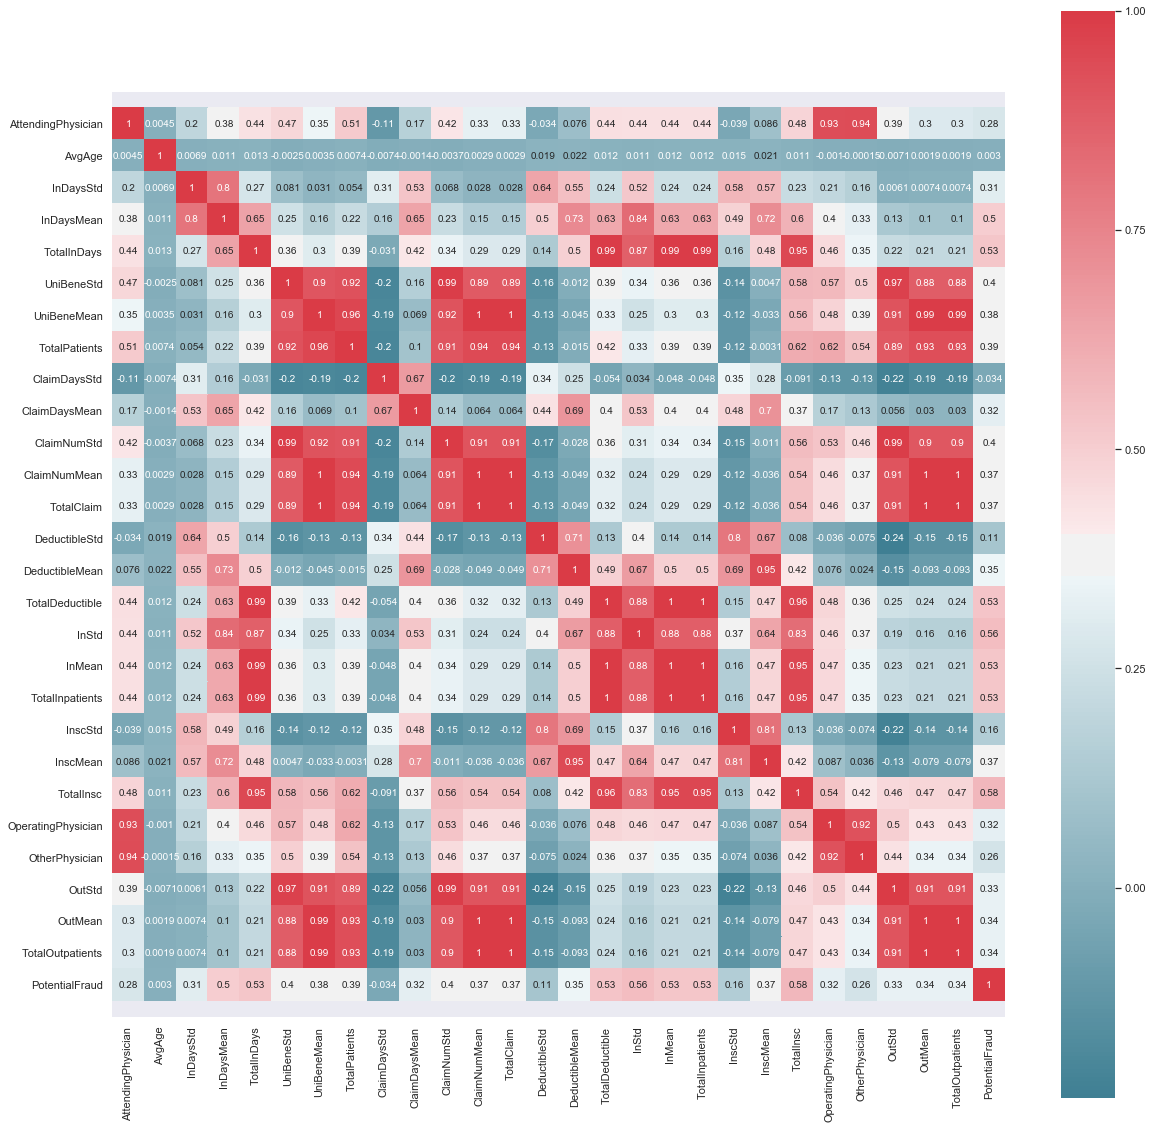

In [0]:
fig, ax = plt.subplots(figsize=(20, 20))

corr = df.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220, 10, as_cmap = True),
            square = True, annot = True)

ax.set_ylim(len(corr)+0.5, -0.5)

plt.show()

In [0]:
df.to_csv('claims1.csv')

## Codes EDA

In [0]:
# load the package
from datetime import date
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (8, 6)

In [0]:
# load the data
inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')
fraud = pd.read_csv('Train-1542865627584.csv', index_col = 'Provider')


In [0]:
inpatient = inpatient[['ClaimID','DiagnosisGroupCode', 'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_10', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',  
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6','Provider',
                        'ClaimStartDt', 'ClaimEndDt']]

outpatient = outpatient[['ClaimID','ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_10', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',  
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
                         'Provider', 'ClaimStartDt', 'ClaimEndDt']]

In [0]:
inpatient.shape

(40474, 22)

In [0]:
outpatient.shape

(517737, 21)

In [0]:
# map 'No' to 0 and 'Yes' to 1
fraud_map = {'No': 0, 'Yes': 1}
fraud.PotentialFraud = fraud.PotentialFraud.map(fraud_map)

In [0]:
diagnosis = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10']
procedure = ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']

In [0]:
diagnosisP = ['Provider','ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10']
procedureP = ['Provider','ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']

# Merging

In [0]:
# merging inpatient and outpatient
inpatient['In'] = 1
outpatient['Out'] = 1

claims = inpatient.append(outpatient)

In [0]:
# claims and patient and potential fraud


In [0]:
claims.shape

(558211, 25)

In [0]:
claims.head()

ClaimEndDt   ClaimID ClaimStartDt ClmAdmitDiagnosisCode ClmDiagnosisCode_1  \
0  2009-04-18  CLM46614   2009-04-12                  7866               1970   
1  2009-09-02  CLM66048   2009-08-31                  6186               6186   
2  2009-09-20  CLM68358   2009-09-17                 29590              29623   
3  2009-02-22  CLM38412   2009-02-14                   431              43491   
4  2009-08-30  CLM63689   2009-08-13                 78321                042   

  ClmDiagnosisCode_10 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0                 NaN               4019               5853   
1                 NaN               2948              56400   
2                 NaN              30390              71690   
3                 NaN               2762               7843   
4                 NaN               3051              34400   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5  ... ClmProcedureCode_2  \
0               7843               2768  ...                NaN   
1                NaN                NaN  ...                NaN   
2              34590              V1581  ...                NaN   
3              32723              V1041  ...                NaN   
4               5856              42732  ...                NaN   

  ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                NaN                NaN                NaN   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3                NaN                NaN                NaN   
4                NaN                NaN                NaN   

   ClmProcedureCode_6  DiagnosisGroupCode   In  Out  Provider  PotentialFraud  
0                 NaN                 201  1.0  NaN  PRV55912               1  
1                 NaN                 750  1.0  NaN  PRV55907               0  
2                 NaN                 883  1.0  NaN  PRV56046               0  
3                 NaN                 067  1.0  NaN  PRV52405               0  
4                 NaN                 975  1.0  NaN  PRV56614               0  

[5 rows x 25 columns]

In [0]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 25 columns):
ClaimEndDt               558211 non-null object
ClaimID                  558211 non-null object
ClaimStartDt             558211 non-null object
ClmAdmitDiagnosisCode    145899 non-null object
ClmDiagnosisCode_1       547758 non-null object
ClmDiagnosisCode_10      5010 non-null object
ClmDiagnosisCode_2       362605 non-null object
ClmDiagnosisCode_3       243055 non-null object
ClmDiagnosisCode_4       164536 non-null object
ClmDiagnosisCode_5       111924 non-null object
ClmDiagnosisCode_6       84392 non-null object
ClmDiagnosisCode_7       66177 non-null object
ClmDiagnosisCode_8       53444 non-null object
ClmDiagnosisCode_9       41815 non-null object
ClmProcedureCode_1       23310 non-null float64
ClmProcedureCode_2       5490 non-null float64
ClmProcedureCode_3       969 non-null float64
ClmProcedureCode_4       118 non-null float64
ClmProcedureCode_5       9 non-null 

In [0]:
claims['Admit_Diagnosis_EVCodes'] = claims['ClmAdmitDiagnosisCode'].str.contains("V|E", na=False)

In [0]:
true_false = {False: 0, True: 1}
claims.Admit_Diagnosis_EVCodes = claims.Admit_Diagnosis_EVCodes.map(true_false)

In [0]:
claims['DiagnosisGroupCode'] = claims['DiagnosisGroupCode'].replace('OTH', np.nan)

In [0]:
#claims['DiagnosisGroupCode'].sort_values().unique()

In [0]:
claims = claims.astype({'DiagnosisGroupCode': 'float'})

In [0]:
claims['DiagnosisGroupCode'].describe()

count    40361.000000
mean       431.796189
std        263.703078
min          0.000000
25%        222.000000
50%        352.000000
75%        630.000000
max        999.000000
Name: DiagnosisGroupCode, dtype: float64

In [0]:
claims['DiagnosisGroupCode'].head()

0    201.0
1    750.0
2    883.0
3     67.0
4    975.0
Name: DiagnosisGroupCode, dtype: float64

In [0]:
claims.ClaimStartDt = pd.to_datetime(claims.ClaimStartDt)
claims.ClaimEndDt = pd.to_datetime(claims.ClaimEndDt)

In [0]:
claims['diagnosis_count'] = claims[diagnosis].count(axis='columns')
claims['procedure_count'] = claims[procedure].count(axis='columns')

In [0]:
claims['Provider'].nunique()

5410

In [0]:
claims.head()

ClaimEndDt   ClaimID ClaimStartDt ClmAdmitDiagnosisCode ClmDiagnosisCode_1  \
0 2009-04-18  CLM46614   2009-04-12                  7866               1970   
1 2009-09-02  CLM66048   2009-08-31                  6186               6186   
2 2009-09-20  CLM68358   2009-09-17                 29590              29623   
3 2009-02-22  CLM38412   2009-02-14                   431              43491   
4 2009-08-30  CLM63689   2009-08-13                 78321                042   

  ClmDiagnosisCode_10 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0                 NaN               4019               5853   
1                 NaN               2948              56400   
2                 NaN              30390              71690   
3                 NaN               2762               7843   
4                 NaN               3051              34400   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5  ... ClmProcedureCode_5  \
0               7843               2768  ...                NaN   
1                NaN                NaN  ...                NaN   
2              34590              V1581  ...                NaN   
3              32723              V1041  ...                NaN   
4               5856              42732  ...                NaN   

  ClmProcedureCode_6 DiagnosisGroupCode   In  Out  Provider  PotentialFraud  \
0                NaN              201.0  1.0  NaN  PRV55912               1   
1                NaN              750.0  1.0  NaN  PRV55907               0   
2                NaN              883.0  1.0  NaN  PRV56046               0   
3                NaN               67.0  1.0  NaN  PRV52405               0   
4                NaN              975.0  1.0  NaN  PRV56614               0   

   Admit_Diagnosis_EVCodes  diagnosis_count  procedure_count  
0                        0                9                0  
1                        0                3                1  
2                        0                6                0  
3                        0                9                1  
4                        0                9                1  

[5 rows x 28 columns]

## Group By Provider

In [0]:
new_claims = claims[['Provider','ClmAdmitDiagnosisCode']]
#new_claims.head()
#new_claims.set_index('Provider', inplace=True)
#new_claims = pd.concat([new_claims[col] for col in new_claims])
#new_claims = new_claims.to_frame().dropna().reset_index()
unique_admitcode = new_claims.groupby('Provider')['ClmAdmitDiagnosisCode'].nunique().to_frame().reset_index().rename(columns={'ClmAdmitDiagnosisCode': "unique_admitcode"})
#unique_diagnosis = new_claims.groupby('Provider')[0].nunique()
#unique_diagnosis = unique_diagnosis.to_frame().reset_index().rename(columns={0: "unique_diagnosis"})
unique_admitcode.head()

Provider  unique_admitcode
0  PRV51001                11
1  PRV51003                58
2  PRV51004                25
3  PRV51005               158
4  PRV51007                17

In [0]:
new_claims = claims[['Provider','DiagnosisGroupCode']]
#new_claims.head()
#new_claims.set_index('Provider', inplace=True)
#new_claims = pd.concat([new_claims[col] for col in new_claims])
#new_claims = new_claims.to_frame().dropna().reset_index()
unique_DRG = new_claims.groupby('Provider')['DiagnosisGroupCode'].nunique().to_frame().reset_index().rename(columns={'DiagnosisGroupCode': "unique_DRG"})
#unique_diagnosis = new_claims.groupby('Provider')[0].nunique()
#unique_diagnosis = unique_diagnosis.to_frame().reset_index().rename(columns={0: "unique_diagnosis"})
unique_DRG.head()

Provider  unique_DRG
0  PRV51001           5
1  PRV51003          58
2  PRV51004           0
3  PRV51005           0
4  PRV51007           3

In [0]:
new_claims = claims[diagnosisP]
new_claims.set_index('Provider', inplace=True)
new_claims = pd.concat([new_claims[col] for col in new_claims])
new_claims = new_claims.to_frame().dropna().reset_index()
#new_claims.groupby('Provider')['0'].nunique()
unique_diagnosis = new_claims.groupby('Provider')[0].nunique().to_frame().reset_index().rename(columns={0: "unique_diagnosis"})
#fraud_diagnoses = pd.Series(diagnosis_df.to_numpy().flatten()).dropna()

In [0]:
unique_diagnosis.head()

Provider  unique_diagnosis
0  PRV51001                72
1  PRV51003               365
2  PRV51004               267
3  PRV51005              1294
4  PRV51007               165

In [0]:
unique_diagnosis.shape

(5405, 2)

In [0]:
new_claims = claims.loc[claims.In == 1, diagnosisP]
#new_claims = claims[diagnosisP]
new_claims.set_index('Provider', inplace=True)
new_claims = pd.concat([new_claims[col] for col in new_claims])
new_claims = new_claims.to_frame().dropna().reset_index()
unique_diagnosis_In = new_claims.groupby('Provider')[0].nunique()
unique_diagnosis_In = unique_diagnosis_In.to_frame().reset_index().rename(columns={0: "unique_diagnosis_In"})

In [0]:
unique_diagnosis_In.head()

Provider  unique_diagnosis_In
0  PRV51001                   34
1  PRV51003                  271
2  PRV51007                   22
3  PRV51008                   15
4  PRV51011                    8

In [0]:
new_claims = claims.loc[claims.Out == 1, diagnosisP]
#new_claims = claims[diagnosisP]
new_claims.set_index('Provider', inplace=True)
new_claims = pd.concat([new_claims[col] for col in new_claims])
new_claims = new_claims.to_frame().dropna().reset_index()
unique_diagnosis_Out = new_claims.groupby('Provider')[0].nunique()
unique_diagnosis_Out = unique_diagnosis_Out.to_frame().reset_index().rename(columns={0: "unique_diagnosis_Out"})

In [0]:
unique_diagnosis_Out.head()

Provider  unique_diagnosis_Out
0  PRV51001                    41
1  PRV51003                   137
2  PRV51004                   267
3  PRV51005                  1294
4  PRV51007                   153

In [0]:
new_claims = claims[procedureP]
new_claims.set_index('Provider', inplace=True)
new_claims = pd.concat([new_claims[col] for col in new_claims])
new_claims = new_claims.to_frame().dropna().reset_index()
#new_claims.groupby('Provider')['0'].nunique()
unique_procedure = new_claims.groupby('Provider')[0].nunique()
unique_procedure = unique_procedure.to_frame().reset_index().rename(columns={0: "unique_procedure"})
#fraud_diagnoses = pd.Series(diagnosis_df.to_numpy().flatten()).dropna()

In [0]:
unique_procedure.head()

Provider  unique_procedure
0  PRV51001                 3
1  PRV51003                39
2  PRV51007                 1
3  PRV51008                 2
4  PRV51017                 2

In [0]:
new_claims = claims.loc[claims.In == 1, procedureP]
#new_claims = claims[diagnosisP]
new_claims.set_index('Provider', inplace=True)
new_claims = pd.concat([new_claims[col] for col in new_claims])
new_claims = new_claims.to_frame().dropna().reset_index()
unique_procedure_In = new_claims.groupby('Provider')[0].nunique()
unique_procedure_In = unique_procedure_In.to_frame().reset_index().rename(columns={0: "unique_procedure_In"})

In [0]:
unique_procedure_In.head()

Provider  unique_procedure_In
0  PRV51001                    3
1  PRV51003                   39
2  PRV51007                    1
3  PRV51008                    2
4  PRV51021                   18

In [0]:
new_claims = claims.loc[claims.Out == 1, procedureP]
#new_claims = claims[diagnosisP]
new_claims.set_index('Provider', inplace=True)
new_claims = pd.concat([new_claims[col] for col in new_claims])
new_claims = new_claims.to_frame().dropna().reset_index()
unique_procedure_Out = new_claims.groupby('Provider')[0].nunique()
unique_procedure_Out = unique_procedure_Out.to_frame().reset_index().rename(columns={0: "unique_procedure_Out"})

In [0]:
unique_procedure_Out.head()

Provider  unique_procedure_Out
0  PRV51017                     2
1  PRV51113                     1
2  PRV51119                     2
3  PRV51244                     2
4  PRV51265                     1

In [0]:
def groupby_provider(col, func, freq = 'M'):
    temp = claims[['ClaimStartDt', 'Provider', col]]
    temp.set_index('ClaimStartDt', inplace = True)

    group = pd.DataFrame(temp.groupby([pd.Grouper(freq='M'), 'Provider']).agg(func))
    group.reset_index(inplace = True)
    group = group.pivot(index = 'Provider', columns = 'ClaimStartDt', values = col)
    group.columns = group.columns.strftime('%Y-%m-%d')
    return group

### Diagnosis

In [0]:
# average number of inpatient days per month
diagnosis_count = groupby_provider('diagnosis_count', 'mean')
diagnosis_count = diagnosis_count.add_prefix('Avg')
diagnosis_count.fillna(0, inplace = True)
diagnosis_count.head()

Avg2008-11-30  Avg2008-12-31  Avg2009-01-31  Avg2009-02-28  \
Provider                                                               
PRV51001            0.0            0.0       1.500000       3.750000   
PRV51003            0.0            7.0       5.000000       4.937500   
PRV51004            0.0            0.0       2.000000       2.000000   
PRV51005            0.0            3.5       2.941176       2.445545   
PRV51007            0.0            0.0       2.166667       3.400000   

          Avg2009-03-31  Avg2009-04-30  Avg2009-05-31  Avg2009-06-30  \
Provider                                                               
PRV51001       3.000000       1.500000       5.800000       2.333333   
PRV51003       4.600000       5.400000       5.875000       4.428571   
PRV51004       2.888889       2.600000       2.250000       3.181818   
PRV51005       2.522124       2.653061       2.554217       2.242718   
PRV51007       2.444444       1.250000       3.333333       4.333333   

          Avg2009-07-31  Avg2009-08-31  Avg2009-09-30  Avg2009-10-31  \
Provider                                                               
PRV51001       4.500000       2.000000       0.000000       0.000000   
PRV51003       6.454545       5.846154       6.111111       4.727273   
PRV51004       2.642857       2.100000       2.416667       3.454545   
PRV51005       2.565217       2.969697       2.626168       2.477477   
PRV51007       2.333333       3.666667       3.571429       1.500000   

          Avg2009-11-30  Avg2009-12-31  
Provider                                
PRV51001       0.000000       1.500000  
PRV51003       5.090909       4.600000  
PRV51004       2.500000       2.937500  
PRV51005       2.657534       2.395062  
PRV51007       2.166667       3.166667

In [0]:
diagnosis_count_Std = pd.DataFrame(diagnosis_count.std(axis = 1), columns = ['Diagnosis_Count_Std'])
diagnosis_count_Std.head()

Diagnosis_Count_Std
Provider                     
PRV51001             1.866580
PRV51003             1.634357
PRV51004             1.031048
PRV51005             0.774761
PRV51007             1.328274

In [0]:
diagnosis_count_mean = pd.DataFrame(diagnosis_count.mean(axis = 1), columns = ['Diagnosis_Count_Mean'])
diagnosis_count_mean.head()

Diagnosis_Count_Mean
Provider                      
PRV51001              1.848810
PRV51003              5.005076
PRV51004              2.212305
PRV51005              2.467857
PRV51007              2.380896

### Procedure

In [0]:
# average number of Admit code permonth
procedure_count = groupby_provider('procedure_count', 'mean')
procedure_count = procedure_count.add_prefix('InDays')
procedure_count.fillna(0, inplace = True)
procedure_count.head()

InDays2008-11-30  InDays2008-12-31  InDays2009-01-31  \
Provider                                                         
PRV51001               0.0               0.0          0.000000   
PRV51003               0.0               0.0          0.461538   
PRV51004               0.0               0.0          0.000000   
PRV51005               0.0               0.0          0.000000   
PRV51007               0.0               0.0          0.000000   

          InDays2009-02-28  InDays2009-03-31  InDays2009-04-30  \
Provider                                                         
PRV51001            0.2500               0.0               0.0   
PRV51003            0.3125               0.3               0.6   
PRV51004            0.0000               0.0               0.0   
PRV51005            0.0000               0.0               0.0   
PRV51007            0.0000               0.0               0.0   

          InDays2009-05-31  InDays2009-06-30  InDays2009-07-31  \
Provider                                                         
PRV51001          0.400000          0.000000          0.000000   
PRV51003          0.375000          0.214286          0.545455   
PRV51004          0.000000          0.000000          0.000000   
PRV51005          0.000000          0.000000          0.000000   
PRV51007          0.111111          0.000000          0.000000   

          InDays2009-08-31  InDays2009-09-30  InDays2009-10-31  \
Provider                                                         
PRV51001          0.000000          0.000000          0.000000   
PRV51003          0.076923          0.555556          0.454545   
PRV51004          0.000000          0.000000          0.000000   
PRV51005          0.000000          0.000000          0.000000   
PRV51007          0.000000          0.000000          0.000000   

          InDays2009-11-30  InDays2009-12-31  
Provider                                      
PRV51001          0.000000               0.0  
PRV51003          0.454545               0.0  
PRV51004          0.000000               0.0  
PRV51005          0.000000               0.0  
PRV51007          0.000000               0.0

In [0]:
procedure_count_Std = pd.DataFrame(procedure_count.std(axis = 1), columns = ['procedure_count_Std'])
procedure_count_Std.head()

procedure_count_Std
Provider                     
PRV51001             0.121630
PRV51003             0.218508
PRV51004             0.000000
PRV51005             0.000000
PRV51007             0.029696

In [0]:
procedure_count_mean = pd.DataFrame(procedure_count.mean(axis = 1), columns = ['procedure_count_Mean'])
procedure_count_mean.head()

procedure_count_Mean
Provider                      
PRV51001              0.046429
PRV51003              0.310739
PRV51004              0.000000
PRV51005              0.000000
PRV51007              0.007937

### Admit

In [0]:
# average number of inpatient days per month
admit_unique = groupby_provider('ClmAdmitDiagnosisCode', pd.Series.nunique)
admit_unique = admit_unique.add_prefix('InDays')
admit_unique.fillna(0, inplace = True)
admit_unique.head()

InDays2008-11-30  InDays2008-12-31  InDays2009-01-31  \
Provider                                                         
PRV51001               0.0               0.0               0.0   
PRV51003               0.0               1.0              11.0   
PRV51004               0.0               0.0               4.0   
PRV51005               0.0               0.0              30.0   
PRV51007               0.0               0.0               2.0   

          InDays2009-02-28  InDays2009-03-31  InDays2009-04-30  \
Provider                                                         
PRV51001               2.0               1.0               0.0   
PRV51003               8.0               6.0               8.0   
PRV51004               1.0               5.0               3.0   
PRV51005              31.0              32.0              19.0   
PRV51007               1.0               4.0               1.0   

          InDays2009-05-31  InDays2009-06-30  InDays2009-07-31  \
Provider                                                         
PRV51001               3.0               1.0               2.0   
PRV51003               4.0               7.0               7.0   
PRV51004               0.0               4.0               5.0   
PRV51005              22.0              20.0              17.0   
PRV51007               3.0               2.0               1.0   

          InDays2009-08-31  InDays2009-09-30  InDays2009-10-31  \
Provider                                                         
PRV51001               0.0               1.0               0.0   
PRV51003               5.0               5.0               5.0   
PRV51004               0.0               2.0               1.0   
PRV51005              16.0              15.0              18.0   
PRV51007               2.0               1.0               0.0   

          InDays2009-11-30  InDays2009-12-31  
Provider                                      
PRV51001               0.0               1.0  
PRV51003               7.0               1.0  
PRV51004               1.0               2.0  
PRV51005               6.0               7.0  
PRV51007               0.0               0.0

In [0]:
admit_unique_Std = pd.DataFrame(admit_unique.std(axis = 1), columns = ['Admit_unique_Std'])
admit_unique_Std.head()

Admit_unique_Std
Provider                  
PRV51001          0.974961
PRV51003          3.078640
PRV51004          1.881080
PRV51005         10.492541
PRV51007          1.251373

In [0]:
admit_unique_mean = pd.DataFrame(admit_unique.mean(axis = 1), columns = ['Admit_unique_Mean'])
admit_unique_mean.head()

Admit_unique_Mean
Provider                   
PRV51001           0.785714
PRV51003           5.357143
PRV51004           2.000000
PRV51005          16.642857
PRV51007           1.214286

### DRG Code

In [0]:
# average number of inpatient days per month
DRG_unique = groupby_provider('DiagnosisGroupCode', pd.Series.nunique)
DRG_unique = DRG_unique.add_prefix('InDays')
DRG_unique.fillna(0, inplace = True)
DRG_unique.head()

InDays2008-11-30  InDays2008-12-31  InDays2009-01-31  \
Provider                                                         
PRV51001               0.0               0.0               0.0   
PRV51003               0.0               1.0               6.0   
PRV51004               0.0               0.0               0.0   
PRV51005               0.0               0.0               0.0   
PRV51007               0.0               0.0               0.0   

          InDays2009-02-28  InDays2009-03-31  InDays2009-04-30  \
Provider                                                         
PRV51001               2.0               0.0               0.0   
PRV51003               9.0               4.0               6.0   
PRV51004               0.0               0.0               0.0   
PRV51005               0.0               0.0               0.0   
PRV51007               0.0               1.0               0.0   

          InDays2009-05-31  InDays2009-06-30  InDays2009-07-31  \
Provider                                                         
PRV51001               2.0               0.0               1.0   
PRV51003               4.0               5.0               6.0   
PRV51004               0.0               0.0               0.0   
PRV51005               0.0               0.0               0.0   
PRV51007               1.0               0.0               0.0   

          InDays2009-08-31  InDays2009-09-30  InDays2009-10-31  \
Provider                                                         
PRV51001               0.0               0.0               0.0   
PRV51003               5.0               5.0               5.0   
PRV51004               0.0               0.0               0.0   
PRV51005               0.0               0.0               0.0   
PRV51007               1.0               0.0               0.0   

          InDays2009-11-30  InDays2009-12-31  
Provider                                      
PRV51001               0.0               0.0  
PRV51003               5.0               1.0  
PRV51004               0.0               0.0  
PRV51005               0.0               0.0  
PRV51007               0.0               0.0

In [0]:
DRG_unique_Std = pd.DataFrame(DRG_unique.std(axis = 1), columns = ['DRG_unique_Std'])
DRG_unique_Std.head()

DRG_unique_Std
Provider                
PRV51001        0.744946
PRV51003        2.376626
PRV51004        0.000000
PRV51005        0.000000
PRV51007        0.425815

In [0]:
DRG_unique_mean = pd.DataFrame(DRG_unique.mean(axis = 1), columns = ['DRG_unique_Mean'])
DRG_unique_mean.head()

DRG_unique_Mean
Provider                 
PRV51001         0.357143
PRV51003         4.428571
PRV51004         0.000000
PRV51005         0.000000
PRV51007         0.214286

## Merge Providers

In [0]:
#merge(unique_diagnosis, unique_diagnosis_In, unique_diagnosis_Out, 
#unique_procedure, unique_procedure_Out, unique_procedure_In,
#diagnosis_count_Std, diagnosis_count_mean,
#procedure_count_Std, procedure_count_mean)


Providers = unique_diagnosis.merge(
    unique_diagnosis_In, 
    on = 'Provider' , 
    how='outer').fillna(0).merge(
    unique_diagnosis_Out, 
    on = "Provider",
    how='outer').fillna(0).merge(
    unique_procedure, 
    on = "Provider",
    how='outer').fillna(0).merge(
    unique_procedure_In, 
    on = "Provider",
    how='outer').fillna(0).merge(
    unique_procedure_Out, 
    on = "Provider",
    how='outer').fillna(0).merge(
    diagnosis_count_Std, 
    on = "Provider",
    how='outer').fillna(0).merge(
    diagnosis_count_mean, 
    on = "Provider",
    how='outer').fillna(0).merge(
    procedure_count_Std, 
    on = "Provider",
    how='outer').fillna(0).merge(
    procedure_count_mean, 
    on = "Provider",
    how='outer').fillna(0).merge(
    unique_admitcode, 
    on = "Provider",
    how='outer').fillna(0).merge(
    unique_DRG, 
    on = "Provider",
    how='outer').fillna(0).merge(
    admit_unique_Std, 
    on = "Provider",
    how='outer').fillna(0).merge(
    admit_unique_mean, 
    on = "Provider",
    how='outer').fillna(0).merge(
    DRG_unique_Std, 
    on = "Provider",
    how='outer').fillna(0).merge(
    DRG_unique_mean, 
    on = "Provider",
    how='outer').fillna(0)


In [0]:
Providers.sort_values('unique_diagnosis').head(5)

Provider  unique_diagnosis  unique_diagnosis_In  unique_diagnosis_Out  \
5409  PRV57461               0.0                  0.0                   0.0   
5405  PRV51722               0.0                  0.0                   0.0   
5408  PRV55881               0.0                  0.0                   0.0   
5407  PRV55802               0.0                  0.0                   0.0   
5406  PRV52757               0.0                  0.0                   0.0   

      unique_procedure  unique_procedure_In  unique_procedure_Out  \
5409               0.0                  0.0                   0.0   
5405               0.0                  0.0                   0.0   
5408               0.0                  0.0                   0.0   
5407               0.0                  0.0                   0.0   
5406               0.0                  0.0                   0.0   

      Diagnosis_Count_Std  Diagnosis_Count_Mean  procedure_count_Std  \
5409                  0.0                   0.0                  0.0   
5405                  0.0                   0.0                  0.0   
5408                  0.0                   0.0                  0.0   
5407                  0.0                   0.0                  0.0   
5406                  0.0                   0.0                  0.0   

      procedure_count_Mean  unique_admitcode  unique_DRG  Admit_unique_Std  \
5409                   0.0                 0           0               0.0   
5405                   0.0                 0           0               0.0   
5408                   0.0                 0           0               0.0   
5407                   0.0                 0           0               0.0   
5406                   0.0                 0           0               0.0   

      Admit_unique_Mean  DRG_unique_Std  DRG_unique_Mean  
5409                0.0             0.0              0.0  
5405                0.0             0.0              0.0  
5408                0.0             0.0              0.0  
5407                0.0             0.0              0.0  
5406                0.0             0.0              0.0

In [0]:
Providers.shape

(5410, 17)

In [0]:
Providers.to_csv('Codes.csv') 

## Combining Providers

### Admit Diagnosis

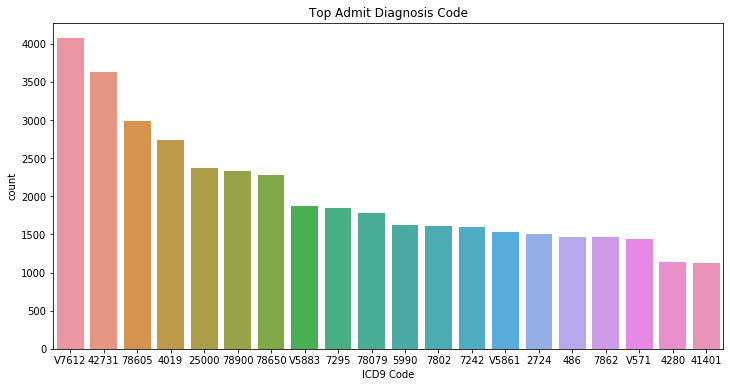

In [0]:
# top 10 diagnoses: Admit
diagnosis_df = claims['ClmAdmitDiagnosisCode']
fraud_diagnoses = pd.Series(diagnosis_df.to_numpy().flatten()).dropna()

fig = plt.figure(figsize = (12, 6))
sns.countplot(x = fraud_diagnoses, order = fraud_diagnoses.value_counts().index[:20])
plt.xlabel('ICD9 Code')
plt.title('Top Admit Diagnosis Code')
plt.show()

In [0]:
df = pd.concat([claims['ClmAdmitDiagnosisCode'].value_counts(), 
                claims['ClmAdmitDiagnosisCode'].value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))

In [0]:
df['percentage_running_total'] = df['percentage'].cumsum()

In [0]:
df = df.reset_index()
df['number'] = np.arange(len(df))

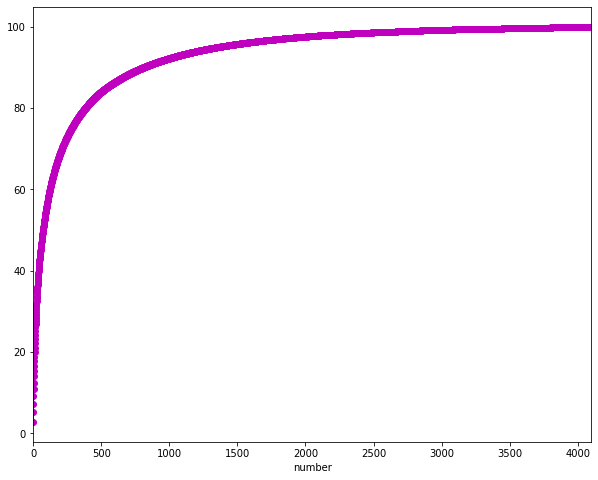

In [0]:
df.plot(x='number', y='percentage_running_total', kind='line', 
        figsize=(10, 8), legend=False, style='mo-')

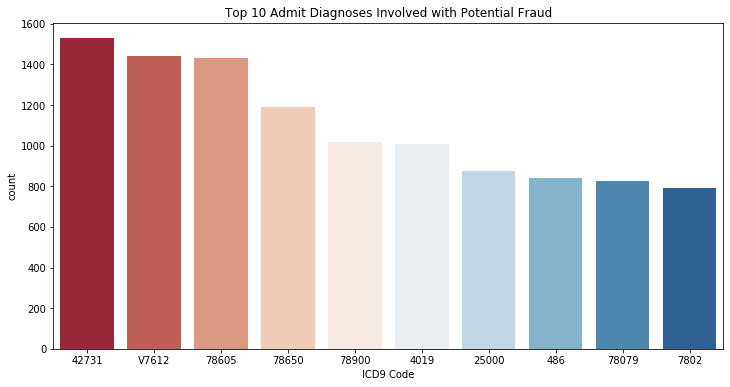

In [0]:
# top 10 diagnoses involved with fraud
fraud_diagnosis_df =  claims.loc[claims.PotentialFraud == 1, 'ClmAdmitDiagnosisCode']
fraud_diagnoses = pd.Series(fraud_diagnosis_df.to_numpy().flatten()).dropna()

fig = plt.figure(figsize = (12, 6))
sns.countplot(x = fraud_diagnoses, order = fraud_diagnoses.value_counts().index[:10], palette = 'RdBu')
plt.xlabel('ICD9 Code')
plt.title('Top 10 Admit Diagnoses Involved with Potential Fraud')
plt.show()

In [0]:
fraud_diagnoses.unique().shape

(3146,)

### Claim Diagnosis

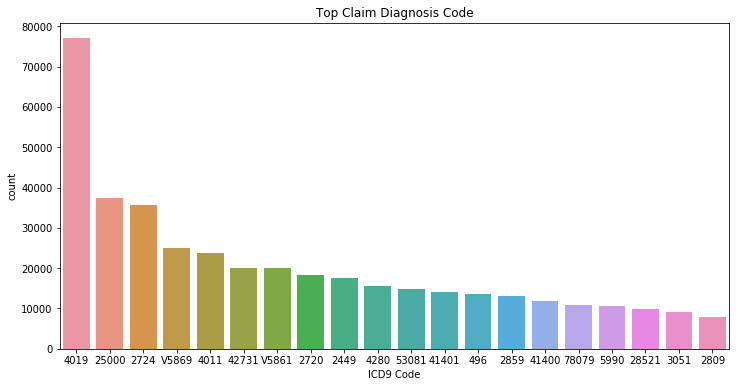

In [0]:
# top 10 diagnoses: Claim
diagnosis_df = claims[diagnosis]
fraud_diagnoses = pd.Series(diagnosis_df.to_numpy().flatten()).dropna()

fig = plt.figure(figsize = (12, 6))
sns.countplot(x = fraud_diagnoses, order = fraud_diagnoses.value_counts().index[:20])
plt.xlabel('ICD9 Code')
plt.title('Top Claim Diagnosis Code')
plt.show()

In [0]:
df = pd.concat([fraud_diagnoses.value_counts(), 
                fraud_diagnoses.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))

In [0]:
df['percentage_running_total'] = df['percentage'].cumsum()

In [0]:
df = df.reset_index()
df['number'] = np.arange(len(df))

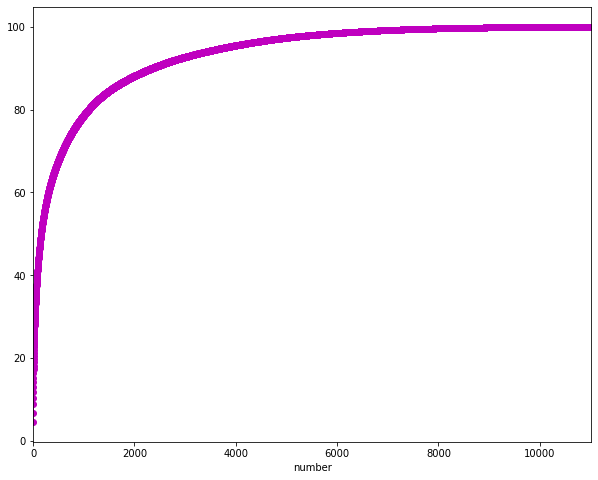

In [0]:
df.plot(x='number', y='percentage_running_total', kind='line', 
        figsize=(10, 8), legend=False, style='mo-')

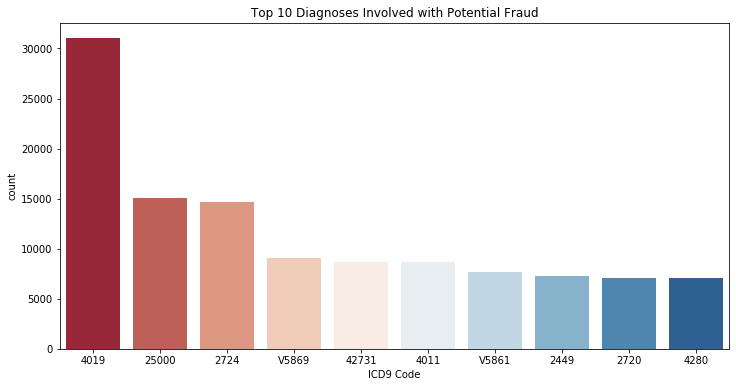

In [0]:
# top 10 diagnoses involved with fraud
fraud_diagnosis_df = claims.loc[claims.PotentialFraud == 1, diagnosis]
fraud_diagnoses = pd.Series(fraud_diagnosis_df.to_numpy().flatten()).dropna()

fig = plt.figure(figsize = (12, 6))
sns.countplot(x = fraud_diagnoses, order = fraud_diagnoses.value_counts().index[:10], palette = 'RdBu')
plt.xlabel('ICD9 Code')
plt.title('Top 10 Diagnoses Involved with Potential Fraud')
plt.show()

In [0]:
fraud_diagnoses.unique().shape

(9766,)

### Diagnosis Group

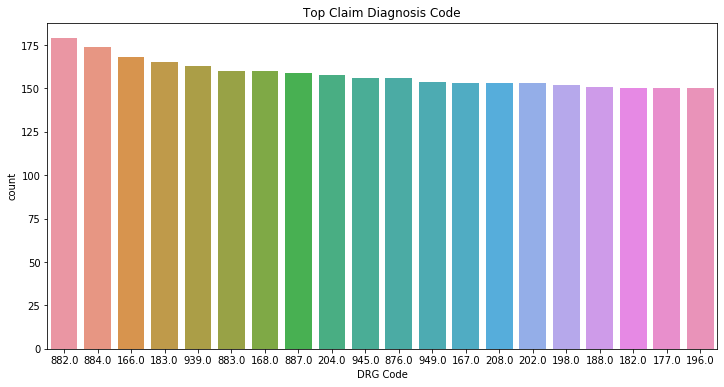

In [0]:
# top 10 diagnoses: Claim
diagnosis_df = claims['DiagnosisGroupCode']
fraud_diagnoses = pd.Series(diagnosis_df.to_numpy().flatten()).dropna()

fig = plt.figure(figsize = (12, 6))
sns.countplot(x = fraud_diagnoses, order = fraud_diagnoses.value_counts().index[:20])
plt.xlabel('DRG Code')
plt.title('Top Claim Diagnosis Code')
plt.show()

In [0]:
df = pd.concat([claims['DiagnosisGroupCode'].value_counts(), 
                claims['DiagnosisGroupCode'].value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))

In [0]:
df['percentage_running_total'] = df['percentage'].cumsum()

In [0]:
df = df.reset_index()
df['number'] = np.arange(len(df))

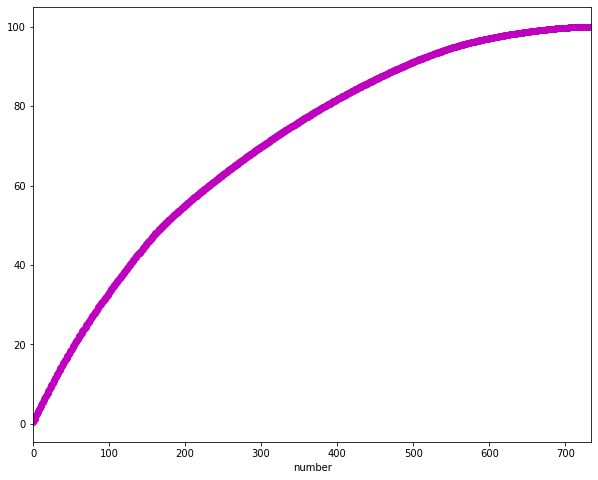

In [0]:
df.plot(x='number', y='percentage_running_total', kind='line', 
        figsize=(10, 8), legend=False, style='mo-')

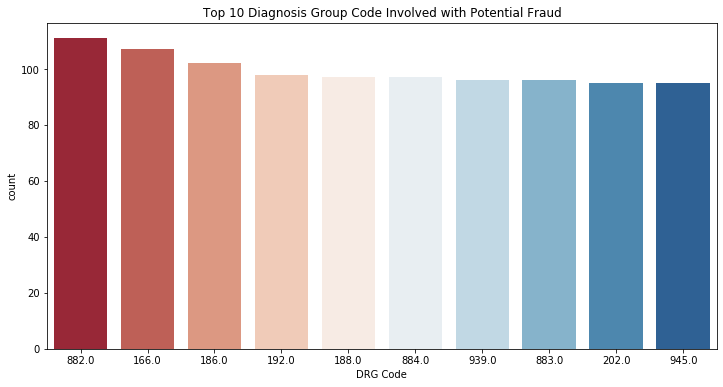

In [0]:
# top 10 diagnoses involved with fraud
fraud_diagnosis_df = claims.loc[claims.PotentialFraud == 1,'DiagnosisGroupCode']
fraud_diagnoses = pd.Series(fraud_diagnosis_df.to_numpy().flatten()).dropna()

fig = plt.figure(figsize = (12, 6))
sns.countplot(x = fraud_diagnoses, order = fraud_diagnoses.value_counts().index[:10], palette = 'RdBu')
plt.xlabel('DRG Code')
plt.title('Top 10 Diagnosis Group Code Involved with Potential Fraud')
plt.show()

In [0]:
fraud_diagnoses.unique().shape

(732,)

### Procedure Code 

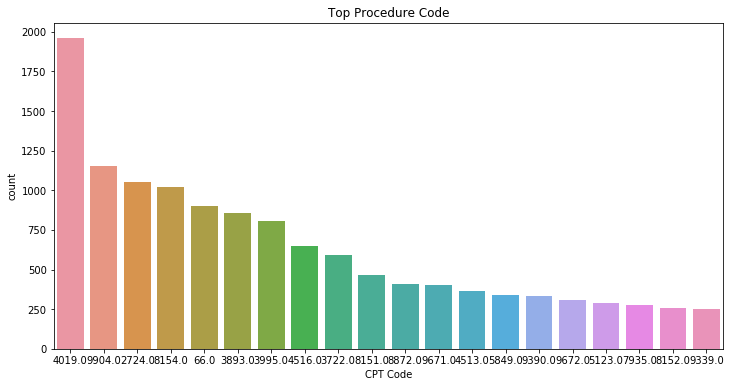

In [0]:
# top 10 diagnoses: Claim
diagnosis_df = claims[procedure]
fraud_diagnoses = pd.Series(diagnosis_df.to_numpy().flatten()).dropna()

fig = plt.figure(figsize = (12, 6))
sns.countplot(x = fraud_diagnoses, order = fraud_diagnoses.value_counts().index[:20])
plt.xlabel('CPT Code')
plt.title('Top Procedure Code')
plt.show()

In [0]:
df = pd.concat([fraud_diagnoses.value_counts(), 
                fraud_diagnoses.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))

In [0]:
df['percentage_running_total'] = df['percentage'].cumsum()

In [0]:
df = df.reset_index()
df['number'] = np.arange(len(df))

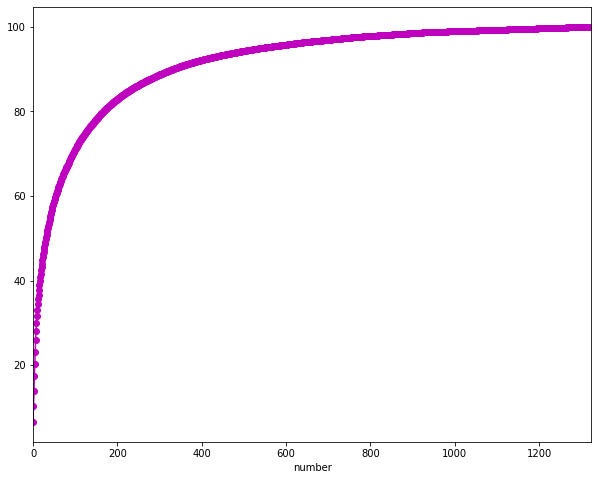

In [0]:
df.plot(x='number', y='percentage_running_total', kind='line', 
        figsize=(10, 8), legend=False, style='mo-')

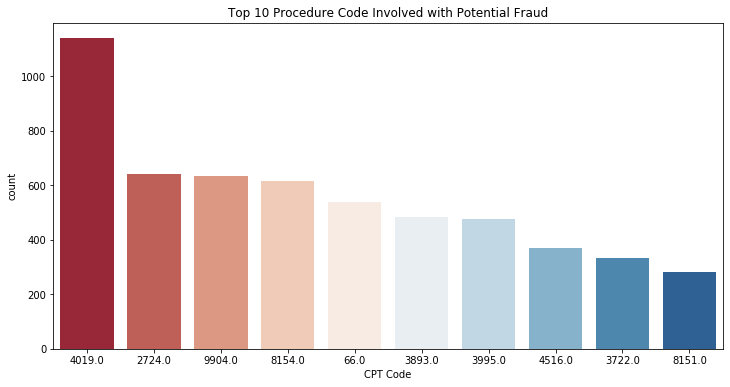

In [0]:
# top 10 diagnoses involved with fraud
fraud_diagnosis_df = claims.loc[claims.PotentialFraud == 1, procedure]
fraud_diagnoses = pd.Series(fraud_diagnosis_df.to_numpy().flatten()).dropna()

fig = plt.figure(figsize = (12, 6))
sns.countplot(x = fraud_diagnoses, order = fraud_diagnoses.value_counts().index[:10], palette = 'RdBu')
plt.xlabel('CPT Code')
plt.title('Top 10 Procedure Code Involved with Potential Fraud')
plt.show()

# Modeling

In [0]:
# Load the packages
import numpy as np
import pandas as pd
import math
from scipy import stats
import time
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import ADASYN

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from pyod.models.abod import ABOD
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.pca import PCA

from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, classification_report, precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

SEED = 42

In [0]:
# # load the data
# demo = pd.read_csv('demo_agg.csv', index_col = 0)
# claim = pd.read_csv('claims1.csv')
# code = pd.read_csv('Codes.csv', index_col = 0)

In [0]:
# print(demo.shape)
# print(claim.shape)
# print(code.shape)

In [0]:
# df.columns

In [0]:
# # merge
# claim.drop('PotentialFraud', axis = 1, inplace = True)

# df = claim.merge(demo, how = 'left', on = 'Provider')
# df = df.merge(code, how = 'left', on = 'Provider')
# df.shape

In [0]:
# df.columns

In [0]:
# df.to_csv('merge.csv', index = False)

In [0]:
# load the data
df = pd.read_csv('merge.csv')

In [0]:
# set provider as index
df.set_index('Provider', inplace = True)

In [0]:
df.shape

(5408, 65)

In [0]:
X = df.drop('PotentialFraud', axis = 1)
y = df.PotentialFraud

In [0]:
# check missing values
def check_missing(df):
    missing = df.isnull().sum()
    missing_percentage = (df.isnull().sum()/len(df)*100).round(2)
    missing_val = pd.concat([missing, missing_percentage], axis = 1)
    missing_val.columns = ['Missing Values', '% Missing']
    total_columns = df.shape[1]
    missing_columns = (df.isnull().sum() > 0).sum()
    print('Out of {} columns, {} columns have missing values'.format(total_columns, missing_columns))
    return missing_val

check_missing(X)

Out of 64 columns, 0 columns have missing values


Missing Values  % Missing
AttendingPhysician               0        0.0
AvgAge                           0        0.0
InDaysStd                        0        0.0
InDaysMean                       0        0.0
TotalInDays                      0        0.0
...                            ...        ...
unique_DRG                       0        0.0
Admit_unique_Std                 0        0.0
Admit_unique_Mean                0        0.0
DRG_unique_Std                   0        0.0
DRG_unique_Mean                  0        0.0

[64 rows x 2 columns]

In [0]:
y.value_counts(normalize = True)

0    0.906435
1    0.093565
Name: PotentialFraud, dtype: float64

## t-SNE Visualization

In [0]:
tsne = TSNE(random_state = SEED)
Tsne_transformed = tsne.fit_transform(X)

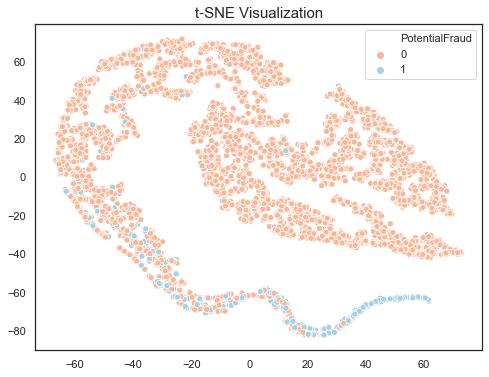

In [0]:
sns.set_style("white")

plt.figure(figsize = (8, 6))
xs = Tsne_transformed[:,0]
ys = Tsne_transformed[:,1]
sns.scatterplot(xs, ys, hue=y, palette = 'RdBu')
plt.title('t-SNE Visualization', fontsize = 15)
plt.legend()
plt.show()

## Correlation Matrix

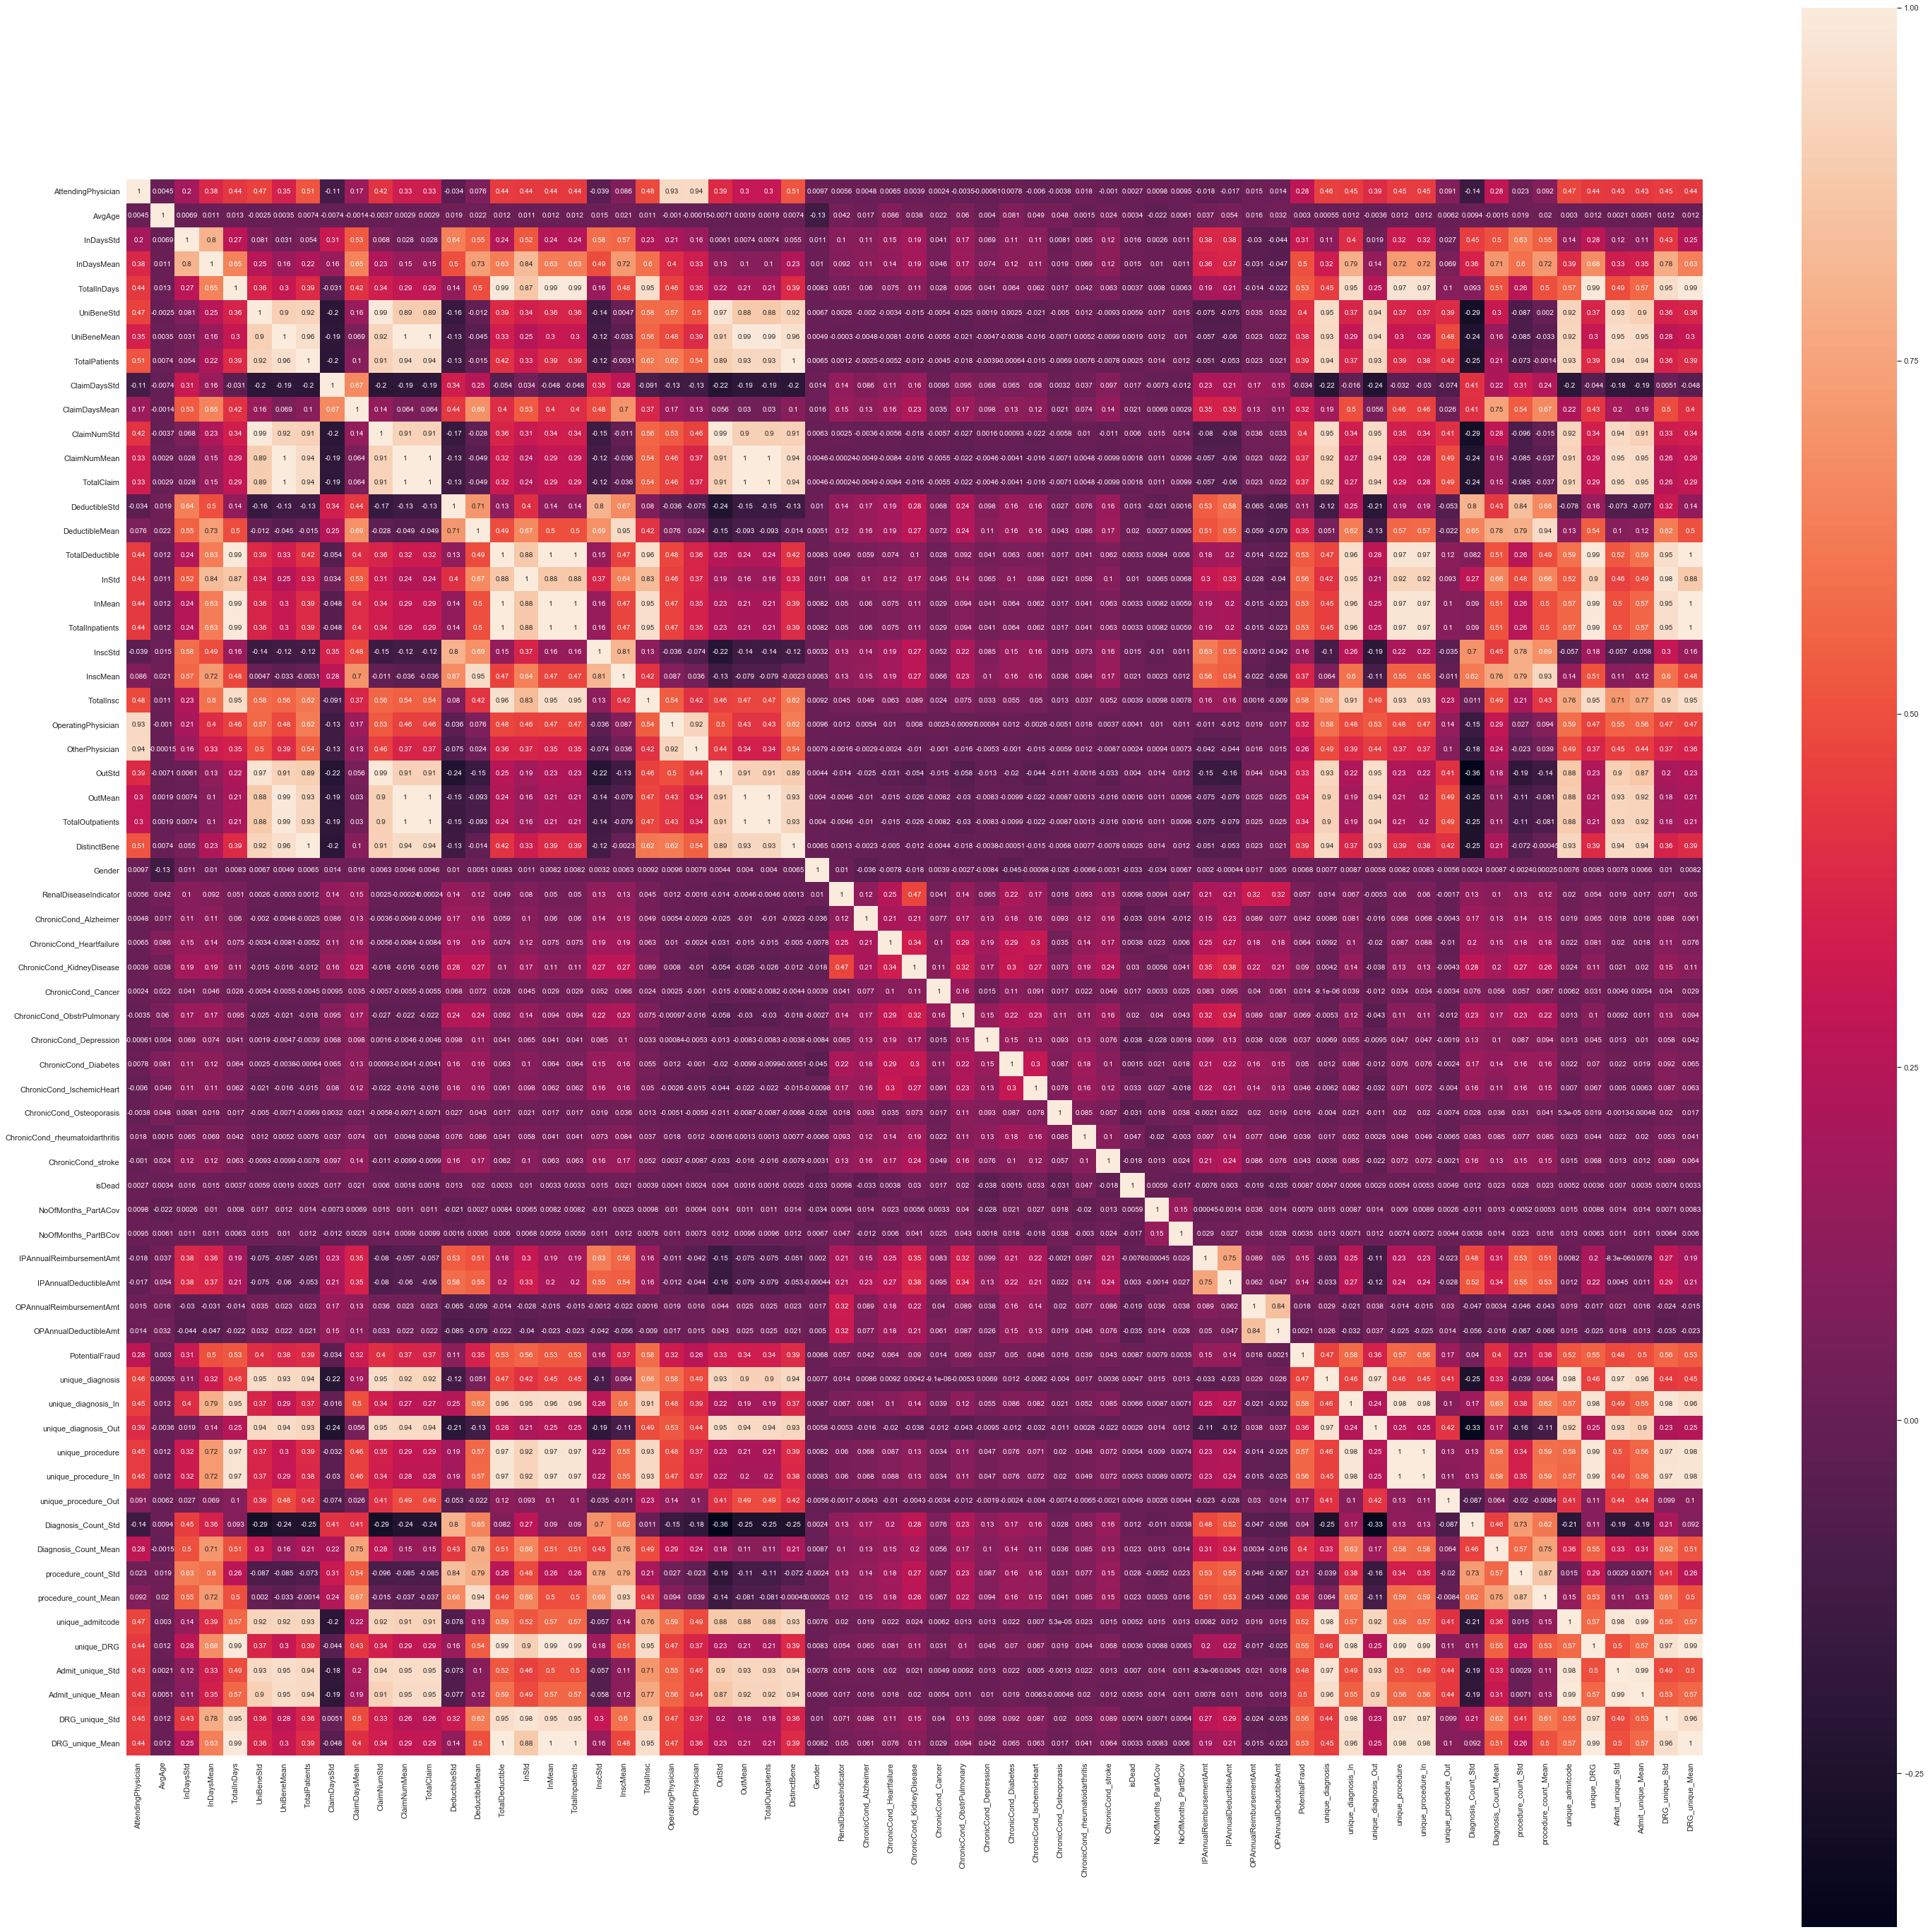

In [0]:
corr = df.corr()

fig, ax = plt.subplots(figsize = (50, 50))
sns.heatmap(corr, annot = True, square = True)
ax.set_ylim(len(corr)+0, -0)

plt.show()

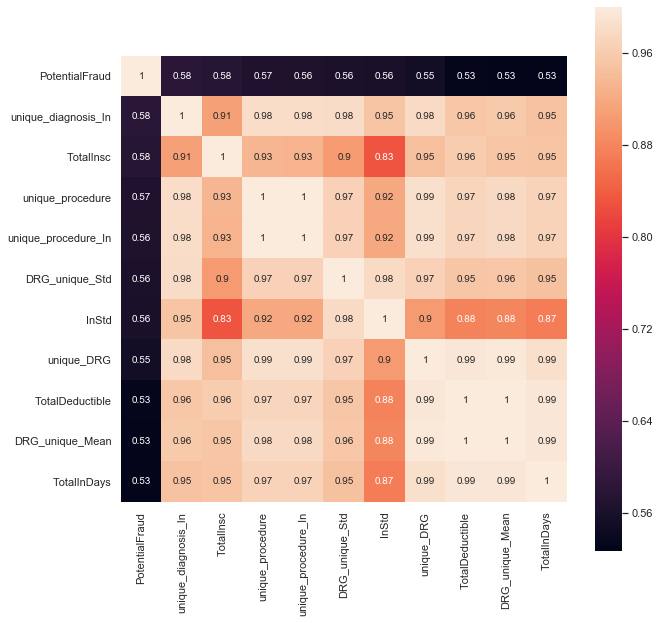

In [0]:
# features most correlated with the target variable:
fraud_corr = corr['PotentialFraud'].sort_values(ascending = False)
relevant_features = fraud_corr[:11].index.tolist()

fig, ax = plt.subplots(figsize = (10, 10))
fraud_corr_matrix = df[relevant_features].corr()
sns.heatmap(fraud_corr_matrix, annot = True, square = True)
ax.set_ylim(len(fraud_corr_matrix)+0, -0)

plt.show()

## Feature Importance

In [0]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = SEED)

In [0]:
# define which resampling method and which ML model to use in the pipeline
scaler = StandardScaler()
resampling = ADASYN(random_state = SEED, sampling_strategy = 1.0)
model = RandomForestClassifier(random_state = SEED)

# define the pipeline, tell it to combine ADASYN with the Logistic Regression model
pipeline = Pipeline([('Scaler', scaler), ('ADASYN', resampling), ('Classifier', model)])

# fit the data and get the train score
pipeline = pipeline.fit(X_train, y_train)

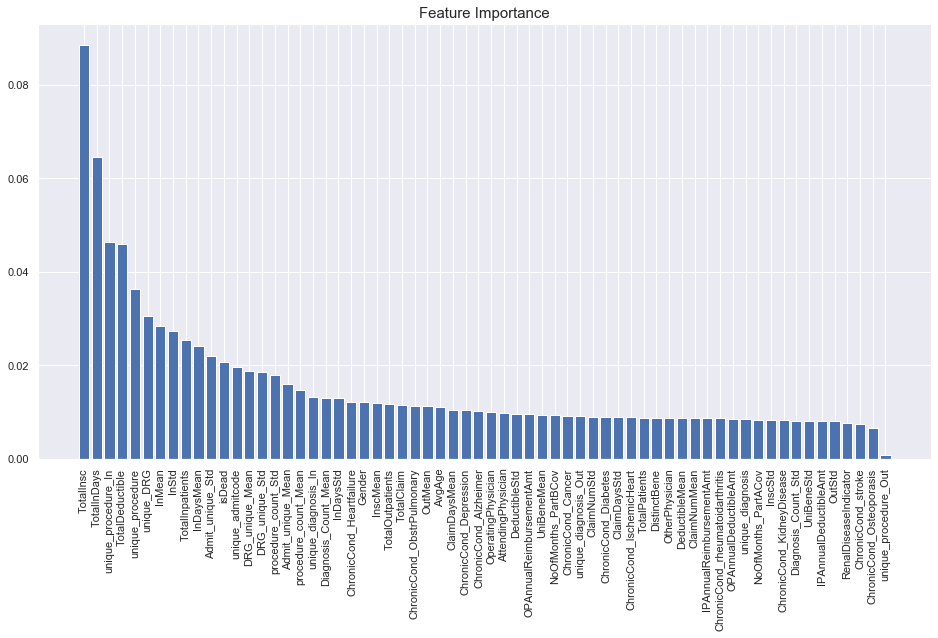

In [0]:
# features and feature importances
sns.set()
fig = plt.figure(figsize = (16, 8))

features = X_train.columns
importances = pipeline.steps[2][1].feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.title("Feature Importance", fontsize = 15)
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)

plt.show()

## Unsupervised Anomaly Detection Model

Linear Models for Outlier Detection:

1. PCA: Principal Component Analysis (use the sum of weighted projected distances to the eigenvector hyperplane as the outlier outlier scores)
2. MCD: Minimum Covariance Determinant (use the mahalanobis distances as the outlier scores)
3. OCSVM: One-Class Support Vector Machines

Proximity-Based Outlier Detection Models:

1. LOF: Local Outlier Factor
2. CBLOF: Clustering-Based Local Outlier Factor
3. kNN: k Nearest Neighbors (use the distance to the kth nearest neighbor as the outlier score)
4. Median kNN Outlier Detection (use the median distance to k nearest neighbors as the outlier score)
5.HBOS: Histogram-based Outlier Score

Probabilistic Models for Outlier Detection:

1. ABOD: Angle-Based Outlier Detection

Outlier Ensembles and Combination Frameworks:

1. Isolation Forest
2. Feature Bagging
3. LSCP

In [0]:
# Define the outliers_fraction
outliers_fraction = y.value_counts(normalize = True)[1]
clusters_separation = [0]

In [0]:
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [0]:
# Define four outlier detection tools to be compared
classifiers = {
    'Angle-based Outlier Detector (ABOD)':
        ABOD(n_neighbors = 20, contamination=outliers_fraction),
    'Isolation Forest': IForest(n_estimators = 500, bootstrap = True, contamination=outliers_fraction,
                                random_state=SEED),
    'Local Outlier Factor (LOF)':
        LOF(n_neighbors = 20, contamination=outliers_fraction),
    'Principal Component Analysis (PCA)': PCA(
        contamination=outliers_fraction, random_state=SEED)
}

No of Errors :  Angle-based Outlier Detector (ABOD) 176
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       981
           1       0.16      0.18      0.17       101

    accuracy                           0.84      1082
   macro avg       0.54      0.54      0.54      1082
weighted avg       0.84      0.84      0.84      1082


On Training Data:
Angle-based Outlier Detector (ABOD) ROC:0.5669, precision @ rank n:0.0889

On Test Data:
Angle-based Outlier Detector (ABOD) ROC:0.5896, precision @ rank n:0.1683


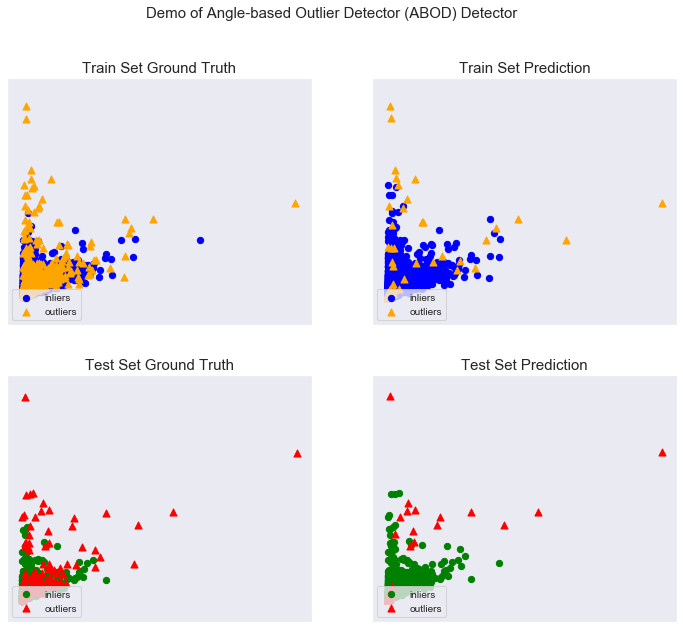

--------------------------------------------------------------------------------
No of Errors :  Isolation Forest 88
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       981
           1       0.56      0.63      0.59       101

    accuracy                           0.92      1082
   macro avg       0.76      0.79      0.77      1082
weighted avg       0.92      0.92      0.92      1082


On Training Data:
Isolation Forest ROC:0.8836, precision @ rank n:0.5062

On Test Data:
Isolation Forest ROC:0.9243, precision @ rank n:0.5842


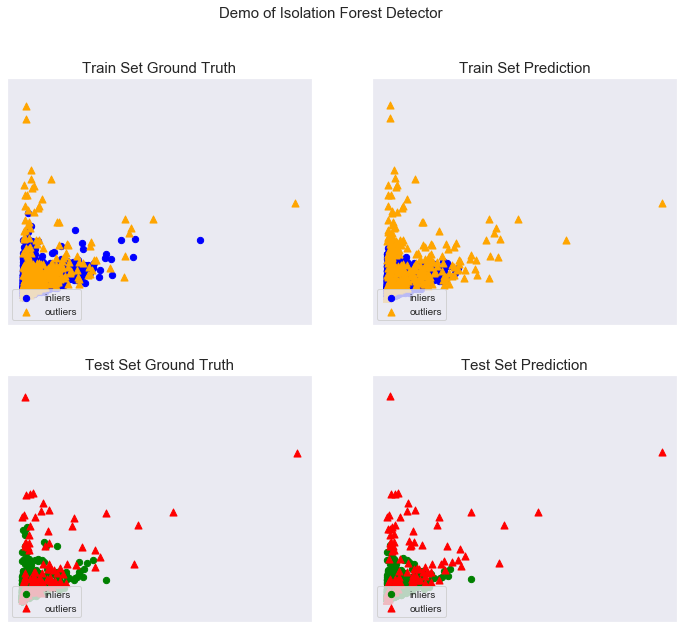

--------------------------------------------------------------------------------
No of Errors :  Local Outlier Factor (LOF) 185
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       981
           1       0.08      0.08      0.08       101

    accuracy                           0.83      1082
   macro avg       0.49      0.49      0.49      1082
weighted avg       0.83      0.83      0.83      1082


On Training Data:
Local Outlier Factor (LOF) ROC:0.3797, precision @ rank n:0.0494

On Test Data:
Local Outlier Factor (LOF) ROC:0.4001, precision @ rank n:0.0792


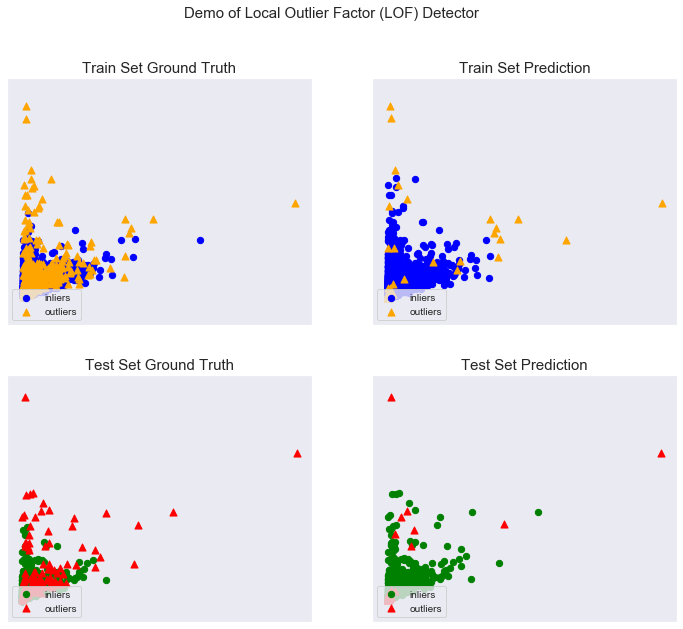

--------------------------------------------------------------------------------
No of Errors :  Principal Component Analysis (PCA) 105
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       981
           1       0.48      0.55      0.52       101

    accuracy                           0.90      1082
   macro avg       0.72      0.75      0.73      1082
weighted avg       0.91      0.90      0.91      1082


On Training Data:
Principal Component Analysis (PCA) ROC:0.7915, precision @ rank n:0.3926

On Test Data:
Principal Component Analysis (PCA) ROC:0.8405, precision @ rank n:0.5248


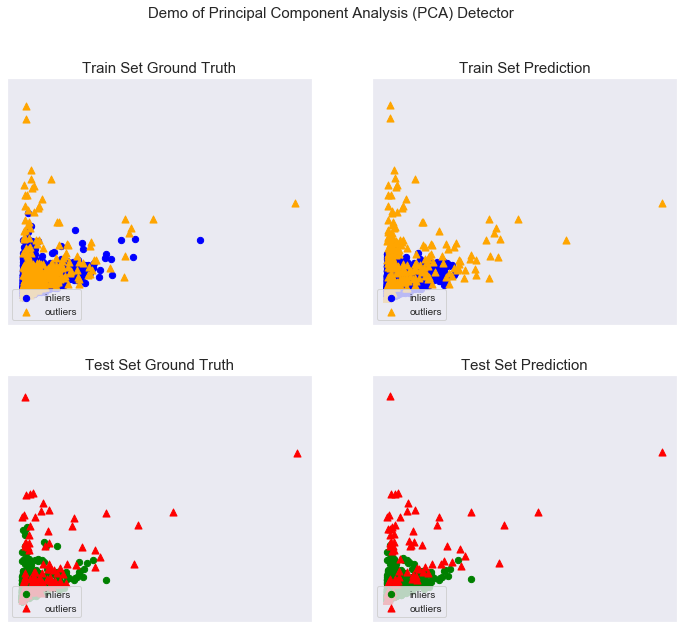

--------------------------------------------------------------------------------


In [0]:
train_precision = []
train_recall = []
train_f1 = []

test_precision = []
test_recall = []
test_f1 = []

for i, (clf_name, clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(X_train_scaled)
    y_train_pred = clf.labels_
    y_train_scores = clf.decision_scores_

    # predict raw anomaly score 
    y_test_scores = clf.decision_function(X_test_scaled) 

    # prediction of a datapoint category outlier or inlier
    y_test_pred = clf.predict(X_test_scaled) 

    # no of errors in prediction
    n_errors = (y_test_pred != y_test).sum()
    print('No of Errors : ', clf_name, n_errors)
    
    # classification report
    print(classification_report(y_test, y_test_pred))
    
    # precision, recall, f1
    train_precision.append(precision_score(y_train, y_train_pred))
    train_recall.append(recall_score(y_train, y_train_pred))
    train_f1.append(f1_score(y_train, y_train_pred))
    test_precision.append(precision_score(y_test, y_test_pred))
    test_recall.append(recall_score(y_test, y_test_pred))
    test_f1.append(f1_score(y_test, y_test_pred))
    
    # evaluate and print the results
    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)
    
    # visualize the results
    visualize(clf_name, X_train_scaled[:,[0,5]], y_train, X_test_scaled[:,[0,5]], y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)
    
    print('-'*80)

In [0]:
anomaly_models = ['Angle-based Outlier Detector (ABOD)',
                    'Isolation Forest',
                    'Local Outlier Factor (LOF)',
                    'Principal Component Analysis (PCA)']
anomaly_score = pd.DataFrame({'Train Precision': train_precision, 'Train Recall': train_recall, 'Train F1': train_f1, \
                              'Test Precision': test_precision, 'Test Recall': test_recall, 'Test F1': test_f1}, index = anomaly_models)
anomaly_score.sort_values(by = 'Test F1', ascending = False)

Train Precision  Train Recall  Train F1  \
Isolation Forest                            0.506173      0.506173  0.506173   
Principal Component Analysis (PCA)          0.392593      0.392593  0.392593   
Angle-based Outlier Detector (ABOD)         0.088889      0.088889  0.088889   
Local Outlier Factor (LOF)                  0.049383      0.049383  0.049383   

                                     Test Precision  Test Recall   Test F1  
Isolation Forest                           0.556522     0.633663  0.592593  
Principal Component Analysis (PCA)         0.482759     0.554455  0.516129  
Angle-based Outlier Detector (ABOD)        0.162162     0.178218  0.169811  
Local Outlier Factor (LOF)                 0.080000     0.079208  0.079602

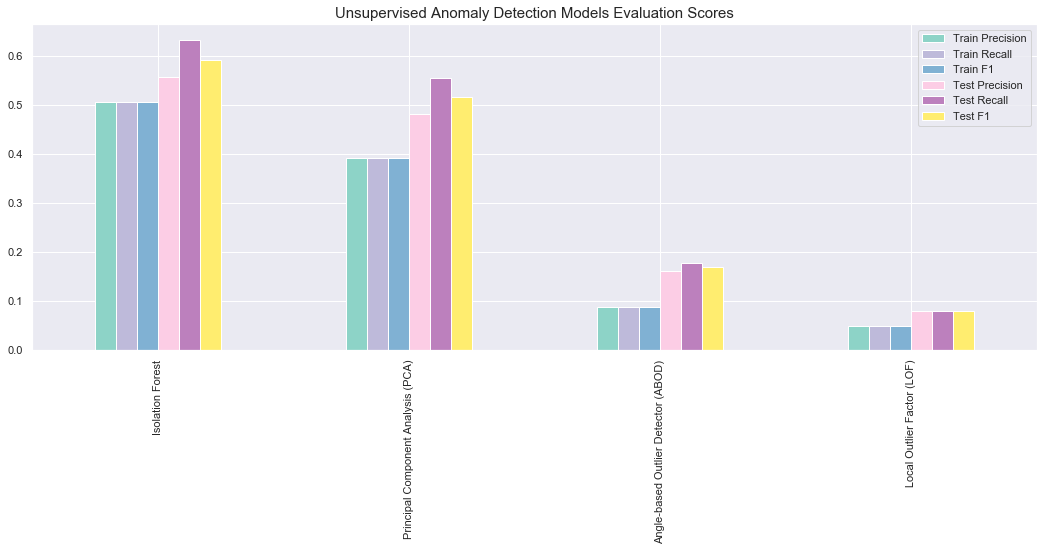

In [0]:
anomaly_sorted_score = anomaly_score.sort_values(by = 'Test F1', ascending = False)

anomaly_sorted_score.plot.bar(rot=90,colormap = 'Set3', figsize=(18,6))
plt.title('Unsupervised Anomaly Detection Models Evaluation Scores', fontsize = 15)
plt.show()

## Supervised Models

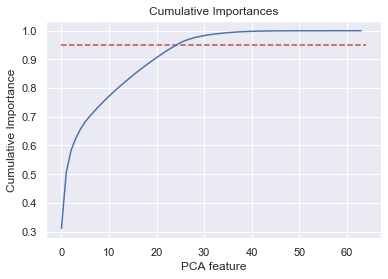

In [0]:
from sklearn.decomposition import PCA
# perform PCA to reduce the dimension for clustering

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to the samples
pipeline.fit(X_train)

# Plot the explained variances ratio
features = range(pca.n_components_)
plt.plot(features, pca.explained_variance_ratio_.cumsum())
plt.hlines(y = 0.95, xmin= 0 , xmax = len(features), color = 'r', linestyles = 'dashed')
plt.xlabel('PCA feature')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importances')
plt.show()

In [0]:
# find number of features for cumulative importance of 95%
print('Number of features for 95% importance:', np.where(pca.explained_variance_ratio_.cumsum() > 0.95)[0][0])

Number of features for 95% importance: 25


### Base Models

In [0]:
from sklearn.decomposition import PCA

train_score = []
test_score = []
training_time = []

def build_model(input_model, model_name):

    # define which resampling method and which ML model to use in the pipeline
    scaler = StandardScaler()
    pca = PCA(n_components = 25)
    resampling = ADASYN(random_state = SEED, sampling_strategy = 1.0)
    model = input_model

    # define the pipeline, tell it to combine ADASYN with the Logistic Regression model
    pipeline = Pipeline([('Scaler', scaler), ('PCA', pca), ('ADASYN', resampling), ('Classifier', model)])
    
    # fit the data and get the train score
    start = time.time()
    pipeline.fit(X_train, y_train)
    stop = time.time()
    y_pred_train = pipeline.predict(X_train)
    train_score.append(f1_score(y_train, y_pred_train))
    
    # training time
    train_time = stop - start
    training_time.append(train_time)
    
    # predict
    y_pred = pipeline.predict(X_test)
    test_score.append(f1_score(y_test, y_pred))

    return pipeline

In [0]:
nb = build_model(GaussianNB(), 'Naive Bayes')
logreg = build_model(LogisticRegression(random_state = SEED), 'Logistic Regression')
knn = build_model(KNeighborsClassifier(), 'KNN')
svc = build_model(SVC(random_state = SEED), 'Support Vector Classifier')
dt = build_model(DecisionTreeClassifier(max_depth = 10, random_state = SEED), 'Decision Tree')
rf = build_model(RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = SEED), 'Random Forest')
xgb = build_model(XGBClassifier(n_estimators = 100, max_depth = 10,random_state = SEED), 'XGBoost')

In [0]:
# take a look at the scores and go back to tune the hyperparameters if see any indication of overfitting or underfitting
classifiers = ['Naive Bayes', 'Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost']
result = pd.DataFrame({'Train F1': train_score, 'Test F1': test_score, 'Training Time': training_time}, index = classifiers)
result.sort_values(by = 'Test F1', ascending = False)

Train F1   Test F1  Training Time
XGBoost              1.000000  0.578125       4.826042
Random Forest        0.688776  0.525373       2.539600
Logistic Regression  0.497954  0.510526       0.107935
SVM                  0.528640  0.494505       1.569570
KNN                  0.557084  0.446154       0.082220
Decision Tree        0.713781  0.432099       0.260205
Naive Bayes          0.287397  0.292135       0.084547

<Figure size 432x288 with 0 Axes>

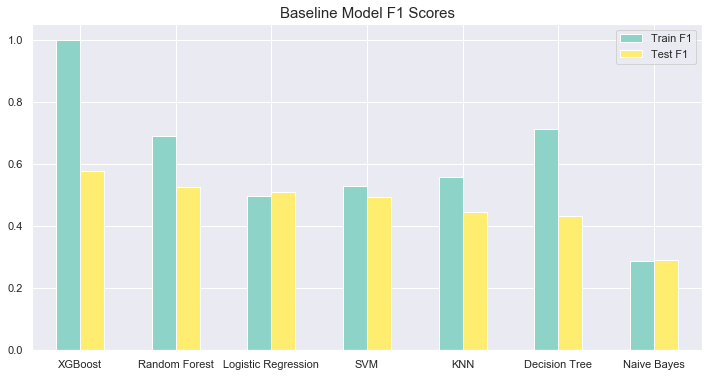

In [0]:
# visualize the metrics
base_score = result.iloc[:, 0:2].sort_values(by = 'Test F1', ascending = False)

fig = plt.figure()

base_score.plot.bar(rot=0, colormap = 'Set3', figsize=(12,6))
plt.title('Baseline Model F1 Scores', fontsize = 15)

plt.show()

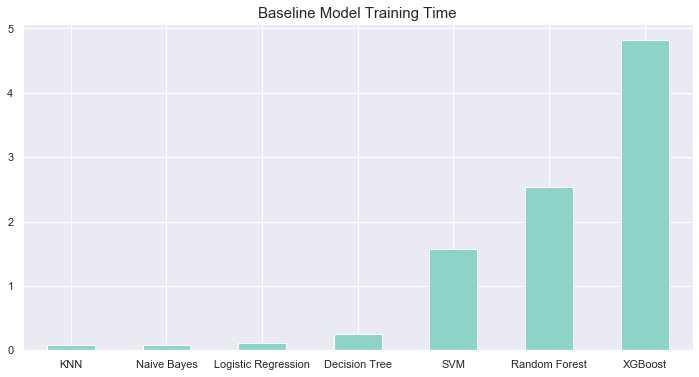

In [0]:
# visualize the training time
base_time = result.iloc[:, 2].sort_values()

fig = plt.figure()

base_time.plot.bar(rot=0, colormap = 'Set3', figsize=(12, 6))
plt.title('Baseline Model Training Time', fontsize = 15)

plt.show()

In [0]:
# visualize the classification report
def v_clfreport(model, title):
    y_pred = model.predict(X_test)
    clf_report = classification_report(y_test, y_pred, output_dict=True)
    df = pd.DataFrame(clf_report).iloc[:-1, :2].T
    
    fig, ax = plt.subplots(figsize = (6, 2))
    sns.heatmap(df, annot=True)
    plt.title(title)
    ax.set_ylim(len(df)+0, -0)
    
    plt.show()

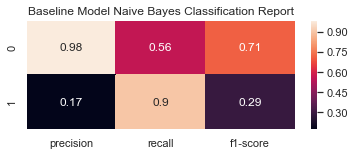

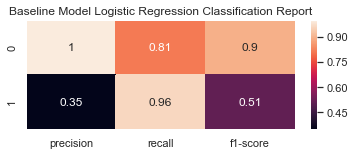

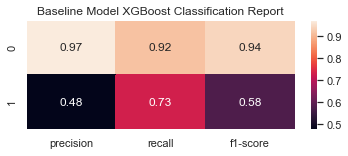

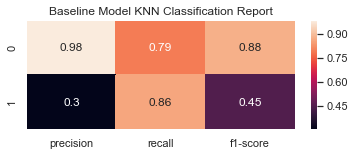

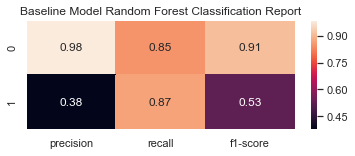

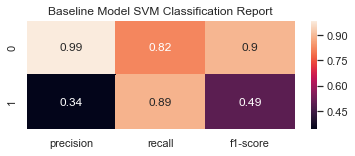

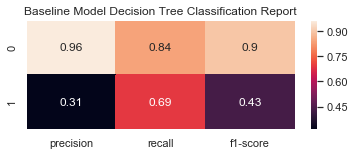

In [0]:
# visualize classification report on the test set
v_clfreport(nb, 'Baseline Model Naive Bayes Classification Report')
v_clfreport(logreg, 'Baseline Model Logistic Regression Classification Report')
v_clfreport(xgb, 'Baseline Model XGBoost Classification Report')
v_clfreport(knn, 'Baseline Model KNN Classification Report')
v_clfreport(rf, 'Baseline Model Random Forest Classification Report')
v_clfreport(svc, 'Baseline Model SVM Classification Report')
v_clfreport(dt, 'Baseline Model Decision Tree Classification Report')

### Hyperparameter Tuning

In [0]:
def build_tune_model(input_model, param_dist):

    # define which resampling method and which ML model to use in the pipeline
    scaler = StandardScaler()
    pca = PCA(n_components = 25)
    resampling = ADASYN(random_state = SEED, sampling_strategy = 1.0)
    model = input_model

    # define the pipeline, tell it to combine ADASYN with the Logistic Regression model
    pipeline = Pipeline([('Scaler', scaler), ('PCA', pca), ('ADASYN', resampling), ('Classifier', model)])
    
    # stratified k fold
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

    # tune hyperparameter
    pipeline = RandomizedSearchCV(pipeline, param_distributions = param_dist, scoring = 'f1', cv = kfold, n_iter = 10, n_jobs = -1, random_state = SEED)

    # fit the data
    pipeline.fit(X_train, y_train)
    pipeline = pipeline.best_estimator_
    
    return pipeline

In [0]:
# define param_dist
logreg_param = {'Classifier__C' : np.logspace(-4, 4, 20)}
knn_param = {'Classifier__n_neighbors': range(5, 10)}
svc_param = {'Classifier__C' : np.logspace(-4, 4, 20),
             'Classifier__gamma': np.logspace(-4, 4, 20)}
dt_param = {'Classifier__max_depth': range(3, 5),
            'Classifier__max_features': range(1, 12),
            'Classifier__min_samples_leaf': range(5, 10),
            'Classifier__criterion': ["gini", "entropy"]}
rf_param = {'Classifier__n_estimators': range(400, 1000, 10),
            'Classifier__max_features': ['auto', 'sqrt'],
            'Classifier__max_depth': range(3, 7),
            'Classifier__min_samples_split': range(2, 8),
            'Classifier__min_samples_leaf': range(3, 10)}
xgb_param = {'Classifier__n_estimators': range(20, 200, 10),
             'Classifier__learning_rate': [0.0001, 0.001, 0.01, 1, 2, 5],
             'Classifier__max_depth': range(3, 5), 
             'Classifier__min_samples_split': range(2, 10),
             'Classifier__min_samples_leaf':range(5, 10),
             'Classifier__max_features': range(3, 12),
             'Classifier__subsample': [0.6, 0.7, 0.75, 0.8]}

In [0]:
logreg1 = build_tune_model(LogisticRegression(random_state = SEED), logreg_param)
knn1 = build_tune_model(KNeighborsClassifier(), knn_param)
svc1 = build_tune_model(SVC(random_state = SEED), svc_param)
dt1 = build_tune_model(DecisionTreeClassifier(random_state = SEED), dt_param)
rf1 = build_tune_model(RandomForestClassifier(random_state = SEED), rf_param)
xgb1 = build_tune_model(XGBClassifier(n_iter_no_change=5, random_state = SEED), xgb_param)

In [0]:
train_score_1 = []
cv_score_1 = []
test_precision_1 = []
test_recall_1 = []
test_f1_1 = []

In [0]:
def score(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_f1 = f1_score(y_train, y_train_pred)
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)
    cv_f1 = np.mean(cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1', n_jobs=-1))
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    train_score_1.append(train_f1)
    cv_score_1.append(cv_f1)
    test_precision_1.append(test_precision)
    test_recall_1.append(test_recall)
    test_f1_1.append(test_f1)

In [0]:
score(nb)
score(logreg1)
score(knn1)
score(svc1)
score(dt1)
score(rf1)
score(xgb1)

In [0]:
# take a look at the scores and go back to tune the hyperparameters if see any indication of overfitting or underfitting
classifiers = ['Naive Bayes', 'Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost']
result1 = pd.DataFrame({'Train F1': train_score_1, 'CV F1': cv_score_1, 'Test Precision': test_precision_1, \
                        'Test Recall': test_recall_1, 'Test F1': test_f1_1}, index = classifiers)
result1.sort_values(by = 'Test F1', ascending = False)

Train F1     CV F1  Test Precision  Test Recall   Test F1
Logistic Regression  0.504213  0.502871        0.386179     0.940594  0.547550
XGBoost              0.502313  0.472281        0.356364     0.970297  0.521277
Random Forest        0.529973  0.479648        0.342960     0.940594  0.502646
SVM                  0.473786  0.474881        0.339286     0.940594  0.498688
Decision Tree        0.474490  0.464934        0.327526     0.930693  0.484536
KNN                  0.584838  0.434785        0.313869     0.851485  0.458667
Naive Bayes          0.287397  0.284968        0.174330     0.900990  0.292135

<Figure size 432x288 with 0 Axes>

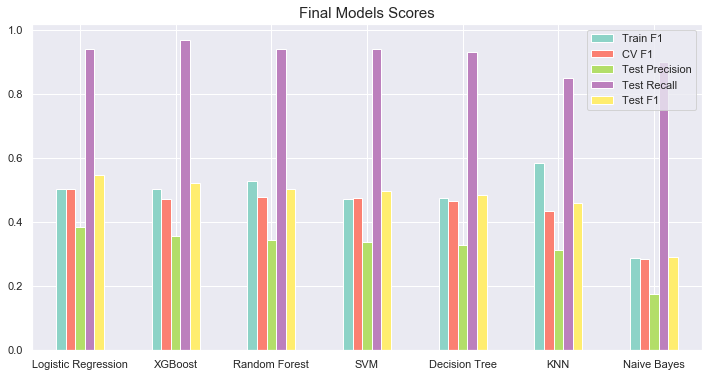

In [0]:
# visualize the metrics
tuned_score = result1.sort_values(by = 'Test F1', ascending = False)

fig = plt.figure()

tuned_score.plot.bar(rot=0, colormap = 'Set3', figsize=(12,6))
plt.title('Final Models Scores', fontsize = 15)

plt.show()

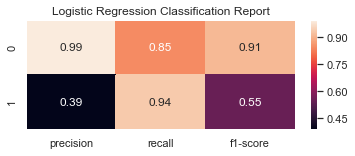

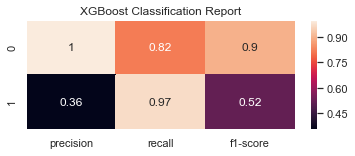

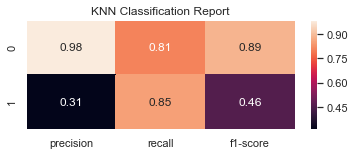

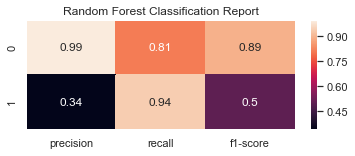

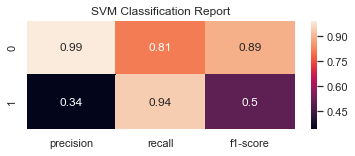

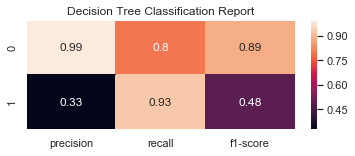

In [0]:
# visualize classification report on the test set
v_clfreport(logreg1, 'Logistic Regression Classification Report')
v_clfreport(xgb1, 'XGBoost Classification Report')
v_clfreport(knn1, 'KNN Classification Report')
v_clfreport(rf1, 'Random Forest Classification Report')
v_clfreport(svc1, 'SVM Classification Report')
v_clfreport(dt1, 'Decision Tree Classification Report')

In [0]:
# final model -> logreg
logreg1.steps[3][1].get_params()

{'C': 0.0001,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

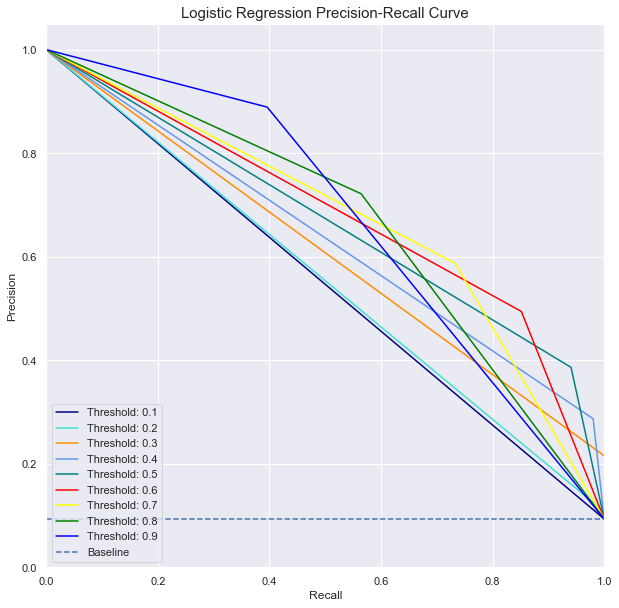

In [0]:
# plot the precision recall curve
y_pred_proba = logreg1.predict_proba(X_test)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(10,10))

j = 1
for i,color in zip(thresholds,colors):
    y_test_prob = y_pred_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Logistic Regression Precision-Recall Curve', fontsize = 15)
    plt.legend(loc="lower left")
    
baseline = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
plt.legend(loc="lower left")

plt.show()

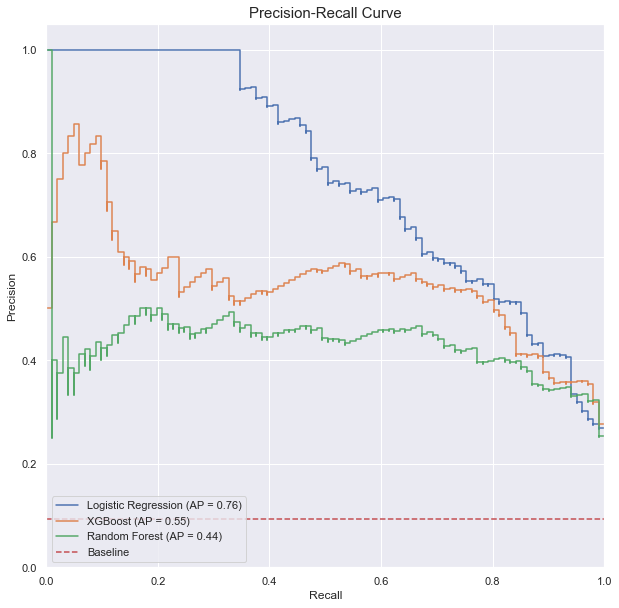

In [0]:
figure, ax = plt.subplots(figsize=(10,10))

plot_precision_recall_curve(logreg1, X_test, y_test, name = 'Logistic Regression', ax = ax)
plot_precision_recall_curve(xgb1, X_test, y_test, name = 'XGBoost', ax = ax)
plot_precision_recall_curve(rf1, X_test, y_test, name = 'Random Forest', ax = ax)

baseline = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve', fontsize = 15)
plt.legend(loc="lower left")

plt.show()

## Autoencoders Fraud Detection

In [0]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import h5py
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import regularizers
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

Using TensorFlow backend.


In [0]:
df = pd.read_csv("C:/Users/Carrie/Desktop/MScA Courses/HealthAnalytics/FinalProject/input/merge.csv")

In [0]:
print(df.shape)
df.head()

(5408, 66)


Provider  AttendingPhysician     AvgAge  InDaysStd  InDaysMean  \
0  PRV51001                  14  78.160000   2.499621    1.208333   
1  PRV51003                  44  69.480916   2.121219    4.948611   
2  PRV51004                  38  71.778523   0.000000    0.000000   
3  PRV51005                   6  70.118659   0.000000    0.000000   
4  PRV51007                  10  68.791667   2.498484    1.333333   

   TotalInDays  UniBeneStd  UniBeneMean  TotalPatients  ClaimDaysStd  ...  \
0         25.0    1.505042     2.083333             24      1.375651  ...   
1        305.0    3.010084    10.833333            117      1.671003  ...   
2          0.0    3.629634    12.416667            138      1.229821  ...   
3          0.0    8.913728    82.000000            495      0.475384  ...   
4         16.0    2.391589     5.916667             58      1.130750  ...   

   Diagnosis_Count_Std  Diagnosis_Count_Mean  procedure_count_Std  \
0             1.866580              1.848810             0.121630   
1             1.634357              5.005076             0.218508   
2             1.031048              2.212305             0.000000   
3             0.774761              2.467857             0.000000   
4             1.328274              2.380896             0.029696   

   procedure_count_Mean  unique_admitcode  unique_DRG  Admit_unique_Std  \
0              0.046429                11           5          0.974961   
1              0.310739                58          58          3.078640   
2              0.000000                25           0          1.881080   
3              0.000000               158           0         10.492541   
4              0.007937                17           3          1.251373   

   Admit_unique_Mean  DRG_unique_Std  DRG_unique_Mean  
0           0.785714        0.744946         0.357143  
1           5.357143        2.376626         4.428571  
2           2.000000        0.000000         0.000000  
3          16.642857        0.000000         0.000000  
4           1.214286        0.425815         0.214286  

[5 rows x 66 columns]

In [0]:
df.isnull().values.any()

False

In [0]:
df.drop('Provider', axis=1, inplace=True)

In [0]:
frauds = df[df.PotentialFraud == 1]
normal = df[df.PotentialFraud == 0]

In [0]:
frauds.shape

(506, 65)

In [0]:
normal.shape

(4902, 65)

Training an autoencoder for anomalies detection is done using only normal data. Then any new observations that cannot be well predicted by such autoencoder are anomalies.

Such approach has two important benefits in comparison to classifiers: 
- Imbalance of the data is not a problem: there is plenty of data to train the model
- Anomalies detection is not trained for any particular type of anomaly: anything that is different from normal can be detected

Reserve 20% of the data for testing. Parameter `stratify` helps keeping the class size ratio within each data set.

In [0]:
X_train_split, X_test_split = train_test_split(df, test_size=0.2,
                                   stratify=df['PotentialFraud'], 
                                   random_state=RANDOM_SEED)

Extract the labels from train and test data.

In [0]:
y_train = X_train_split['PotentialFraud']
X_train = X_train_split.drop(['PotentialFraud'], axis=1)

y_test = X_test_split['PotentialFraud']
X_test = X_test_split.drop(['PotentialFraud'], axis=1)
print('Train: shape X',X_train.shape,', shape Y',y_train.shape)
print('Test: shape X',X_test.shape,', shape Y',y_test.shape)

Train: shape X (4326, 64) , shape Y (4326,)
Test: shape X (1082, 64) , shape Y (1082,)


Select the "normal" transactions from the training data to train autoencoder on them.

In [0]:
X_trainNorm = X_train[y_train == 0]
X_trainNorm_val = X_trainNorm.values # Only values, axis labels removed. This is input for the Autoencoder
X_testNorm_val = X_test[y_test == 0].values # The validation data

In [0]:
print(y_train.shape)
print(X_train.shape)

(4326,)
(4326, 64)


In [0]:
X_trainNorm_val.shape

(3921, 64)

## Creating the model

This autoencoder contains fully connected layers with 14, 7, 14 and 29 neurons, respectively.  The first two layers make encoder, the last two make decoder. 

Training is done with $L_1$ regularization.

Set parameters:

In [0]:
input_dim = X_trainNorm_val.shape[1]
layer1_dim = 14
encoder_dim = 7

Create tensors:

In [0]:
input_layer = Input(shape=(input_dim, ))

encoder1 = Dense(layer1_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder2 = Dense(encoder_dim, activation="relu")(encoder1)
decoder1 = Dense(layer1_dim, activation='tanh')(encoder2)
decoder2 = Dense(input_dim, activation='linear')(decoder1)
print('input_layer: ',input_layer)
print('encoder1',encoder1)
print('encoder2',encoder2)
print('decoder1',decoder1)
print('decoder2',decoder2)

input_layer:  Tensor("input_1:0", shape=(?, 64), dtype=float32)
encoder1 Tensor("dense_1/Tanh:0", shape=(?, 14), dtype=float32)
encoder2 Tensor("dense_2/Relu:0", shape=(?, 7), dtype=float32)
decoder1 Tensor("dense_3/Tanh:0", shape=(?, 14), dtype=float32)
decoder2 Tensor("dense_4/BiasAdd:0", shape=(?, 64), dtype=float32)


Create autoencoder from the tensors:

In [0]:
autoencoder = Model(inputs=input_layer, outputs=decoder2)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 14)                910       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 14)                112       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                960       
Total params: 2,087
Trainable params: 2,087
Non-trainable params: 0
_________________________________________________________________


Train the model for 100 epochs with a batch size of 32 samples and save the best performing model to a file using ModelCheckpoint provided by Keras. 

Use the EarlyStopping callback that stops training when a monitored quantity has stopped improving.

In [0]:
%%time
nb_epoch = 1000000
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error')

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
earlystopping = EarlyStopping(monitor='val_loss', patience=1, verbose=0) # 'patience' number of not improving epochs
history = autoencoder.fit(X_trainNorm_val, X_trainNorm_val,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_testNorm_val, X_testNorm_val),
                    verbose=1,
                    callbacks=[checkpointer, #tensorboard, 
                               earlystopping]).history


Train on 3921 samples, validate on 981 samples
Epoch 1/1000000
3921/3921 [==============================] - 1s 201us/step - loss: 208529697.6384 - val_loss: 182541040.6402
Epoch 2/1000000
3921/3921 [==============================] - 0s 77us/step - loss: 208524700.0296 - val_loss: 182536690.0061
Epoch 3/1000000
3921/3921 [==============================] - 0s 74us/step - loss: 208520441.0385 - val_loss: 182532742.3772
Epoch 4/1000000
3921/3921 [==============================] - 0s 78us/step - loss: 208516412.6825 - val_loss: 182528899.9348
Epoch 5/1000000
3921/3921 [==============================] - 0s 82us/step - loss: 208512507.1115 - val_loss: 182525169.4230
Epoch 6/1000000
3921/3921 [==============================] - 0s 79us/step - loss: 208508647.2104 - val_loss: 182521429.2151
Epoch 7/1000000
3921/3921 [==============================] - 0s 84us/step - loss: 208504810.4586 - val_loss: 182517752.4444
Epoch 8/1000000
3921/3921 [==============================] - 0s 80us/step - loss: 2

3921/3921 [==============================] - 0s 117us/step - loss: 208057721.5771 - val_loss: 182085983.1560
Epoch 130/1000000
3921/3921 [==============================] - 1s 142us/step - loss: 208054112.6998 - val_loss: 182082500.7951
Epoch 131/1000000
3921/3921 [==============================] - 0s 85us/step - loss: 208050512.0133 - val_loss: 182079008.7339
Epoch 132/1000000
3921/3921 [==============================] - 0s 89us/step - loss: 208046907.6134 - val_loss: 182075552.5953
Epoch 133/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 208043299.9765 - val_loss: 182072062.3160
Epoch 134/1000000
3921/3921 [==============================] - 0s 91us/step - loss: 208039699.3502 - val_loss: 182068587.9103
Epoch 135/1000000
3921/3921 [==============================] - 0s 83us/step - loss: 208036071.5654 - val_loss: 182065089.5413
Epoch 136/1000000
3921/3921 [==============================] - 0s 82us/step - loss: 208032468.4274 - val_loss: 182061587.6126
Epoch 13

Epoch 259/1000000
3921/3921 [==============================] - 0s 75us/step - loss: 207595626.5147 - val_loss: 181639992.8685
Epoch 260/1000000
3921/3921 [==============================] - 0s 87us/step - loss: 207592119.3665 - val_loss: 181636624.0326
Epoch 261/1000000
3921/3921 [==============================] - 0s 84us/step - loss: 207588638.4167 - val_loss: 181633213.4883
Epoch 262/1000000
3921/3921 [==============================] - 0s 84us/step - loss: 207585115.0462 - val_loss: 181629877.2640
Epoch 263/1000000
3921/3921 [==============================] - 0s 89us/step - loss: 207581608.6228 - val_loss: 181626443.7187
Epoch 264/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 207578098.9870 - val_loss: 181623120.3670
Epoch 265/1000000
3921/3921 [==============================] - 0s 85us/step - loss: 207574605.7883 - val_loss: 181619727.3068
Epoch 266/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 207571105.6382 - val_loss: 1816163

Epoch 324/1000000
3921/3921 [==============================] - 0s 109us/step - loss: 207369049.0161 - val_loss: 181421483.2090
Epoch 325/1000000
3921/3921 [==============================] - 0s 118us/step - loss: 207365588.3866 - val_loss: 181418138.3649
Epoch 326/1000000
3921/3921 [==============================] - 0s 84us/step - loss: 207362119.5955 - val_loss: 181414840.7503
Epoch 327/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 207358688.4978 - val_loss: 181411500.0856
Epoch 328/1000000
3921/3921 [==============================] - 0s 85us/step - loss: 207355204.5295 - val_loss: 181408171.9388
Epoch 329/1000000
3921/3921 [==============================] - 0s 91us/step - loss: 207351747.4848 - val_loss: 181404800.3547
Epoch 330/1000000
3921/3921 [==============================] - 0s 84us/step - loss: 207348269.8128 - val_loss: 181401458.5973
Epoch 331/1000000
3921/3921 [==============================] - 0s 93us/step - loss: 207344824.4917 - val_loss: 18139

Epoch 389/1000000
3921/3921 [==============================] - 0s 74us/step - loss: 207145486.5351 - val_loss: 181205981.3823
Epoch 390/1000000
3921/3921 [==============================] - 0s 87us/step - loss: 207142034.5626 - val_loss: 181202714.4669
Epoch 391/1000000
3921/3921 [==============================] - 0s 100us/step - loss: 207138616.2020 - val_loss: 181199388.5749
Epoch 392/1000000
3921/3921 [==============================] - 0s 102us/step - loss: 207135196.8018 - val_loss: 181196042.4587
Epoch 393/1000000
3921/3921 [==============================] - 0s 104us/step - loss: 207131769.0385 - val_loss: 181192775.4985
Epoch 394/1000000
3921/3921 [==============================] - 0s 75us/step - loss: 207128364.0663 - val_loss: 181189475.4373
Epoch 395/1000000
3921/3921 [==============================] - 0s 80us/step - loss: 207124948.0520 - val_loss: 181186218.9521
Epoch 396/1000000
3921/3921 [==============================] - 0s 65us/step - loss: 207121613.2578 - val_loss: 1811

Epoch 454/1000000
3921/3921 [==============================] - 0s 68us/step - loss: 206924494.3963 - val_loss: 180993087.7880
Epoch 455/1000000
3921/3921 [==============================] - 0s 53us/step - loss: 206921043.5950 - val_loss: 180989685.1621
Epoch 456/1000000
3921/3921 [==============================] - 0s 63us/step - loss: 206917694.9635 - val_loss: 180986538.3160
Epoch 457/1000000
3921/3921 [==============================] - 0s 59us/step - loss: 206914313.0263 - val_loss: 180983291.8287
Epoch 458/1000000
3921/3921 [==============================] - 0s 69us/step - loss: 206910935.2431 - val_loss: 180980020.1590
Epoch 459/1000000
3921/3921 [==============================] - 0s 88us/step - loss: 206907556.4315 - val_loss: 180976820.0408
Epoch 460/1000000
3921/3921 [==============================] - 0s 90us/step - loss: 206904207.4053 - val_loss: 180973557.7166
Epoch 461/1000000
3921/3921 [==============================] - 0s 93us/step - loss: 206900837.1721 - val_loss: 1809703

Epoch 519/1000000
3921/3921 [==============================] - 0s 118us/step - loss: 206706296.9426 - val_loss: 180782969.0683
Epoch 520/1000000
3921/3921 [==============================] - 0s 92us/step - loss: 206703139.6572 - val_loss: 180779627.3639
Epoch 521/1000000
3921/3921 [==============================] - 0s 82us/step - loss: 206699689.8016 - val_loss: 180776589.1865
Epoch 522/1000000
3921/3921 [==============================] - 0s 89us/step - loss: 206696267.5073 - val_loss: 180773120.2732
Epoch 523/1000000
3921/3921 [==============================] - 0s 90us/step - loss: 206692824.7937 - val_loss: 180769905.6147
Epoch 524/1000000
3921/3921 [==============================] - 0s 85us/step - loss: 206689473.6394 - val_loss: 180766682.1692
Epoch 525/1000000
3921/3921 [==============================] - 0s 94us/step - loss: 206686120.0551 - val_loss: 180763475.1193
Epoch 526/1000000
3921/3921 [==============================] - 0s 93us/step - loss: 206683114.7993 - val_loss: 180760

Epoch 584/1000000
3921/3921 [==============================] - 0s 90us/step - loss: 206490092.5193 - val_loss: 180574492.9664
Epoch 585/1000000
3921/3921 [==============================] - 0s 88us/step - loss: 206486583.5369 - val_loss: 180571208.7136
Epoch 586/1000000
3921/3921 [==============================] - 0s 111us/step - loss: 206483306.9503 - val_loss: 180568142.5729
Epoch 587/1000000
3921/3921 [==============================] - 1s 128us/step - loss: 206480001.0283 - val_loss: 180564783.5107
Epoch 588/1000000
3921/3921 [==============================] - 0s 94us/step - loss: 206476525.5802 - val_loss: 180561511.6942
Epoch 589/1000000
3921/3921 [==============================] - 0s 77us/step - loss: 206473257.8710 - val_loss: 180558519.3598
Epoch 590/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 206469911.0921 - val_loss: 180555135.7227
Epoch 591/1000000
3921/3921 [==============================] - 0s 85us/step - loss: 206466588.0479 - val_loss: 18055

Epoch 649/1000000
3921/3921 [==============================] - 0s 81us/step - loss: 206275138.1015 - val_loss: 180367616.3996
Epoch 650/1000000
3921/3921 [==============================] - 0s 84us/step - loss: 206272077.9148 - val_loss: 180364629.9735
Epoch 651/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 206268626.8319 - val_loss: 180361308.4771
Epoch 652/1000000
3921/3921 [==============================] - 0s 85us/step - loss: 206265341.4170 - val_loss: 180358195.1845
Epoch 653/1000000
3921/3921 [==============================] - 0s 83us/step - loss: 206262091.1237 - val_loss: 180355395.2171
Epoch 654/1000000
3921/3921 [==============================] - 0s 85us/step - loss: 206258903.5450 - val_loss: 180351935.7635
Epoch 655/1000000
3921/3921 [==============================] - 0s 85us/step - loss: 206255553.5894 - val_loss: 180348670.7238
Epoch 656/1000000
3921/3921 [==============================] - 0s 96us/step - loss: 206252140.3152 - val_loss: 1803454

Epoch 714/1000000
3921/3921 [==============================] - 0s 98us/step - loss: 206062652.7682 - val_loss: 180163091.5719
Epoch 715/1000000
3921/3921 [==============================] - 0s 79us/step - loss: 206059404.7967 - val_loss: 180159942.7482
Epoch 716/1000000
3921/3921 [==============================] - 0s 85us/step - loss: 206056108.9732 - val_loss: 180156848.3670
Epoch 717/1000000
3921/3921 [==============================] - 0s 87us/step - loss: 206052924.9314 - val_loss: 180153729.6677
Epoch 718/1000000
3921/3921 [==============================] - 0s 81us/step - loss: 206049636.6600 - val_loss: 180150528.1223
Epoch 719/1000000
3921/3921 [==============================] - 0s 88us/step - loss: 206046394.4504 - val_loss: 180147381.3293
Epoch 720/1000000
3921/3921 [==============================] - 0s 96us/step - loss: 206043190.9737 - val_loss: 180144268.9419
Epoch 721/1000000
3921/3921 [==============================] - 0s 94us/step - loss: 206039933.1252 - val_loss: 1801412

Epoch 779/1000000
3921/3921 [==============================] - 0s 88us/step - loss: 205852048.1143 - val_loss: 179960253.0316
Epoch 780/1000000
3921/3921 [==============================] - 0s 83us/step - loss: 205848950.7320 - val_loss: 179957075.2212
Epoch 781/1000000
3921/3921 [==============================] - 0s 95us/step - loss: 205845467.1747 - val_loss: 179953968.1794
Epoch 782/1000000
3921/3921 [==============================] - 0s 106us/step - loss: 205842231.7001 - val_loss: 179950881.8063
Epoch 783/1000000
3921/3921 [==============================] - 0s 111us/step - loss: 205838980.7784 - val_loss: 179947724.3629
Epoch 784/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 205835890.4565 - val_loss: 179944658.3038
Epoch 785/1000000
3921/3921 [==============================] - 0s 80us/step - loss: 205832518.7085 - val_loss: 179941552.8236
Epoch 786/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 205829304.7692 - val_loss: 17993

Epoch 844/1000000
3921/3921 [==============================] - 0s 84us/step - loss: 205642960.3060 - val_loss: 179759193.9246
Epoch 845/1000000
3921/3921 [==============================] - 0s 88us/step - loss: 205639654.8962 - val_loss: 179755910.3731
Epoch 846/1000000
3921/3921 [==============================] - 0s 83us/step - loss: 205636442.0281 - val_loss: 179752834.4546
Epoch 847/1000000
3921/3921 [==============================] - 0s 83us/step - loss: 205633321.1813 - val_loss: 179749745.0357
Epoch 848/1000000
3921/3921 [==============================] - 0s 83us/step - loss: 205629960.1938 - val_loss: 179746501.9735
Epoch 849/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 205626774.9554 - val_loss: 179743420.7625
Epoch 850/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 205623538.9584 - val_loss: 179740542.3242
Epoch 851/1000000
3921/3921 [==============================] - 0s 85us/step - loss: 205620317.5027 - val_loss: 1797373

Epoch 909/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 205435094.8314 - val_loss: 179559034.9317
Epoch 910/1000000
3921/3921 [==============================] - 0s 106us/step - loss: 205431863.7694 - val_loss: 179555851.2579
Epoch 911/1000000
3921/3921 [==============================] - 0s 113us/step - loss: 205428823.3435 - val_loss: 179552921.7452
Epoch 912/1000000
3921/3921 [==============================] - 0s 82us/step - loss: 205425709.3762 - val_loss: 179550228.1305
Epoch 913/1000000
3921/3921 [==============================] - 0s 89us/step - loss: 205422556.6784 - val_loss: 179546883.5066
Epoch 914/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 205419325.6822 - val_loss: 179543821.4027
Epoch 915/1000000
3921/3921 [==============================] - 0s 83us/step - loss: 205416176.9508 - val_loss: 179540903.2538
Epoch 916/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 205412988.3275 - val_loss: 17953

Epoch 974/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 205229197.4251 - val_loss: 179360798.1244
Epoch 975/1000000
3921/3921 [==============================] - 0s 87us/step - loss: 205226086.2091 - val_loss: 179357836.7910
Epoch 976/1000000
3921/3921 [==============================] - 0s 83us/step - loss: 205222850.5504 - val_loss: 179354746.8746
Epoch 977/1000000
3921/3921 [==============================] - 0s 85us/step - loss: 205219674.2627 - val_loss: 179351747.0989
Epoch 978/1000000
3921/3921 [==============================] - 0s 83us/step - loss: 205216583.2635 - val_loss: 179348939.0418
Epoch 979/1000000
3921/3921 [==============================] - 0s 83us/step - loss: 205213508.7539 - val_loss: 179345747.4699
Epoch 980/1000000
3921/3921 [==============================] - 0s 85us/step - loss: 205210613.5027 - val_loss: 179342652.3833
Epoch 981/1000000
3921/3921 [==============================] - ETA: 0s - loss: 207325394.413 - 0s 111us/step - loss: 2

3921/3921 [==============================] - 0s 83us/step - loss: 204828048.8447 - val_loss: 178975286.2956
Epoch 1103/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 204825287.5409 - val_loss: 178972329.3945
Epoch 1104/1000000
3921/3921 [==============================] - 0s 88us/step - loss: 204821827.7679 - val_loss: 178968899.7146
Epoch 1105/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 204818732.5193 - val_loss: 178965798.4832
Epoch 1106/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 204815551.3134 - val_loss: 178962902.4995
Epoch 1107/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 204812477.7557 - val_loss: 178960055.0663
Epoch 1108/1000000
3921/3921 [==============================] - 0s 83us/step - loss: 204809308.2336 - val_loss: 178956505.6595
Epoch 1109/1000000
3921/3921 [==============================] - 0s 106us/step - loss: 204806104.9651 - val_loss: 178953904.4118
Ep

3921/3921 [==============================] - 0s 88us/step - loss: 204432083.8398 - val_loss: 178594362.0795
Epoch 1231/1000000
3921/3921 [==============================] - 0s 88us/step - loss: 204429451.1808 - val_loss: 178591299.0377
Epoch 1232/1000000
3921/3921 [==============================] - 0s 83us/step - loss: 204426266.7401 - val_loss: 178588553.8022
Epoch 1233/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 204423233.6078 - val_loss: 178584999.6371
Epoch 1234/1000000
3921/3921 [==============================] - 0s 84us/step - loss: 204419720.8549 - val_loss: 178582210.3894
Epoch 1235/1000000
3921/3921 [==============================] - 0s 86us/step - loss: 204416683.7745 - val_loss: 178579322.6300
Epoch 1236/1000000
3921/3921 [==============================] - 0s 81us/step - loss: 204413794.7993 - val_loss: 178576405.1213
Epoch 1237/1000000
3921/3921 [==============================] - 0s 113us/step - loss: 204410572.5152 - val_loss: 178573363.0499
Ep

Load the model saved by `checkpointer`.

In [0]:
autoencoder = load_model('model.h5')

## Evaluation

Visualize the learning process.

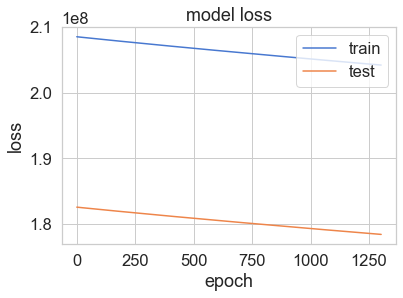

In [0]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

The reconstruction errors on both train and test data converge nicely. 

Calculate predictions by the autoencoder:

In [0]:
testPredictions = autoencoder.predict(X_test)
X_test.shape,testPredictions.shape

((1082, 64), (1082, 64))

Calculate **mean squared error**.

In [0]:
testMSE = mean_squared_error(X_test.transpose(), testPredictions.transpose(),
                              multioutput='raw_values')
error_df = pd.DataFrame({'reconstruction_error': testMSE,'true_class': y_test})
error_df.head()

reconstruction_error  true_class
1914          5.353464e+06           0
793           1.827834e+06           0
1034          1.427471e+09           1
1422          5.189102e+04           0
4286          1.365635e+08           1

In [0]:
error_df.shape

(1082, 2)

In [0]:
error_df.reconstruction_error.describe()

count    1.082000e+03
mean     1.519234e+09
std      9.226787e+09
min      1.019016e+03
25%      3.961956e+05
50%      5.039243e+06
75%      1.108519e+08
max      1.532731e+11
Name: reconstruction_error, dtype: float64

In [0]:
error_df.reconstruction_error.quantile(0.9)

1091683005.991309

### Reconstruction errors for normal transactions

Plot histogram of errors of reconstruction for normal data.

In [0]:
len(normal_error_df.reconstruction_error.values)

942

Text(0.5, 0, 'Reconstruction Errors')

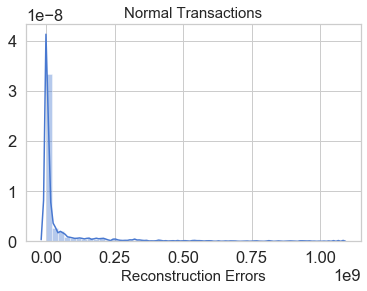

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 1089669752.125486)]
sns.distplot(normal_error_df.reconstruction_error.values)
plt.title('Normal Transactions', fontsize=15)
plt.xlabel('Reconstruction Errors', fontsize=15)

### Reconstruction errors for fraudulent transactions

Compare distribution of reconstruction error for normal data and for fraudulent data.

Text(0.5, 0, 'Reconstruction Errors')

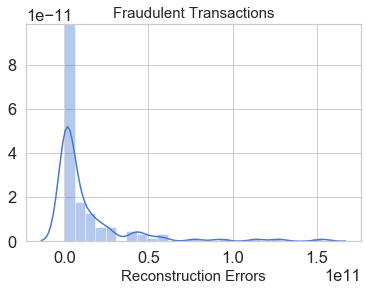

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
sns.distplot(fraud_error_df.reconstruction_error.values)
plt.title('Fraudulent Transactions', fontsize=15)
plt.xlabel('Reconstruction Errors', fontsize=15)

<span style="color:red">Errors of reconstruction of fraudulent data are much larger.</span>

In [0]:
from sklearn.metrics import (confusion_matrix, auc, roc_curve, cohen_kappa_score, accuracy_score)

Calculate ROC curve and AUC:

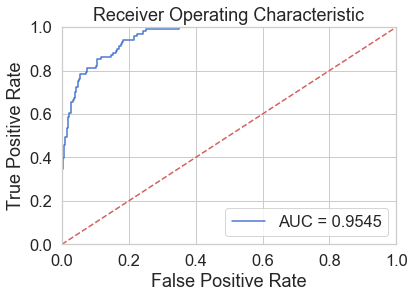

In [0]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

<span style="color:red">AUC for the autoencoder predictions is pretty high.</span>

## Prediction

To detect fraud based on prediction MSE select a high level quantile of the MSE sample that guarantees probability of type 1 error. Select 0.995 quantile of the reconstruction error for "normal" class.

In [0]:
threshold = normal_error_df.reconstruction_error.quantile(q=0.995)
threshold

940091276.2037513

Plot all errors, normal and fraud cases marked, and the threshold:

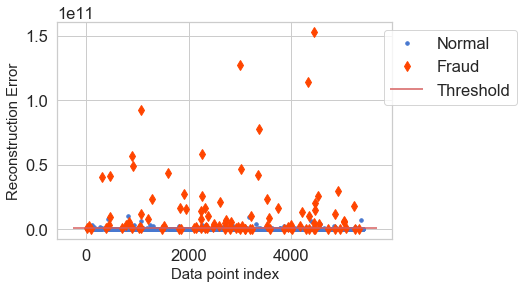

In [0]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()
for name, group in groups:
    if name == 1:
        MarkerSize = 7
        Color = 'orangered'
        Label = 'Fraud'
        Marker = 'd'
    else:
        MarkerSize = 3.5
        Color = 'b'
        Label = 'Normal'
        Marker = 'o'
    ax.plot(group.index, group.reconstruction_error, 
            linestyle='',
            color=Color,
            label=Label,
            ms=MarkerSize,
            marker=Marker)
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend(loc='upper left', bbox_to_anchor=(0.95, 1))
# plt.title("Probabilities of fraud for different classes", fontsize=15)
plt.ylabel("Reconstruction Error", fontsize=15)
plt.xlabel("Data point index", fontsize=15)
plt.show();

To draw more precise conclusions calculate confusion matrix:

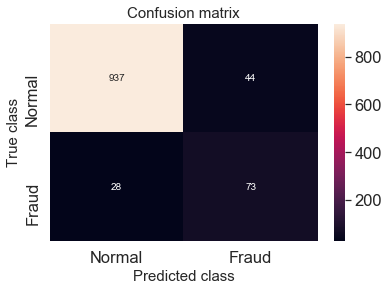

In [0]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix", fontsize=15)
plt.ylabel('True class', fontsize=15)
plt.xlabel('Predicted class', fontsize=15)
plt.show()

In [0]:
cohen_kappa_score(error_df.true_class, y_pred),accuracy_score(error_df.true_class, y_pred)

(0.6329472960111571, 0.933456561922366)

<span style="color:red">The model manages to detect many fraudulent cases with accuracy over 93%. However, because of extreme prevalence Cohen's kappa gives a much more conservative evaluation. </span>

## Graph Analysis

In [0]:
# load the package
from datetime import date
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import pickle
from sklearn import preprocessing 
import networkx as nx
from itertools import permutations
from itertools import count



plt.rcParams['figure.figsize'] = (8, 6)

In [0]:
# load the data
inpatient = pd.read_csv('../Train_Inpatientdata-1542865627584.csv')
outpatient = pd.read_csv('../Train_Outpatientdata-1542865627584.csv')
fraud = pd.read_csv('../Train-1542865627584.csv', index_col = 'Provider')

### Merge Data

In [0]:
claims = inpatient.append(outpatient)
claims = claims.merge(fraud, how = 'left', on = 'Provider')
claims.head()

/Users/hank/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


AdmissionDt AttendingPhysician     BeneID  ClaimEndDt   ClaimID  \
0  2009-04-12          PHY390922  BENE11001  2009-04-18  CLM46614   
1  2009-08-31          PHY318495  BENE11001  2009-09-02  CLM66048   
2  2009-09-17          PHY372395  BENE11001  2009-09-20  CLM68358   
3  2009-02-14          PHY369659  BENE11011  2009-02-22  CLM38412   
4  2009-08-13          PHY379376  BENE11014  2009-08-30  CLM63689   

  ClaimStartDt ClmAdmitDiagnosisCode ClmDiagnosisCode_1 ClmDiagnosisCode_10  \
0   2009-04-12                  7866               1970                 NaN   
1   2009-08-31                  6186               6186                 NaN   
2   2009-09-17                 29590              29623                 NaN   
3   2009-02-14                   431              43491                 NaN   
4   2009-08-13                 78321                042                 NaN   

  ClmDiagnosisCode_2  ... ClmProcedureCode_5 ClmProcedureCode_6  \
0               4019  ...                NaN                NaN   
1               2948  ...                NaN                NaN   
2              30390  ...                NaN                NaN   
3               2762  ...                NaN                NaN   
4               3051  ...                NaN                NaN   

  DeductibleAmtPaid DiagnosisGroupCode DischargeDt InscClaimAmtReimbursed  \
0            1068.0                201  2009-04-18                  26000   
1            1068.0                750  2009-09-02                   5000   
2            1068.0                883  2009-09-20                   5000   
3            1068.0                067  2009-02-22                   5000   
4            1068.0                975  2009-08-30                  10000   

  OperatingPhysician  OtherPhysician  Provider  PotentialFraud  
0                NaN             NaN  PRV55912             Yes  
1          PHY318495             NaN  PRV55907              No  
2                NaN       PHY324689  PRV56046              No  
3          PHY392961       PHY349768  PRV52405              No  
4          PHY398258             NaN  PRV56614              No  

[5 rows x 31 columns]

In [0]:
claims = claims[['Provider', 'BeneID', 'OperatingPhysician',
        'AttendingPhysician', 'OtherPhysician','PotentialFraud']]

In [0]:
claims.head()

Provider     BeneID OperatingPhysician AttendingPhysician OtherPhysician  \
0  PRV55912  BENE11001                NaN          PHY390922            NaN   
1  PRV55907  BENE11001          PHY318495          PHY318495            NaN   
2  PRV56046  BENE11001                NaN          PHY372395      PHY324689   
3  PRV52405  BENE11011          PHY392961          PHY369659      PHY349768   
4  PRV56614  BENE11014          PHY398258          PHY379376            NaN   

  PotentialFraud  
0            Yes  
1             No  
2             No  
3             No  
4             No

In [0]:
claims.shape

(558211, 6)

In [0]:
claims

Provider      BeneID OperatingPhysician AttendingPhysician  \
0       PRV55912   BENE11001                NaN          PHY390922   
1       PRV55907   BENE11001          PHY318495          PHY318495   
2       PRV56046   BENE11001                NaN          PHY372395   
3       PRV52405   BENE11011          PHY392961          PHY369659   
4       PRV56614   BENE11014          PHY398258          PHY379376   
...          ...         ...                ...                ...   
558206  PRV53699  BENE159198          PHY364188          PHY364188   
558207  PRV53702  BENE159198          PHY332284          PHY423019   
558208  PRV53676  BENE159198                NaN          PHY361063   
558209  PRV53689  BENE159198                NaN          PHY403198   
558210  PRV53689  BENE159198                NaN          PHY419379   

       OtherPhysician PotentialFraud  
0                 NaN            Yes  
1                 NaN             No  
2           PHY324689             No  
3           PHY349768             No  
4                 NaN             No  
...               ...            ...  
558206      PHY385752             No  
558207            NaN             No  
558208            NaN             No  
558209      PHY419379             No  
558210      PHY419379             No  

[558211 rows x 6 columns]

### Group data

Based on Provider and Patient

In [0]:
ProviderRel = claims[['Provider','BeneID','PotentialFraud' ]]

In [0]:
ProviderRel.head()

Provider     BeneID PotentialFraud
0  PRV55912  BENE11001            Yes
1  PRV55907  BENE11001             No
2  PRV56046  BENE11001             No
3  PRV52405  BENE11011             No
4  PRV56614  BENE11014             No

In [0]:
ProviderRel.shape

(558211, 3)

### Similar Patients

In [0]:
Similar = claims[['Provider','BeneID']]
#[claims['PotentialFraud'] == 'Yes']

In [0]:
Similar = Similar.drop_duplicates()

In [0]:
Similar.head()

Provider     BeneID
0  PRV55912  BENE11001
1  PRV55907  BENE11001
2  PRV56046  BENE11001
3  PRV52405  BENE11011
4  PRV56614  BENE11014

In [0]:
Similar.shape

(363300, 2)

In [0]:
top = Similar['BeneID'].value_counts().head(300)
top.head()

BENE40202     20
BENE122118    19
BENE122143    17
BENE133498    17
BENE120090    17
Name: BeneID, dtype: int64

In [0]:
top.tail()

BENE129540    11
BENE95399     11
BENE139412    11
BENE130052    11
BENE79385     11
Name: BeneID, dtype: int64

In [0]:
#Similar['BeneID'] 
Similar = Similar[Similar.BeneID.isin(top.index)]

In [0]:
Similar.shape

(3776, 2)

In [0]:
ss = Similar.groupby('Provider')

In [0]:
count_dct = Similar.groupby('Provider').count().to_dict()
count_dct = count_dct.values()

In [0]:
unique_grp = Similar['Provider'].unique() # get the unique groups 
unique_atr = Similar['BeneID'].unique() # get the unique attributes

In [0]:
count_dct1 = Similar.groupby('Provider').count()

In [0]:
print(unique_grp.shape)
print(unique_atr.shape)

(1390,)
(300,)


In [0]:
combos = list(permutations(unique_grp, 2)) # get all combinations of the groups
comp_df = pd.DataFrame(data = (combos), columns = ['Group','LikeGroup']) # create the array to put comparison data into
comp_df['CommonWords'] = 0 

In [0]:
i = 1
for atr in unique_atr:
    print("i step: " + str(i))
    i = i + 1
    temp_df = Similar[Similar['BeneID'] == atr] # break dataframe into pieces that only contain the attribute being looked at during that iteration

    myl = list(permutations(temp_df['Provider'],2)) # returns the pairs that have the attribute in common as a tuple
    j = 0
    for comb in myl:
        comp_df.loc[(comp_df['Group'] == comb[0]) & (comp_df['LikeGroup'] == comb[1]), 'CommonWords'] += 1 # increments the CommonWords column where the Group column is equal to the first entry in the previously mentioned tuple, and the LikeGroup column is equal to the second entry.

k = 0     
print('i OVER')
#for key, val in count_dct.items(): # put the previously computed TotalCount into the comparison dataframe
#    print('k step:' + str(k))
#    comp_df.loc[comp_df['Provider'] == key, 'TotalCount'] = val

#comp_df['PCT'] = (comp_df['CommonWords'] * 100.0 / comp_df['TotalCount']).round()
comp_df1 = comp_df
comp_df1 = comp_df1.merge(fraud, how = 'left', left_on='Group', right_on='Provider')
comp_df1 = comp_df1.rename(columns={"PotentialFraud": "GroupFraud"})
comp_df1 = comp_df1.merge(fraud, how = 'left', left_on='LikeGroup', right_on='Provider')
comp_df1 = comp_df1.rename(columns={"PotentialFraud": "LikeGroupFraud"})

comp_df1 = comp_df1.merge(count_dct1, how = 'left', left_on='Group', right_on='Provider')
comp_df1 = comp_df1.rename(columns={"BeneID": "TotalGroup"})
comp_df1 = comp_df1.merge(count_dct1, how = 'left', left_on='LikeGroup', right_on='Provider')
comp_df1 = comp_df1.rename(columns={"BeneID": "TotalLikeGroup"})

comp_df1['PCT'] = (comp_df1['CommonWords'] * 100.0 / comp_df1['TotalGroup']).round()

i step: 1
i step: 2
i step: 3
i step: 4
i step: 5
i step: 6
i step: 7
i step: 8
i step: 9
i step: 10
i step: 11
i step: 12
i step: 13
i step: 14
i step: 15
i step: 16
i step: 17
i step: 18
i step: 19
i step: 20
i step: 21
i step: 22
i step: 23
i step: 24
i step: 25
i step: 26
i step: 27
i step: 28
i step: 29
i step: 30
i step: 31
i step: 32
i step: 33
i step: 34
i step: 35
i step: 36
i step: 37
i step: 38
i step: 39
i step: 40
i step: 41
i step: 42
i step: 43
i step: 44
i step: 45
i step: 46
i step: 47
i step: 48
i step: 49
i step: 50
i step: 51
i step: 52
i step: 53
i step: 54
i step: 55
i step: 56
i step: 57
i step: 58
i step: 59
i step: 60
i step: 61
i step: 62
i step: 63
i step: 64
i step: 65
i step: 66
i step: 67
i step: 68
i step: 69
i step: 70
i step: 71
i step: 72
i step: 73
i step: 74
i step: 75
i step: 76
i step: 77
i step: 78
i step: 79
i step: 80
i step: 81
i step: 82
i step: 83
i step: 84
i step: 85
i step: 86
i step: 87
i step: 88
i step: 89
i step: 90
i step: 91
i step: 

In [0]:
comp_df1.to_csv('BenProvData.csv')

In [0]:
comp_df1.sort_values('CommonWords', ascending=False).head(20)

Group LikeGroup  CommonWords GroupFraud LikeGroupFraud  TotalGroup  \
418137  PRV51204  PRV51164           13         No             No          18   
65583   PRV51140  PRV51204           13         No             No          17   
66972   PRV51164  PRV51204           13         No             No          16   
462838  PRV51156  PRV51204           13         No             No          16   
418421  PRV51204  PRV51156           13         No             No          18   
418136  PRV51204  PRV51140           13         No             No          18   
462585  PRV51156  PRV51164           11         No             No          16   
65615   PRV51140  PRV51156           11         No             No          17   
462584  PRV51156  PRV51140           11         No             No          16   
67004   PRV51164  PRV51156           11         No             No          16   
12801   PRV51149  PRV51204           10        Yes             No          11   
554618  PRV52628  PRV52649           10        Yes            Yes          12   
12833   PRV51149  PRV51156           10        Yes             No          11   
567111  PRV52649  PRV52628           10        Yes            Yes          17   
462546  PRV51156  PRV51149           10         No            Yes          16   
418098  PRV51204  PRV51149           10         No            Yes          18   
432094  PRV52098  PRV55215            9         No            Yes          17   
160045  PRV55215  PRV52098            9        Yes             No          38   
556007  PRV52571  PRV52649            8         No            Yes           9   
556002  PRV52571  PRV52631            8         No             No           9   

        TotalLikeGroup   PCT  
418137              16  72.0  
65583               18  76.0  
66972               18  81.0  
462838              18  81.0  
418421              16  72.0  
418136              17  72.0  
462585              16  69.0  
65615               16  65.0  
462584              17  69.0  
67004               16  69.0  
12801               18  91.0  
554618              17  83.0  
12833               16  91.0  
567111              12  59.0  
462546              11  62.0  
418098              11  56.0  
432094              38  53.0  
160045              17  24.0  
556007              17  89.0  
556002               9  89.0

In [0]:
Groups = comp_df1.sort_values('CommonWords', ascending=False).head(20)

In [0]:
Groups['Group'].unique()

array(['PRV51204', 'PRV51140', 'PRV51164', 'PRV51156', 'PRV51149',
       'PRV52628', 'PRV52649', 'PRV52098', 'PRV55215', 'PRV52571'],
      dtype=object)

In [0]:
Groups['LikeGroup'].unique()

array(['PRV51164', 'PRV51204', 'PRV51156', 'PRV51140', 'PRV52649',
       'PRV52628', 'PRV51149', 'PRV55215', 'PRV52098', 'PRV52631'],
      dtype=object)

In [0]:
newGroup = ProviderRel[(ProviderRel['Provider'].isin(Groups['Group'].unique())) |
            (ProviderRel['Provider'].isin(Groups['LikeGroup'].unique()))].drop_duplicates()

In [0]:
newGroup.head()

Provider     BeneID PotentialFraud
9    PRV55215  BENE11034            Yes
38   PRV51164  BENE11101             No
43   PRV51140  BENE11147             No
171  PRV51149  BENE11648            Yes
181  PRV55215  BENE11672            Yes

In [0]:
newGroup.shape

(8768, 3)

In [0]:
FGa = nx.from_pandas_edgelist(newGroup, source='Provider',
                             target='BeneID')


In [0]:
fraud1 = fraud
fraud1 = fraud1.reset_index()
fraud1 = fraud1[fraud1['Provider'].isin(newGroup.Provider)].set_index('Provider')

In [0]:
nx.set_node_attributes(FGa, name = 'Fraud', values = pd.Series(fraud1.PotentialFraud).to_dict())
#nx.set_node_attributes(FGa, 'gender', pd.Series(nodes.gender, index=nodes.node).to_dict())

In [0]:
fraud1 = fraud
fraud1 = fraud1.reset_index()
fraud1 = fraud1[fraud1['Provider'].isin(newGroup.Provider)]

In [0]:
Ben = newGroup[['BeneID','PotentialFraud']]
Ben.PotentialFraud = 'Ben'
Ben = Ben.drop_duplicates()
Ben = Ben.rename(columns={"BeneID": "Provider"})
fraud2 = fraud1.append(Ben)

In [0]:
fraud2 = fraud2.set_index('Provider')

In [0]:
fraud2.head(20)

PotentialFraud
Provider                
PRV51140              No
PRV51149             Yes
PRV51156              No
PRV51164              No
PRV51204              No
PRV52098              No
PRV52571              No
PRV52628             Yes
PRV52631              No
PRV52649             Yes
PRV55215             Yes
BENE11034            Ben
BENE11101            Ben
BENE11147            Ben
BENE11648            Ben
BENE11672            Ben
BENE12033            Ben
BENE12101            Ben
BENE12549            Ben
BENE13018            Ben

In [0]:
nx.set_node_attributes(FGa, name = 'Fraud', values = pd.Series(fraud2.PotentialFraud).to_dict())
#nx.set_node_attributes(FGa, 'gender', pd.Series(nodes.gender, index=nodes.node).to_dict())

In [0]:
pd.Series(fraud2.PotentialFraud)
#.to_dict()

Provider
PRV51140       No
PRV51149      Yes
PRV51156       No
PRV51164       No
PRV51204       No
             ... 
BENE158997    Ben
BENE159015    Ben
BENE159102    Ben
BENE159104    Ben
BENE159154    Ben
Name: PotentialFraud, Length: 6835, dtype: object

In [0]:
nx.get_node_attributes(FGa, 'Fraud')

{'PRV55215': 'Yes',
 'BENE11034': 'Ben',
 'PRV51164': 'No',
 'BENE11101': 'Ben',
 'PRV51140': 'No',
 'BENE11147': 'Ben',
 'PRV51149': 'Yes',
 'BENE11648': 'Ben',
 'BENE11672': 'Ben',
 'BENE12033': 'Ben',
 'BENE12101': 'Ben',
 'BENE12549': 'Ben',
 'BENE13018': 'Ben',
 'BENE13123': 'Ben',
 'BENE13677': 'Ben',
 'BENE13923': 'Ben',
 'BENE14350': 'Ben',
 'BENE15276': 'Ben',
 'BENE15328': 'Ben',
 'BENE15362': 'Ben',
 'BENE15755': 'Ben',
 'BENE15954': 'Ben',
 'BENE16163': 'Ben',
 'BENE16214': 'Ben',
 'BENE17210': 'Ben',
 'BENE17395': 'Ben',
 'BENE17903': 'Ben',
 'BENE19061': 'Ben',
 'BENE19379': 'Ben',
 'BENE20353': 'Ben',
 'BENE21154': 'Ben',
 'BENE22067': 'Ben',
 'BENE22277': 'Ben',
 'BENE22436': 'Ben',
 'BENE22466': 'Ben',
 'BENE22556': 'Ben',
 'BENE22579': 'Ben',
 'BENE22586': 'Ben',
 'BENE23331': 'Ben',
 'BENE23979': 'Ben',
 'BENE25098': 'Ben',
 'BENE26163': 'Ben',
 'BENE27948': 'Ben',
 'BENE29521': 'Ben',
 'BENE29927': 'Ben',
 'BENE30140': 'Ben',
 'BENE30181': 'Ben',
 'BENE30377': 'Ben'

In [0]:
len(FGa)

6835

In [0]:
print(nx.info(FGa))

Name: 
Type: Graph
Number of nodes: 6835
Number of edges: 8768
Average degree:   2.5656


In [0]:
#FGa.nodes()

In [0]:
FGa.node[n]['Fraud']

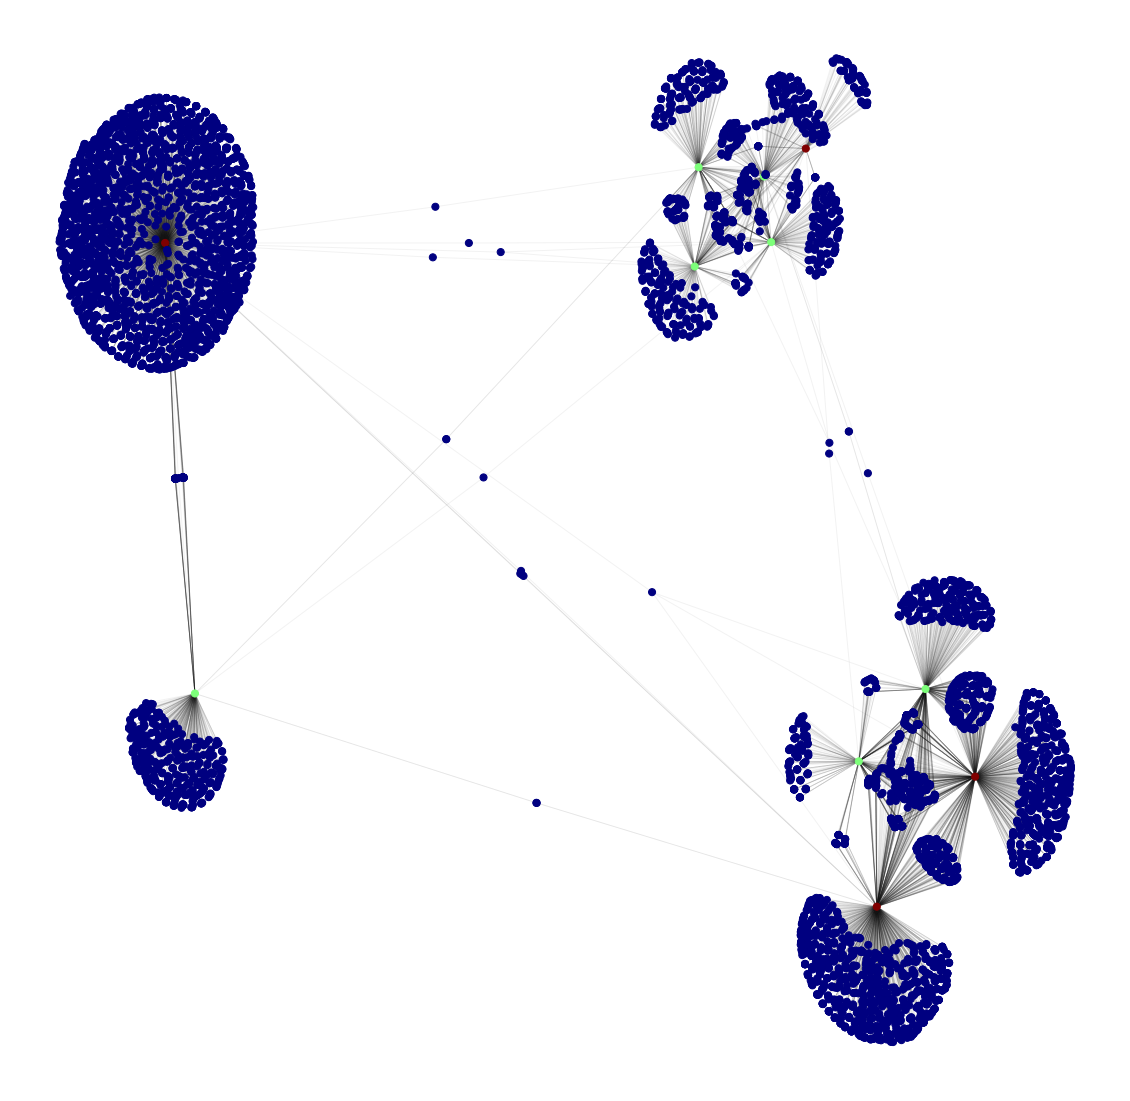

In [0]:
from itertools import count
plt.figure(figsize=(20,20))
# get unique groups
groups = set(nx.get_node_attributes(FGa,'Fraud').values())
mapping = dict(zip(sorted(groups),count()))
nodes = FGa.nodes()
colors = [mapping[FGa.node[n]['Fraud']] for n in nodes]

# drawing nodes and edges separately so we can capture collection for colobar
pos = nx.spring_layout(FGa)
ec = nx.draw_networkx_edges(FGa, pos, alpha=0.05)
nc = nx.draw_networkx_nodes(FGa, pos, nodelist=nodes, node_color=colors, 
                            with_labels=False, node_size=50, cmap=plt.cm.jet)
#plt.colorbar(nc)
plt.axis('off')
plt.show()

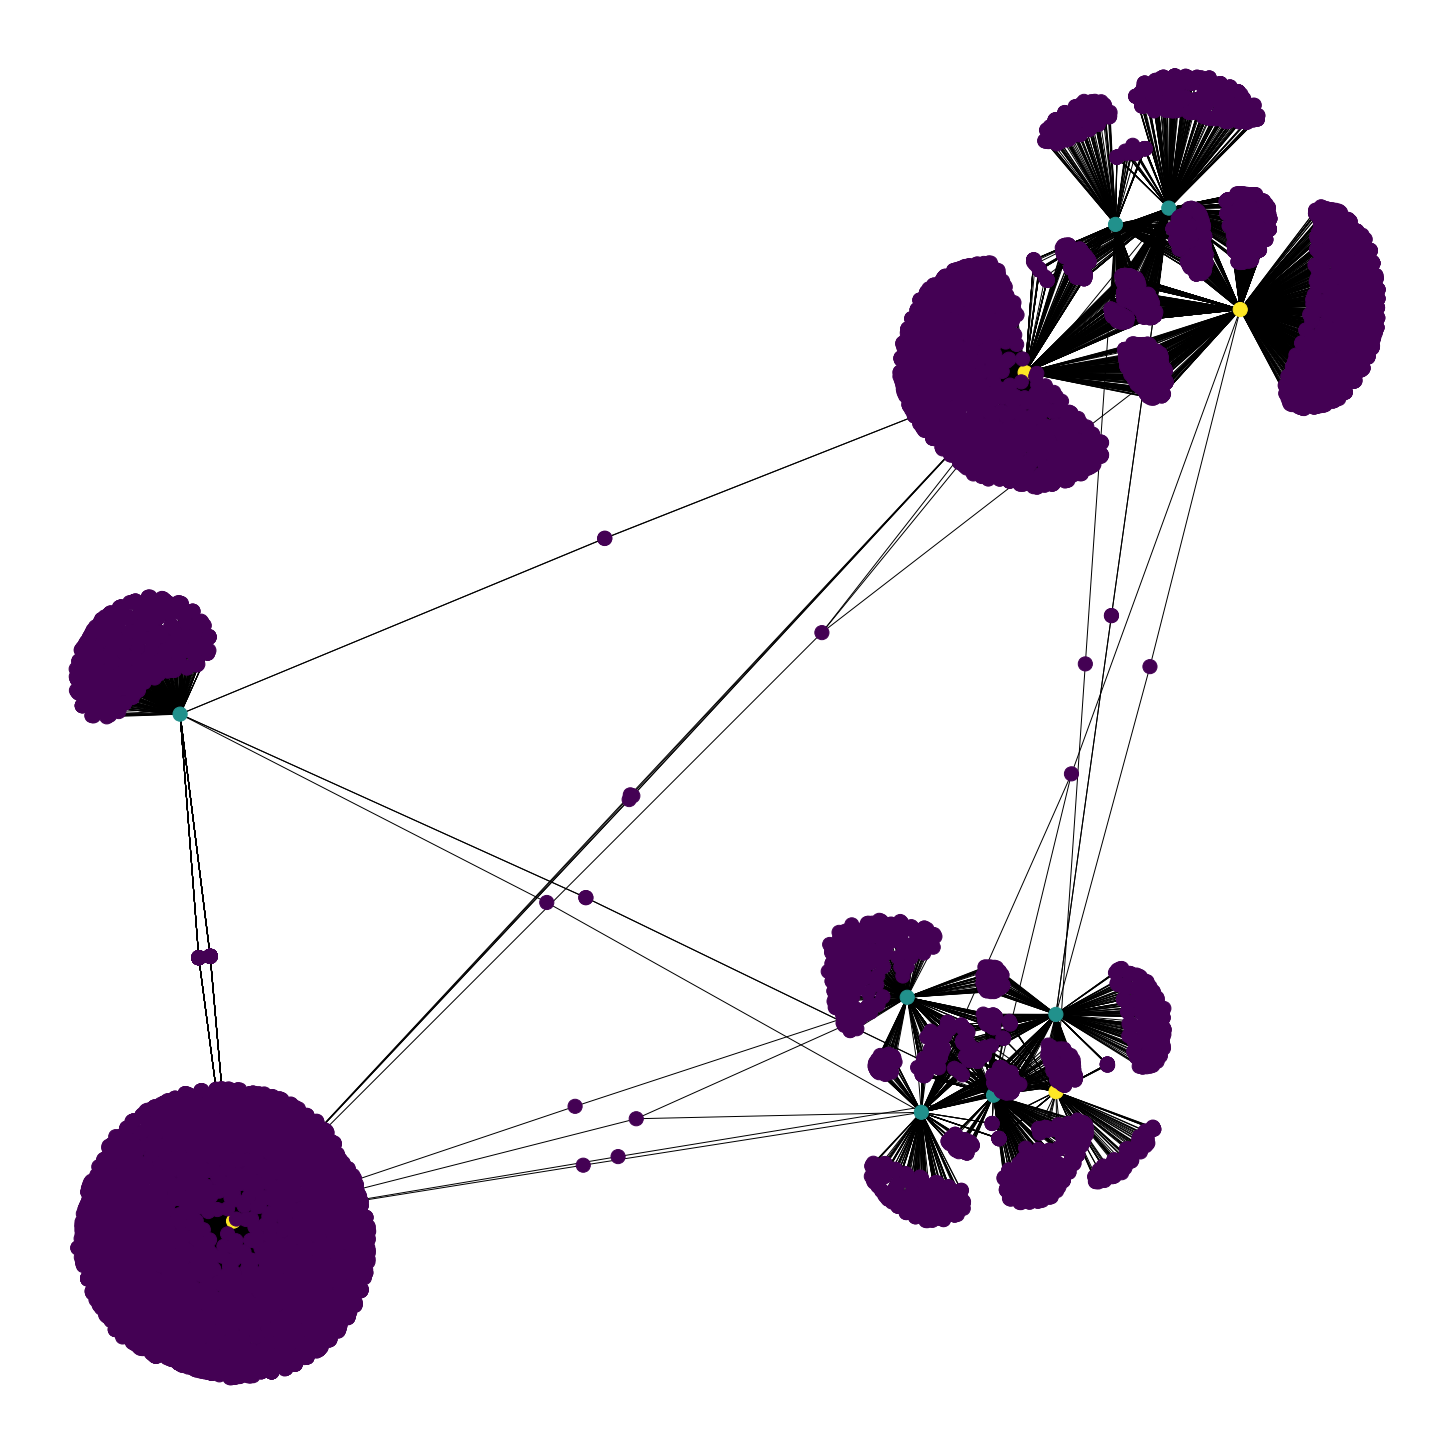

In [0]:
plt.figure(figsize=(20,20))
nx.draw(FGa, 
        with_labels = False,
        font_size = 5, 
        nodelist=nodes,
        node_color=colors,
        node_size = 200
       )   
plt.show()

In [0]:
plt.figure(figsize=(10,8))
nx.draw(FGa, 
        with_labels = False,
        font_size = 5, 
        #node_color=['red', 'blue'],
        node_size = 10
       )   
plt.show()

### Similar Providers

In [0]:
Similar = claims[['Provider','AttendingPhysician']]
#[claims['PotentialFraud'] == 'Yes']

In [0]:
Similar = Similar.drop_duplicates()

In [0]:
Similar.head()

Provider AttendingPhysician
0  PRV55912          PHY390922
1  PRV55907          PHY318495
2  PRV56046          PHY372395
3  PRV52405          PHY369659
4  PRV56614          PHY379376

In [0]:
Similar.shape

(88810, 2)

In [0]:
top = Similar['AttendingPhysician'].value_counts().head(2000)
top.head()

PHY342165    9
PHY365132    8
PHY417254    7
PHY418551    6
PHY389249    6
Name: AttendingPhysician, dtype: int64

In [0]:
top.tail()

PHY433667    2
PHY398825    2
PHY337634    2
PHY349540    2
PHY424128    2
Name: AttendingPhysician, dtype: int64

In [0]:
#Similar['BeneID'] 
Similar = Similar[Similar.AttendingPhysician.isin(top.index)]

In [0]:
Similar.shape

(4623, 2)

In [0]:
ss = Similar.groupby('Provider')

In [0]:
count_dct = Similar.groupby('Provider').count().to_dict()
count_dct = count_dct.values()

In [0]:
unique_grp = Similar['Provider'].unique() # get the unique groups 
unique_atr = Similar['AttendingPhysician'].unique() # get the unique attributes

In [0]:
count_dct1 = Similar.groupby('Provider').count()

In [0]:
print(unique_grp.shape)
print(unique_atr.shape)

(2406,)
(2000,)


In [0]:
combos = list(permutations(unique_grp, 2)) # get all combinations of the groups
comp_df = pd.DataFrame(data = (combos), columns = ['Group','LikeGroup']) # create the array to put comparison data into
comp_df['CommonWords'] = 0 

In [0]:
i = 1
for atr in unique_atr:
    print("i step: " + str(i))
    i = i + 1
    temp_df = Similar[Similar['AttendingPhysician'] == atr] # break dataframe into pieces that only contain the attribute being looked at during that iteration

    myl = list(permutations(temp_df['Provider'],2)) # returns the pairs that have the attribute in common as a tuple
    j = 0
    for comb in myl:
        comp_df.loc[(comp_df['Group'] == comb[0]) & (comp_df['LikeGroup'] == comb[1]), 'CommonWords'] += 1 # increments the CommonWords column where the Group column is equal to the first entry in the previously mentioned tuple, and the LikeGroup column is equal to the second entry.

k = 0     
print('i OVER')
#for key, val in count_dct.items(): # put the previously computed TotalCount into the comparison dataframe
#    print('k step:' + str(k))
#    comp_df.loc[comp_df['Provider'] == key, 'TotalCount'] = val

#comp_df['PCT'] = (comp_df['CommonWords'] * 100.0 / comp_df['TotalCount']).round()
comp_df1 = comp_df
comp_df1 = comp_df1.merge(fraud, how = 'left', left_on='Group', right_on='Provider')
comp_df1 = comp_df1.rename(columns={"PotentialFraud": "GroupFraud"})
comp_df1 = comp_df1.merge(fraud, how = 'left', left_on='LikeGroup', right_on='Provider')
comp_df1 = comp_df1.rename(columns={"PotentialFraud": "LikeGroupFraud"})

comp_df1 = comp_df1.merge(count_dct1, how = 'left', left_on='Group', right_on='Provider')
comp_df1 = comp_df1.rename(columns={"AttendingPhysician": "TotalGroup"})
comp_df1 = comp_df1.merge(count_dct1, how = 'left', left_on='LikeGroup', right_on='Provider')
comp_df1 = comp_df1.rename(columns={"AttendingPhysician": "TotalLikeGroup"})

comp_df1['PCT'] = (comp_df1['CommonWords'] * 100.0 / comp_df1['TotalGroup']).round()

i step: 1
i step: 2
i step: 3
i step: 4
i step: 5
i step: 6
i step: 7
i step: 8
i step: 9
i step: 10
i step: 11
i step: 12
i step: 13
i step: 14
i step: 15
i step: 16
i step: 17
i step: 18
i step: 19
i step: 20
i step: 21
i step: 22
i step: 23
i step: 24
i step: 25
i step: 26
i step: 27
i step: 28
i step: 29
i step: 30
i step: 31
i step: 32
i step: 33
i step: 34
i step: 35
i step: 36
i step: 37
i step: 38
i step: 39
i step: 40
i step: 41
i step: 42
i step: 43
i step: 44
i step: 45
i step: 46
i step: 47
i step: 48
i step: 49
i step: 50
i step: 51
i step: 52
i step: 53
i step: 54
i step: 55
i step: 56
i step: 57
i step: 58
i step: 59
i step: 60
i step: 61
i step: 62
i step: 63
i step: 64
i step: 65
i step: 66
i step: 67
i step: 68
i step: 69
i step: 70
i step: 71
i step: 72
i step: 73
i step: 74
i step: 75
i step: 76
i step: 77
i step: 78
i step: 79
i step: 80
i step: 81
i step: 82
i step: 83
i step: 84
i step: 85
i step: 86
i step: 87
i step: 88
i step: 89
i step: 90
i step: 91
i step: 

i step: 693
i step: 694
i step: 695
i step: 696
i step: 697
i step: 698
i step: 699
i step: 700
i step: 701
i step: 702
i step: 703
i step: 704
i step: 705
i step: 706
i step: 707
i step: 708
i step: 709
i step: 710
i step: 711
i step: 712
i step: 713
i step: 714
i step: 715
i step: 716
i step: 717
i step: 718
i step: 719
i step: 720
i step: 721
i step: 722
i step: 723
i step: 724
i step: 725
i step: 726
i step: 727
i step: 728
i step: 729
i step: 730
i step: 731
i step: 732
i step: 733
i step: 734
i step: 735
i step: 736
i step: 737
i step: 738
i step: 739
i step: 740
i step: 741
i step: 742
i step: 743
i step: 744
i step: 745
i step: 746
i step: 747
i step: 748
i step: 749
i step: 750
i step: 751
i step: 752
i step: 753
i step: 754
i step: 755
i step: 756
i step: 757
i step: 758
i step: 759
i step: 760
i step: 761
i step: 762
i step: 763
i step: 764
i step: 765
i step: 766
i step: 767
i step: 768
i step: 769
i step: 770
i step: 771
i step: 772
i step: 773
i step: 774
i step: 775
i st

i step: 1347
i step: 1348
i step: 1349
i step: 1350
i step: 1351
i step: 1352
i step: 1353
i step: 1354
i step: 1355
i step: 1356
i step: 1357
i step: 1358
i step: 1359
i step: 1360
i step: 1361
i step: 1362
i step: 1363
i step: 1364
i step: 1365
i step: 1366
i step: 1367
i step: 1368
i step: 1369
i step: 1370
i step: 1371
i step: 1372
i step: 1373
i step: 1374
i step: 1375
i step: 1376
i step: 1377
i step: 1378
i step: 1379
i step: 1380
i step: 1381
i step: 1382
i step: 1383
i step: 1384
i step: 1385
i step: 1386
i step: 1387
i step: 1388
i step: 1389
i step: 1390
i step: 1391
i step: 1392
i step: 1393
i step: 1394
i step: 1395
i step: 1396
i step: 1397
i step: 1398
i step: 1399
i step: 1400
i step: 1401
i step: 1402
i step: 1403
i step: 1404
i step: 1405
i step: 1406
i step: 1407
i step: 1408
i step: 1409
i step: 1410
i step: 1411
i step: 1412
i step: 1413
i step: 1414
i step: 1415
i step: 1416
i step: 1417
i step: 1418
i step: 1419
i step: 1420
i step: 1421
i step: 1422
i step: 1423

i step: 1978
i step: 1979
i step: 1980
i step: 1981
i step: 1982
i step: 1983
i step: 1984
i step: 1985
i step: 1986
i step: 1987
i step: 1988
i step: 1989
i step: 1990
i step: 1991
i step: 1992
i step: 1993
i step: 1994
i step: 1995
i step: 1996
i step: 1997
i step: 1998
i step: 1999
i step: 2000
i OVER


In [0]:
comp_df1.to_csv('ProvProvData.csv')

In [0]:
comp_df1.sort_values('CommonWords', ascending=False).head()

Group LikeGroup  CommonWords GroupFraud LikeGroupFraud  \
1794805  PRV54070  PRV54092           19        Yes             No   
1624120  PRV54092  PRV54070           19         No            Yes   
62541    PRV52065  PRV52019            9        Yes            Yes   
236697   PRV55957  PRV56015            9        Yes             No   
26480    PRV52019  PRV52065            9        Yes            Yes   

         TotalGroup  TotalLikeGroup   PCT  
1794805          21              20  90.0  
1624120          20              21  95.0  
62541            11              18  82.0  
236697           14              12  64.0  
26480            18              11  50.0

In [0]:
Groups = comp_df1.sort_values('CommonWords', ascending=False).head(30)

In [0]:
Groups['Group'].unique()

array(['PRV54070', 'PRV54092', 'PRV52065', 'PRV55957', 'PRV52019',
       'PRV56015', 'PRV57176', 'PRV57224', 'PRV57209', 'PRV55192',
       'PRV55234', 'PRV52014', 'PRV52126', 'PRV51479', 'PRV55230',
       'PRV54564', 'PRV57572', 'PRV54578', 'PRV52486', 'PRV57519',
       'PRV57528', 'PRV51578', 'PRV52492', 'PRV57521', 'PRV52837',
       'PRV52488'], dtype=object)

In [0]:
Groups['LikeGroup'].unique()

array(['PRV54092', 'PRV54070', 'PRV52019', 'PRV56015', 'PRV52065',
       'PRV55957', 'PRV57224', 'PRV57176', 'PRV57209', 'PRV55234',
       'PRV55192', 'PRV52126', 'PRV52014', 'PRV51578', 'PRV54578',
       'PRV57521', 'PRV54564', 'PRV52492', 'PRV57528', 'PRV57519',
       'PRV51479', 'PRV55230', 'PRV52486', 'PRV57572', 'PRV52873'],
      dtype=object)

In [0]:
ProviderRel2 = claims[['Provider','AttendingPhysician','PotentialFraud' ]]

In [0]:
newGroup = ProviderRel2[(ProviderRel2['Provider'].isin(Groups['Group'].unique())) |
            (ProviderRel2['Provider'].isin(Groups['LikeGroup'].unique()))].drop_duplicates()

In [0]:
newGroup.head()

Provider AttendingPhysician PotentialFraud
23   PRV51578          PHY378170            Yes
46   PRV52019          PHY351641            Yes
90   PRV55230          PHY333406            Yes
164  PRV51578          PHY346389            Yes
177  PRV52019          PHY416959            Yes

In [0]:
newGroup.shape

(2967, 3)

In [0]:
FGa = nx.from_pandas_edgelist(newGroup, source='Provider',
                             target='AttendingPhysician')


In [0]:
fraud1 = fraud
fraud1 = fraud1.reset_index()
fraud1 = fraud1[fraud1['Provider'].isin(newGroup.Provider)]

In [0]:
Ben = newGroup[['AttendingPhysician','PotentialFraud']]
Ben.PotentialFraud = 'Att'
Ben = Ben.drop_duplicates()
Ben = Ben.rename(columns={"AttendingPhysician": "Provider"})
fraud2 = fraud1.append(Ben)

In [0]:
fraud1.head()

Provider PotentialFraud
380  PRV51479             No
458  PRV51578            Yes
816  PRV52014             No
818  PRV52019            Yes
854  PRV52065            Yes

In [0]:
fraud2 = fraud2.set_index('Provider')

In [0]:
nx.set_node_attributes(FGa, name = 'Fraud', values = pd.Series(fraud2.PotentialFraud).to_dict())
#nx.set_node_attributes(FGa, 'gender', pd.Series(nodes.gender, index=nodes.node).to_dict())

In [0]:
nx.get_node_attributes(FGa, 'Fraud')

{'PRV51578': 'Yes',
 'PHY378170': 'Att',
 'PRV52019': 'Yes',
 'PHY351641': 'Att',
 'PRV55230': 'Yes',
 'PHY333406': 'Att',
 'PHY346389': 'Att',
 'PHY416959': 'Att',
 'PRV52065': 'Yes',
 'PHY349113': 'Att',
 'PHY355567': 'Att',
 'PHY386778': 'Att',
 'PHY395933': 'Att',
 'PHY401599': 'Att',
 'PHY411720': 'Att',
 'PRV52126': 'No',
 'PHY403849': 'Att',
 'PHY349423': 'Att',
 'PHY428365': 'Att',
 'PHY418842': 'Att',
 'PHY360449': 'Att',
 'PHY349478': 'Att',
 'PHY406635': 'Att',
 'PHY412347': 'Att',
 'PHY313016': 'Att',
 'PHY405470': 'Att',
 'PHY376123': 'Att',
 'PHY313437': 'Att',
 'PHY388158': 'Att',
 'PRV55192': 'No',
 'PHY374234': 'Att',
 'PHY359004': 'Att',
 'PHY393952': 'Att',
 'PHY424531': 'Att',
 'PHY380738': 'Att',
 'PHY331475': 'Att',
 'PHY347413': 'Att',
 'PRV57521': 'No',
 'PHY411423': 'Att',
 'PHY366173': 'Att',
 'PHY397753': 'Att',
 'PHY335174': 'Att',
 'PHY404769': 'Att',
 'PRV56015': 'No',
 'PHY416370': 'Att',
 'PHY326013': 'Att',
 'PHY420653': 'Att',
 'PHY313129': 'Att',
 'PR

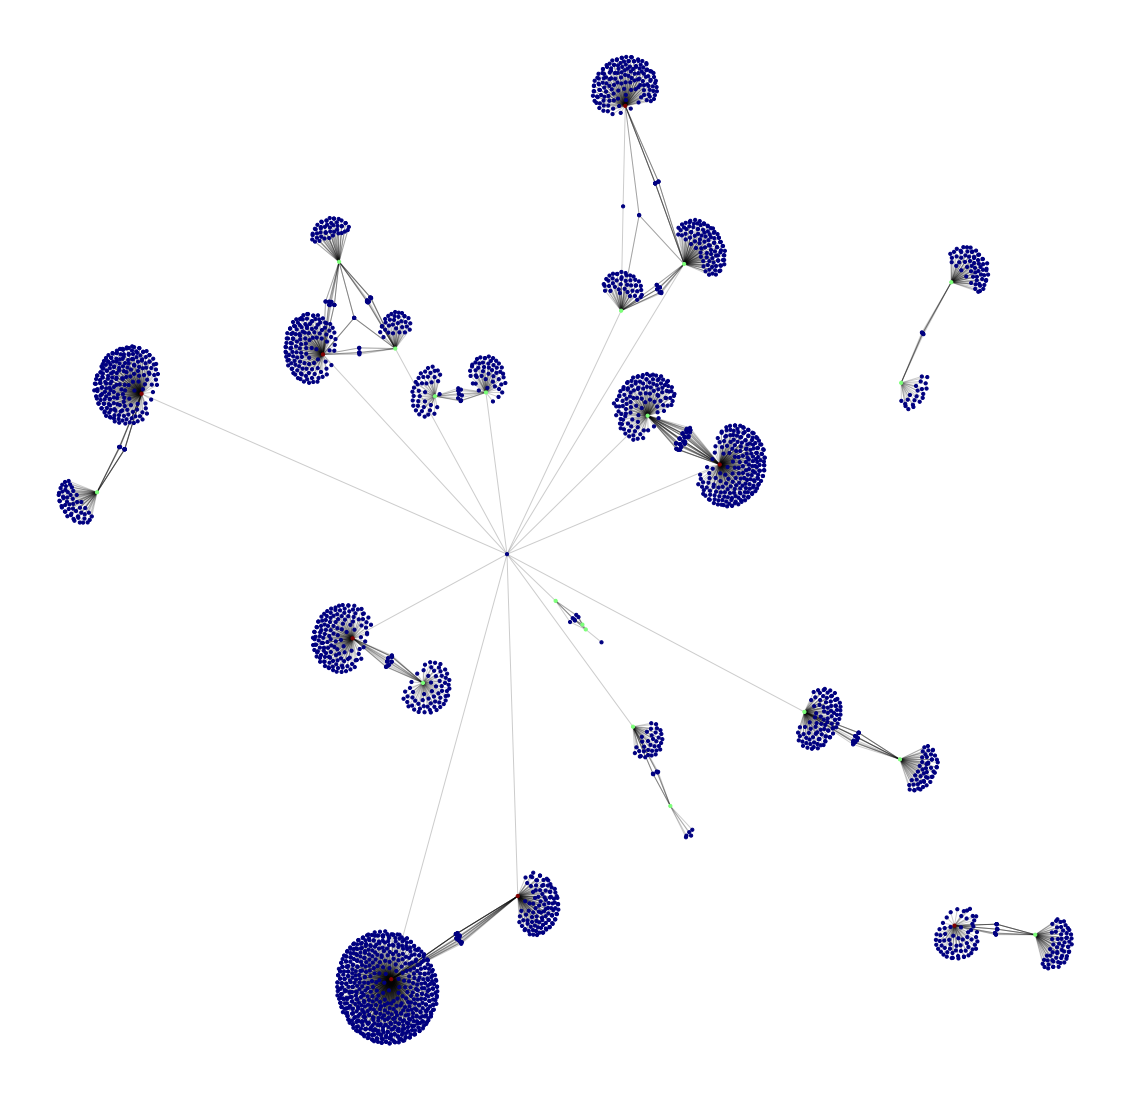

In [0]:
from itertools import count
plt.figure(figsize=(20,20))
# get unique groups
groups = set(nx.get_node_attributes(FGa,'Fraud').values())
mapping = dict(zip(sorted(groups),count()))
nodes = FGa.nodes()
colors = [mapping[FGa.node[n]['Fraud']] for n in nodes]

# drawing nodes and edges separately so we can capture collection for colobar
pos = nx.spring_layout(FGa)
ec = nx.draw_networkx_edges(FGa, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(FGa, pos, nodelist=nodes, node_color=colors, 
                            with_labels=False, node_size=10, cmap=plt.cm.jet)
#plt.colorbar(nc)
plt.axis('off')
plt.show()

In [0]:
len(FGa)

2769

In [0]:
print(nx.info(FGa))

Name: 
Type: Graph
Number of nodes: 2769
Number of edges: 2967
Average degree:   2.1430


In [0]:
nx.get_node_attributes(FGa,'Fraud' )

{'PRV51578': 'Yes',
 'PHY378170': 'Att',
 'PRV52019': 'Yes',
 'PHY351641': 'Att',
 'PRV55230': 'Yes',
 'PHY333406': 'Att',
 'PHY346389': 'Att',
 'PHY416959': 'Att',
 'PRV52065': 'Yes',
 'PHY349113': 'Att',
 'PHY355567': 'Att',
 'PHY386778': 'Att',
 'PHY395933': 'Att',
 'PHY401599': 'Att',
 'PHY411720': 'Att',
 'PRV52126': 'No',
 'PHY403849': 'Att',
 'PHY349423': 'Att',
 'PHY428365': 'Att',
 'PHY418842': 'Att',
 'PHY360449': 'Att',
 'PHY349478': 'Att',
 'PHY406635': 'Att',
 'PHY412347': 'Att',
 'PHY313016': 'Att',
 'PHY405470': 'Att',
 'PHY376123': 'Att',
 'PHY313437': 'Att',
 'PHY388158': 'Att',
 'PRV55192': 'No',
 'PHY374234': 'Att',
 'PHY359004': 'Att',
 'PHY393952': 'Att',
 'PHY424531': 'Att',
 'PHY380738': 'Att',
 'PHY331475': 'Att',
 'PHY347413': 'Att',
 'PRV57521': 'No',
 'PHY411423': 'Att',
 'PHY366173': 'Att',
 'PHY397753': 'Att',
 'PHY335174': 'Att',
 'PHY404769': 'Att',
 'PRV56015': 'No',
 'PHY416370': 'Att',
 'PHY326013': 'Att',
 'PHY420653': 'Att',
 'PHY313129': 'Att',
 'PR

In [0]:
#plt.figure(figsize=(20,20))
#nx.draw(FGa, 
#        with_labels = False,
#        font_size = 5, 
#        node_color=['red', 'blue', 'orange'],
#        node_size = 200
#       )   
#plt.show()

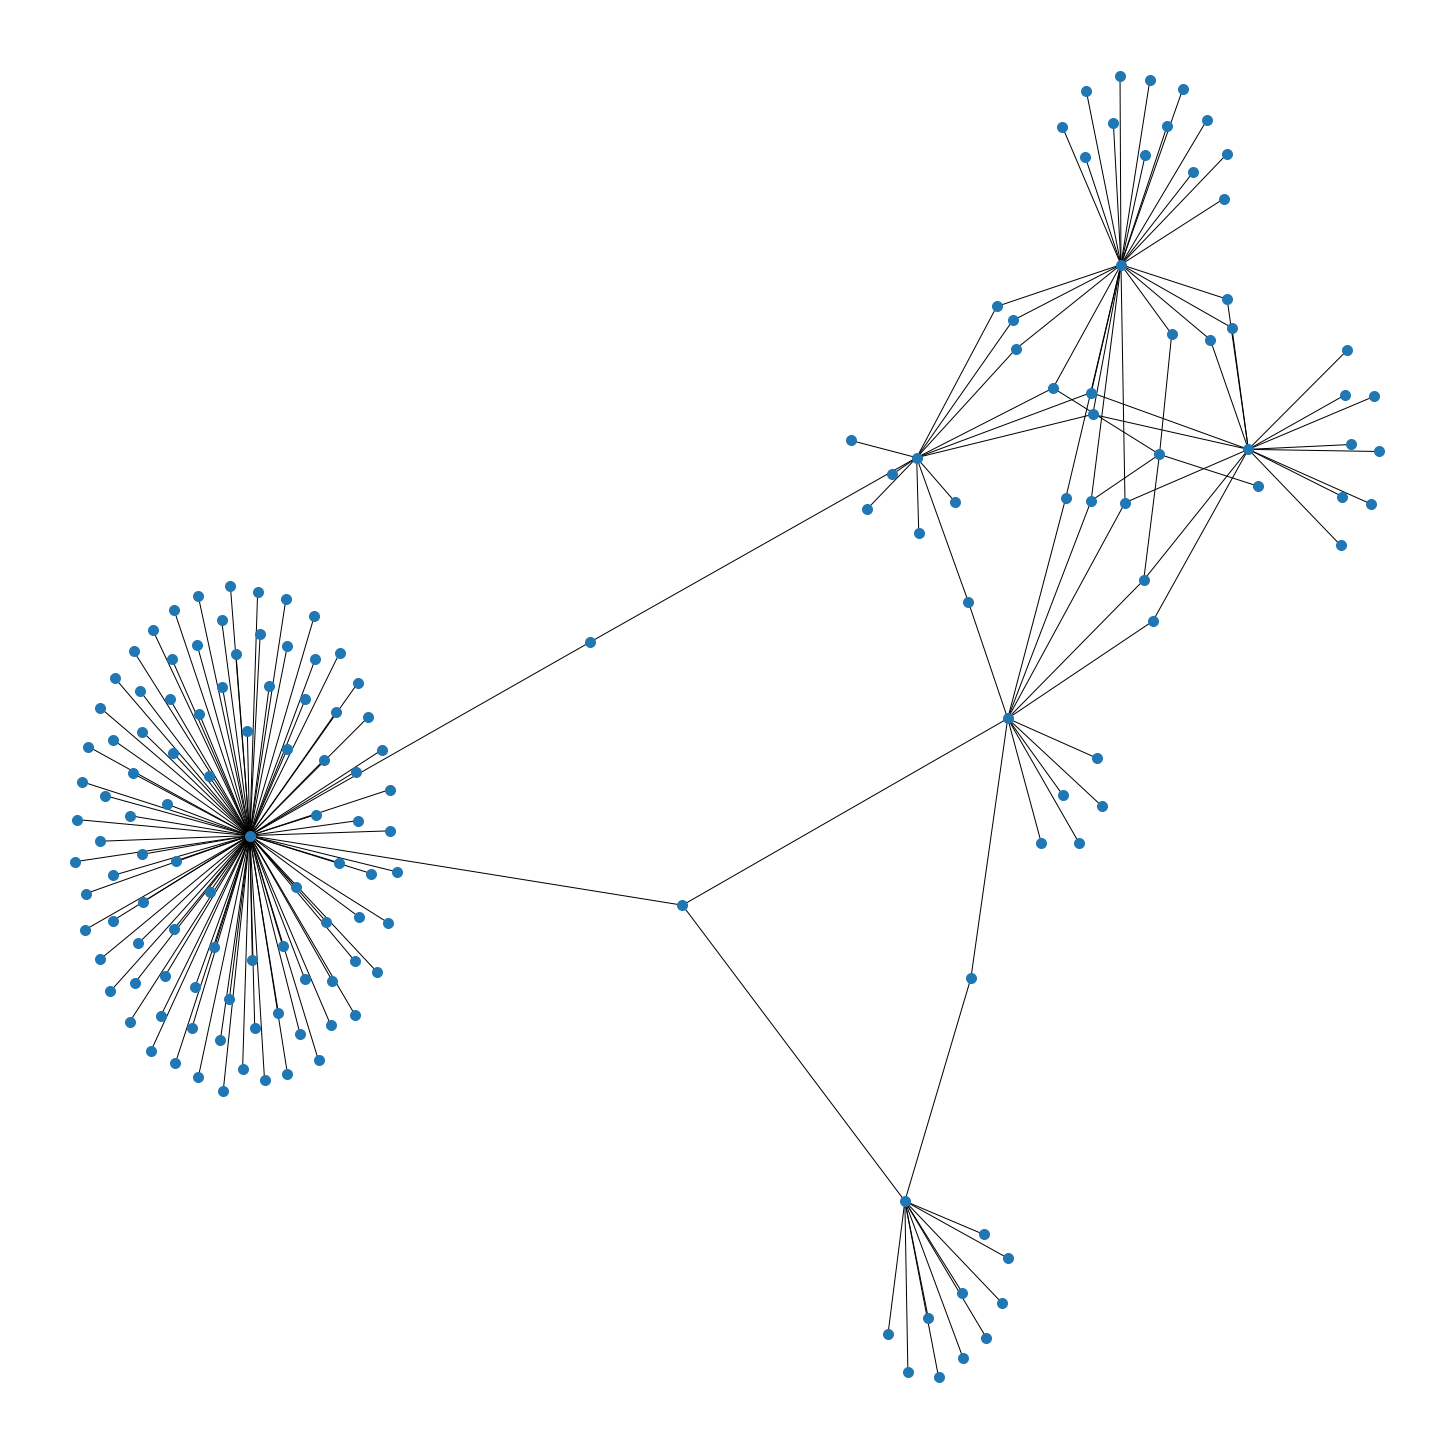

In [0]:
plt.figure(figsize=(20,20))
nx.draw(FGa, 
        with_labels = False,
        font_size = 5, 
        #node_color=['red', 'blue'],
        node_size = 100
       )   
plt.show()

In [0]:
FG = nx.from_pandas_edgelist(ProviderRel.head(10000), source='Provider',
                             target='BeneID', edge_attr=True)

In [0]:
len(FG)

9300

In [0]:
print(nx.info(FG))

Name: 
Type: Graph
Number of nodes: 9300
Number of edges: 9071
Average degree:   1.9508


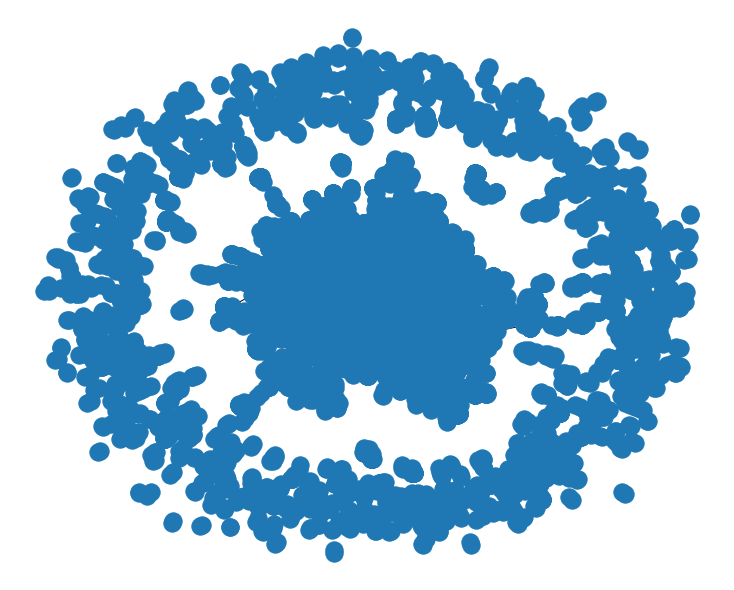

In [0]:
plt.figure(figsize=(10,8))
nx.draw(FG)   
plt.show()

### Subset Data

Fraud Yes

In [0]:
FraudYes = ProviderRel[ProviderRel['PotentialFraud']== 'Yes']

In [0]:
FG1 = nx.from_pandas_edgelist(FraudYes, source='Provider',
                             target='BeneID')

In [0]:
print(nx.info(FG1))

Name: 
Type: Graph
Number of nodes: 84503
Number of edges: 122463
Average degree:   2.8984


In [0]:
plt.figure(figsize=(10,8))
nx.draw(FG1, with_labels = True, node_size = 5000, font_size = 20)   
plt.show()

In [0]:
FraudYes['Provider'].value_counts()

##### Active Provider

In [0]:
OneProvider = FraudYes[FraudYes['Provider'] == 'PRV54895']

In [0]:
FG2 = nx.from_pandas_edgelist(OneProvider, source='Provider',
                             target='BeneID')

In [0]:
print(nx.info(FG2))

In [0]:
plt.figure(figsize=(10,8))
nx.draw(FG2)   
plt.show()

### Group Data

Based on Provider and Attending Pysican 

In [0]:
ProviderAtt = claims[['Provider','AttendingPhysician','PotentialFraud' ]]

In [0]:
ProviderAtt.head()

Provider AttendingPhysician PotentialFraud
0  PRV55912          PHY390922            Yes
1  PRV55907          PHY318495             No
2  PRV56046          PHY372395             No
3  PRV52405          PHY369659             No
4  PRV56614          PHY379376             No

In [0]:
ProviderAtt.shape

(558211, 3)

In [0]:
FG3 = nx.from_pandas_edgelist(ProviderAtt, source='Provider',
                             target='AttendingPhysician', edge_attr=True)

In [0]:
print(nx.info(FG3))

Name: 
Type: Graph
Number of nodes: 87474
Number of edges: 88810
Average degree:   2.0305


In [0]:
#FG3.nodes(data=True)

In [0]:
#plt.figure(figsize=(10,8))
#nx.draw(FG3, node_color=['red', 'blue'])   
#plt.show()

## END